<a href="https://colab.research.google.com/github/KenMuriuki/Knn-and-Naive-Bayes-model-Prediction/blob/master/Kennedy_Muriuki_Week_9_Independent_Project_spambase_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spambase Model Prediction

## Defining the Question

### a) Specifying the Data Analytic Question

> The Spambase dataset has been provided by a telephone company. It wishes to classify the model as either spam or ham. The good news is that the model has been tokenized and vectorized. Therefore your work as a data scientist is to create a model that will classify a message as either ham or spam.

### b) Defining the Metric for Success

> The metric for this model will be the accuracy f1 score. The target score will be 90%.

### d) Recording the Experimental Design

> This study will follow the following life cycle:

*   Defining the question
*   Reading the data
*   Checking the data
*   EDA
*   Implimenting the solution
*   Model Optimization
*   Challenging the solution
*   Follow up questions





## Loading the libraries

In [54]:
# loading the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

## Reading the Data

In [24]:
# Loading the csv datasets 

data = pd.read_csv('spambase.csv')


## Checking the Data

In [7]:
# Determining the no. of records in our spambase dataset

data.shape

(4601, 58)

In [8]:
# Previewing the top of the spambase dataset

data.head()

word_freq_make  word_freq_address  ...  capital_run_length_total  class
0            0.00               0.64  ...                       278      1
1            0.21               0.28  ...                      1028      1
2            0.06               0.00  ...                      2259      1
3            0.00               0.00  ...                       191      1
4            0.00               0.00  ...                       191      1

[5 rows x 58 columns]

In [ ]:
# Previewing the bottom of the spambase dataset

data.tail()

word_freq_make  word_freq_address  ...  capital_run_length_total  class
4596            0.31                0.0  ...                        88      0
4597            0.00                0.0  ...                        14      0
4598            0.30                0.0  ...                       118      0
4599            0.96                0.0  ...                        78      0
4600            0.00                0.0  ...                        40      0

[5 rows x 58 columns]

In [ ]:
# Checking whether each column has an appropriate datatype
#
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
# checking a brief description of the training dataset.
data.describe()

word_freq_make  word_freq_address  ...  capital_run_length_total        class
count     4601.000000        4601.000000  ...               4601.000000  4601.000000
mean         0.104553           0.213015  ...                283.289285     0.394045
std          0.305358           1.290575  ...                606.347851     0.488698
min          0.000000           0.000000  ...                  1.000000     0.000000
25%          0.000000           0.000000  ...                 35.000000     0.000000
50%          0.000000           0.000000  ...                 95.000000     0.000000
75%          0.000000           0.000000  ...                266.000000     1.000000
max          4.540000          14.280000  ...              15841.000000     1.000000

[8 rows x 58 columns]

## Tidying the Dataset

### a) Completeness

In [ ]:
# checking if there is any missing values in the train dataset
data.isnull().values.any()

False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

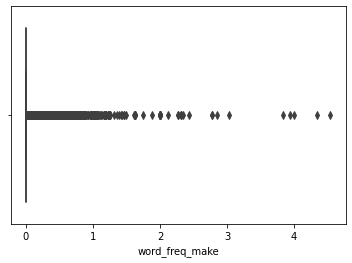

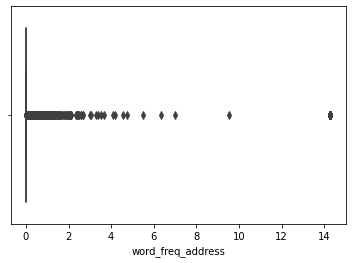

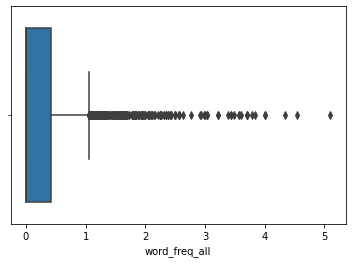

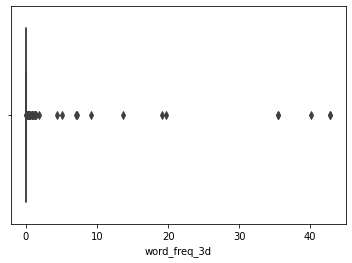

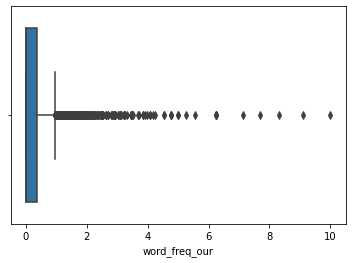

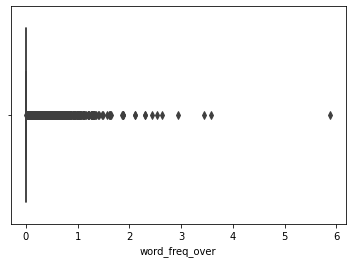

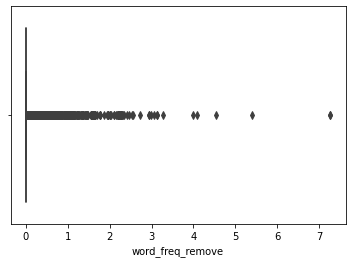

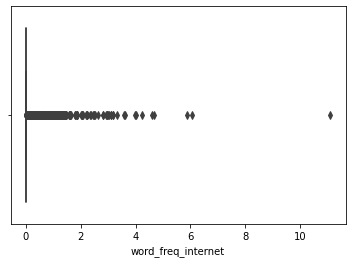

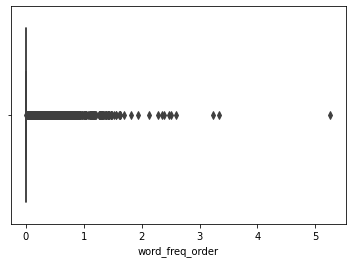

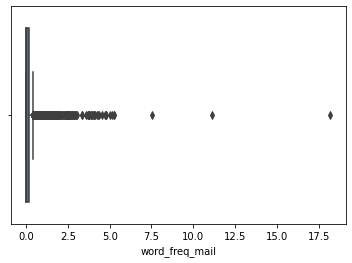

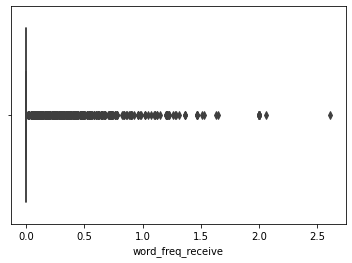

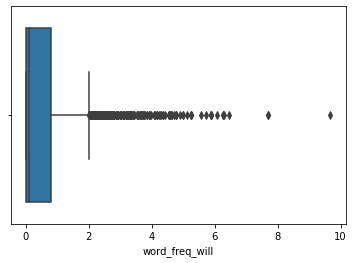

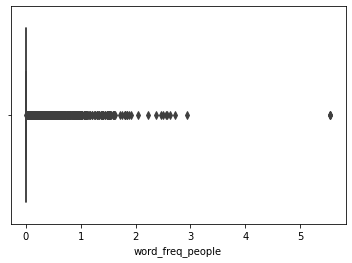

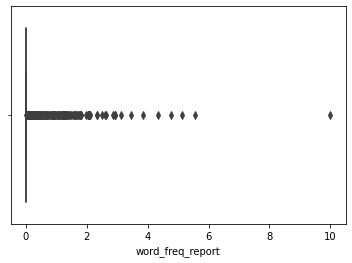

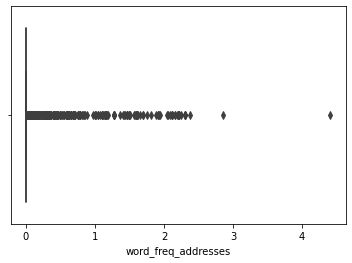

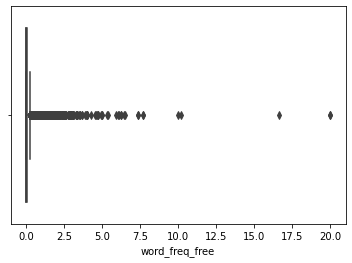

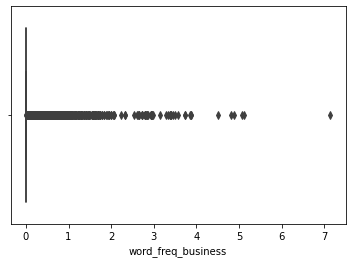

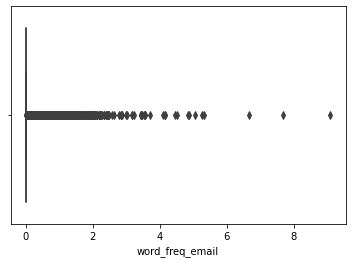

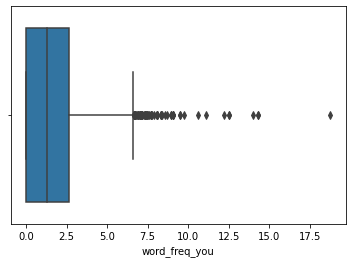

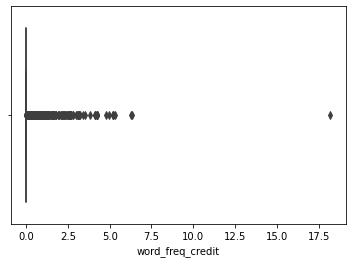

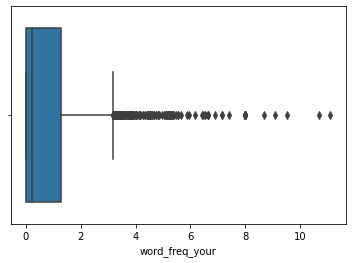

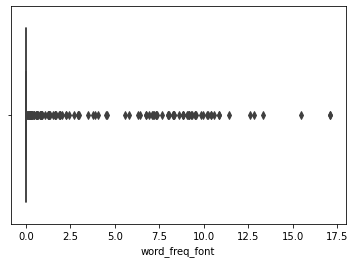

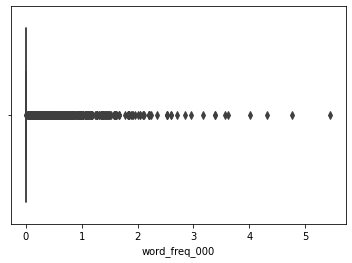

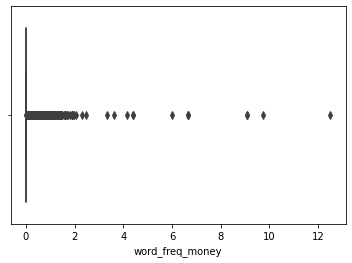

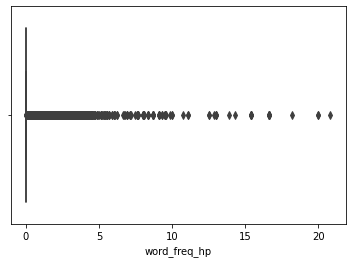

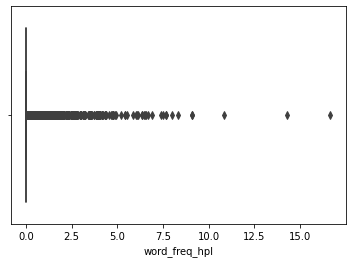

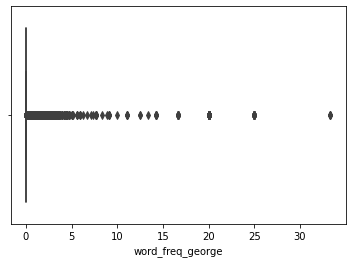

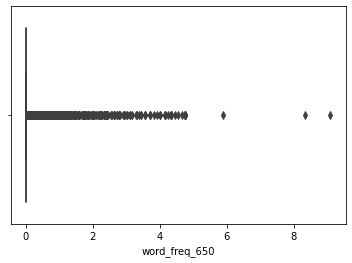

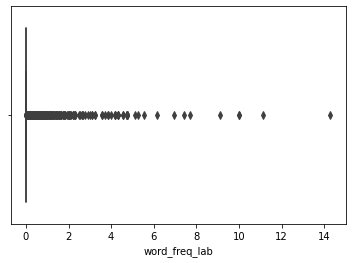

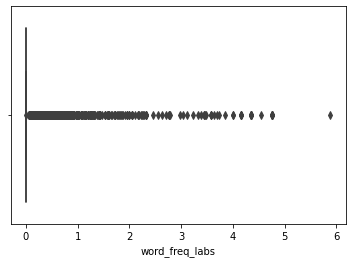

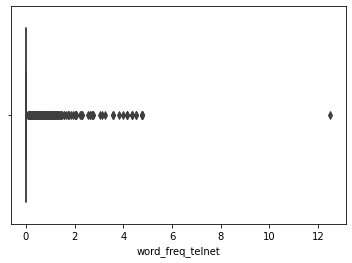

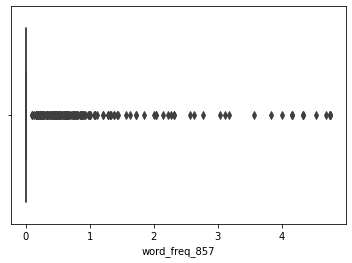

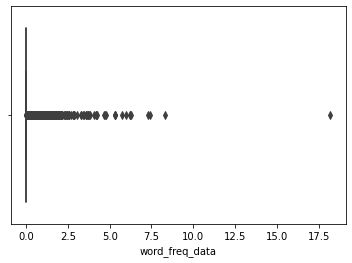

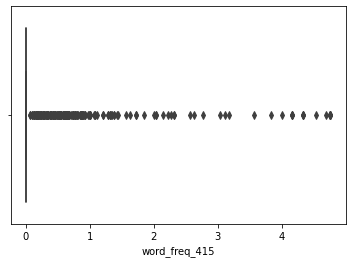

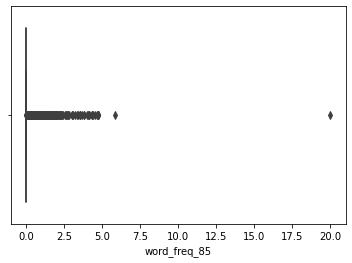

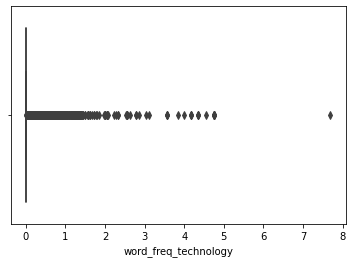

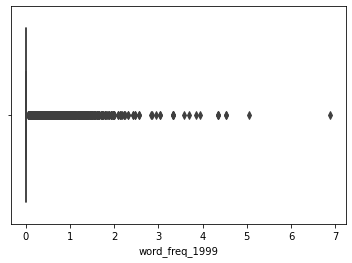

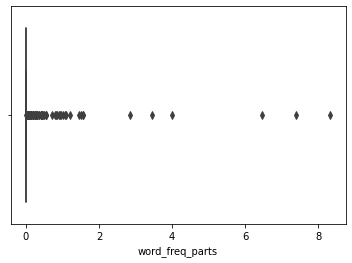

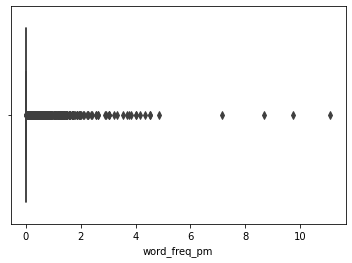

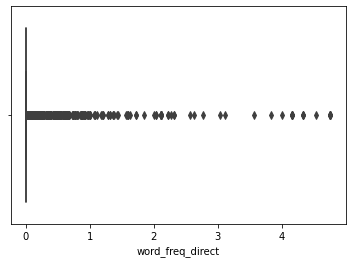

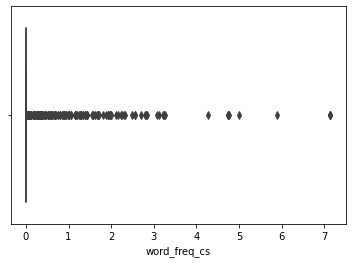

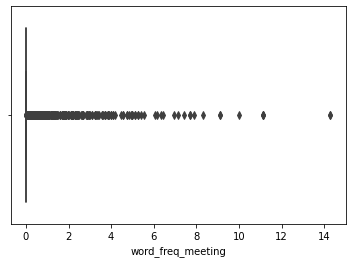

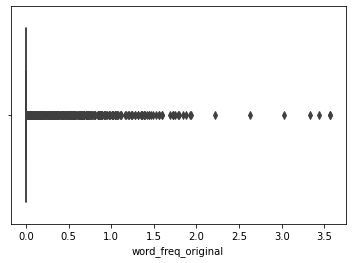

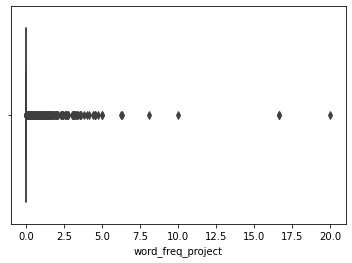

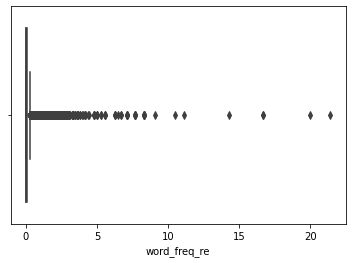

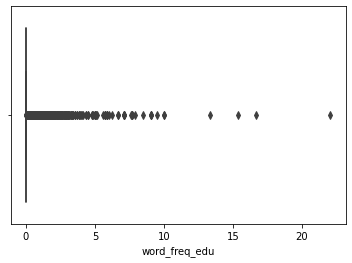

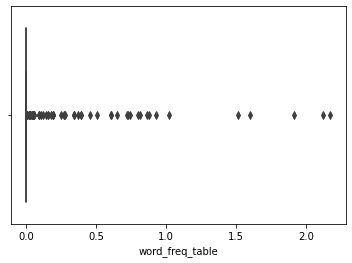

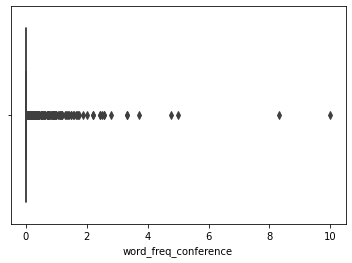

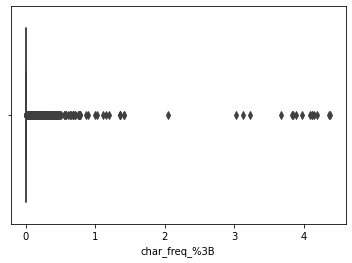

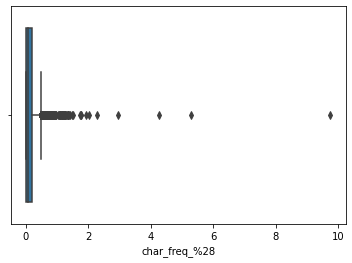

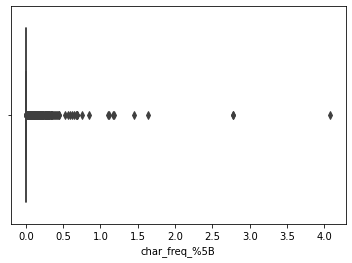

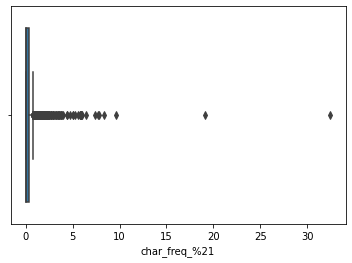

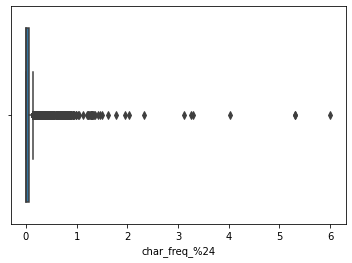

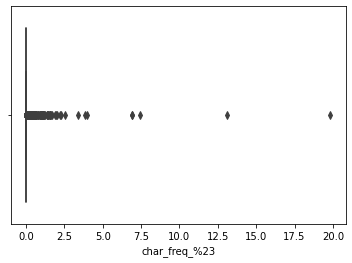

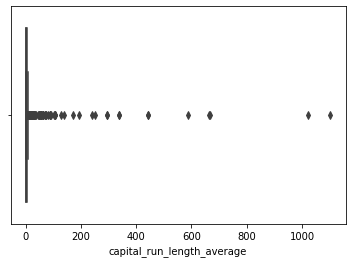

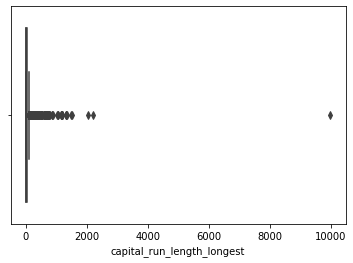

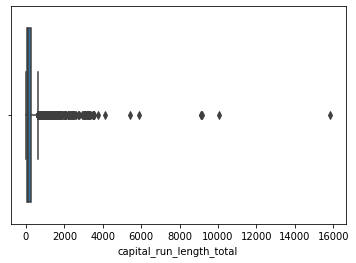

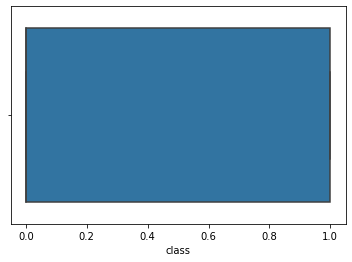

In [ ]:
# Checking for Outliers

for col in data.columns:
  plt.figure()
  sns.boxplot(x=col, data=data)

> Most of the columns in the dataset have outliers. Therefore the outliers will remain intact so as not to lose a lot of information.

### b) Consistency

In [ ]:
# cheking for duplicates in the dataset
data.duplicated().sum()

391

In [ ]:
# More data cleaning procedures
data.describe()

word_freq_make  word_freq_address  ...  capital_run_length_total        class
count     4601.000000        4601.000000  ...               4601.000000  4601.000000
mean         0.104553           0.213015  ...                283.289285     0.394045
std          0.305358           1.290575  ...                606.347851     0.488698
min          0.000000           0.000000  ...                  1.000000     0.000000
25%          0.000000           0.000000  ...                 35.000000     0.000000
50%          0.000000           0.000000  ...                 95.000000     0.000000
75%          0.000000           0.000000  ...                266.000000     1.000000
max          4.540000          14.280000  ...              15841.000000     1.000000

[8 rows x 58 columns]

In [9]:
# export it as a csv file
data.to_csv('data.csv')

## Exploratory Analysis

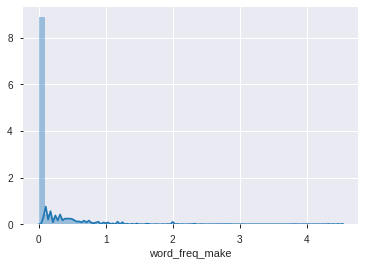

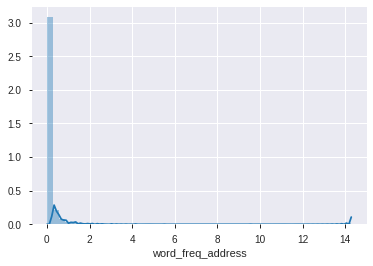

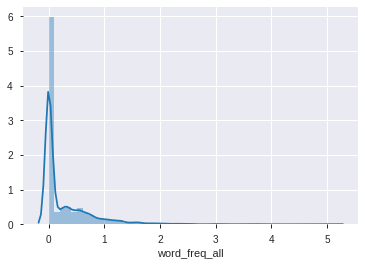

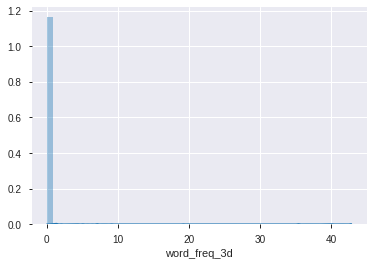

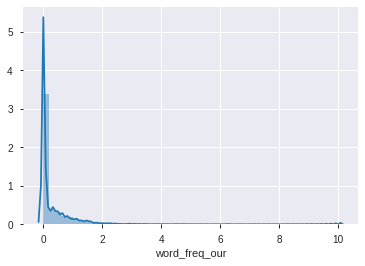

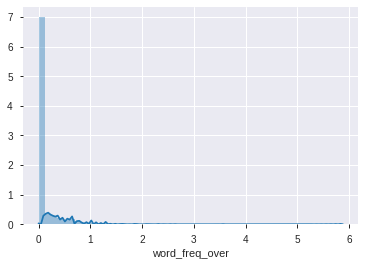

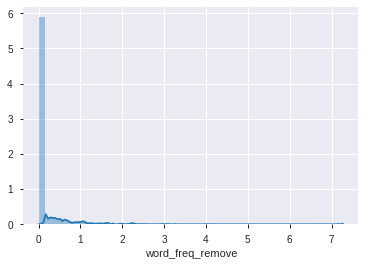

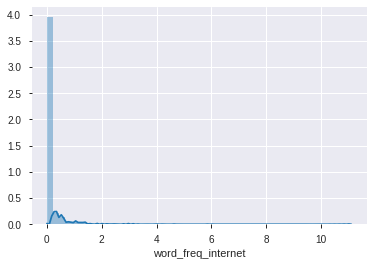

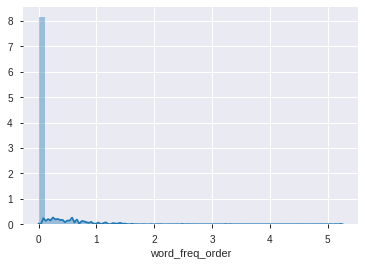

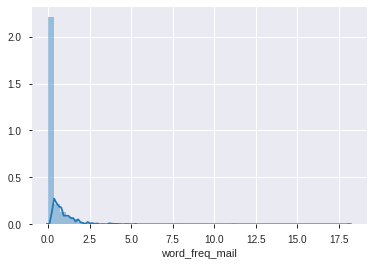

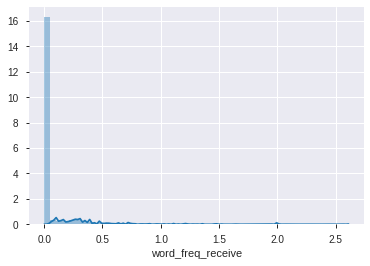

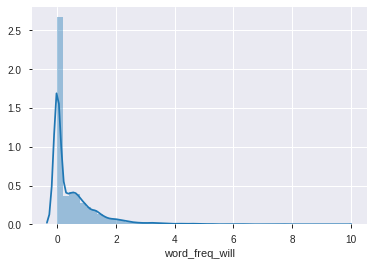

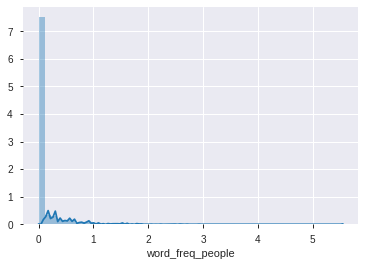

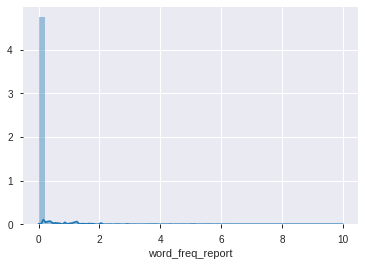

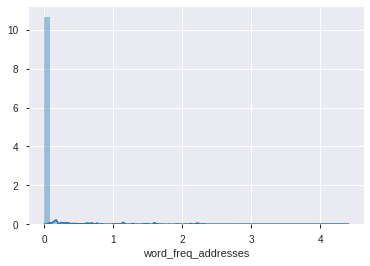

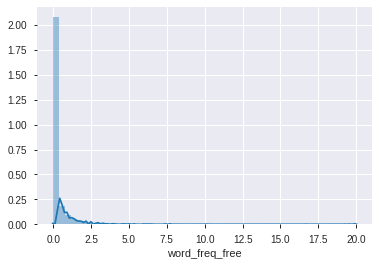

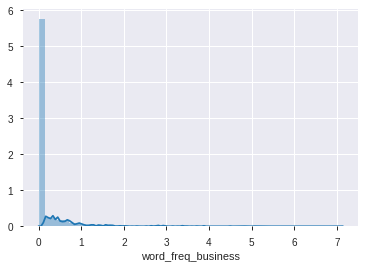

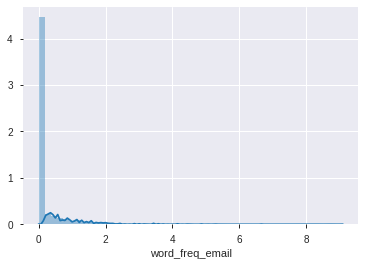

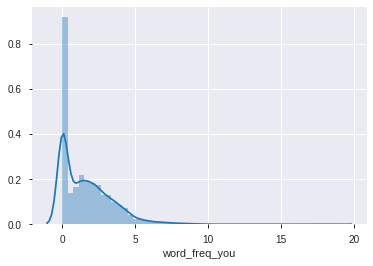

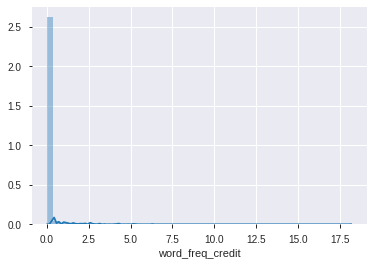

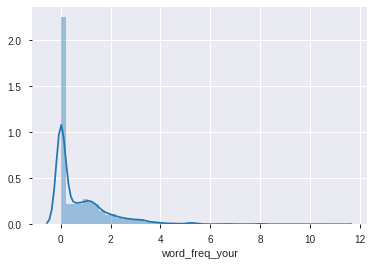

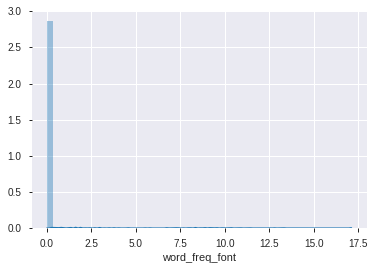

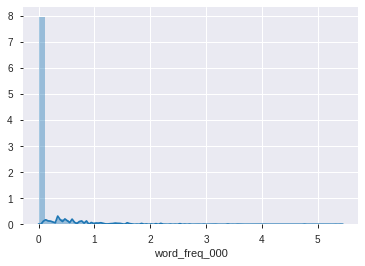

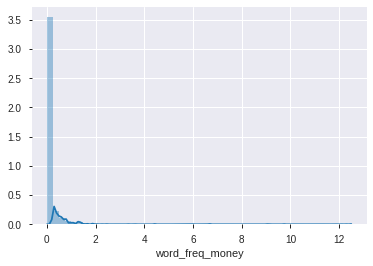

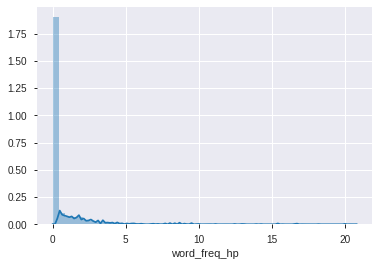

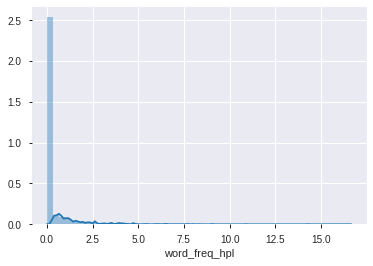

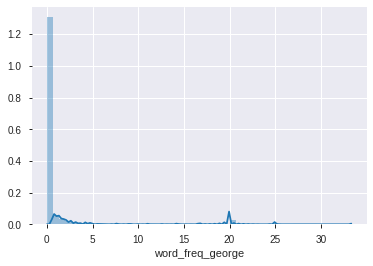

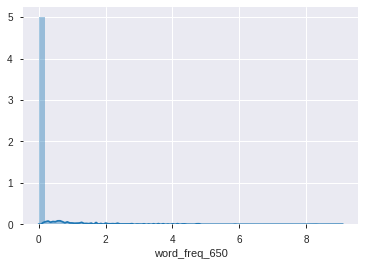

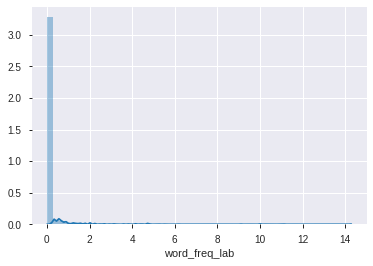

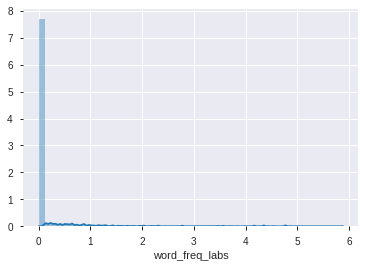

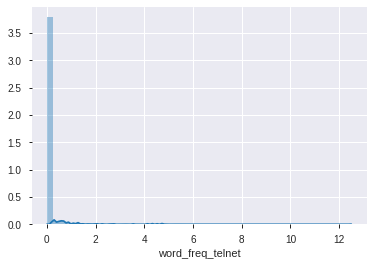

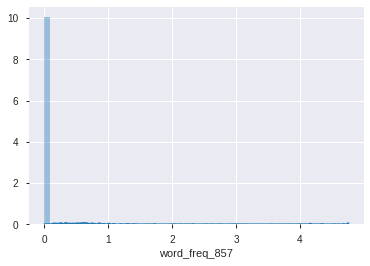

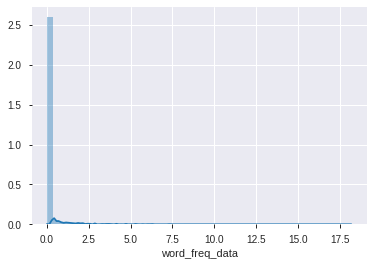

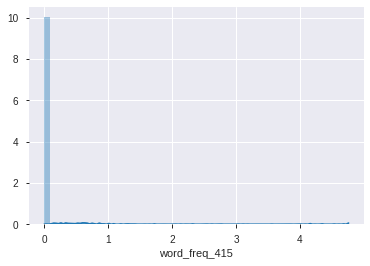

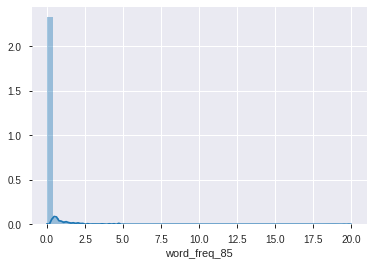

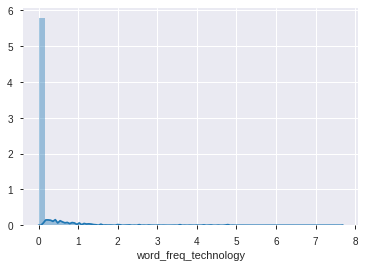

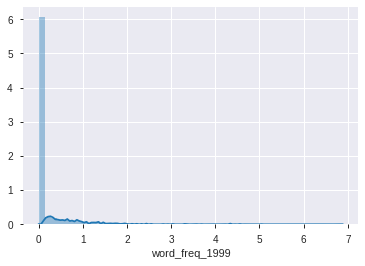

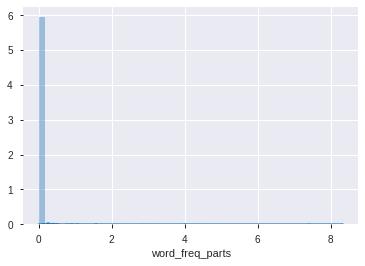

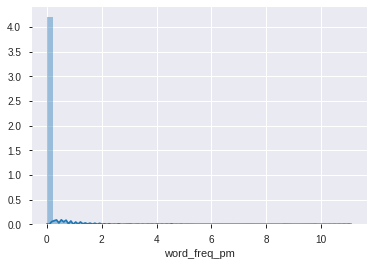

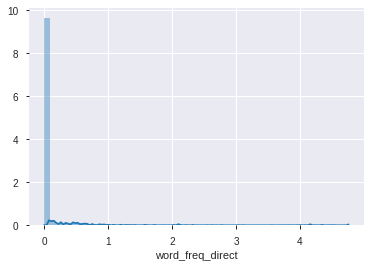

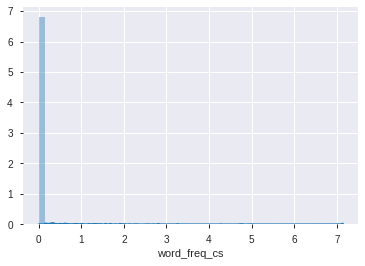

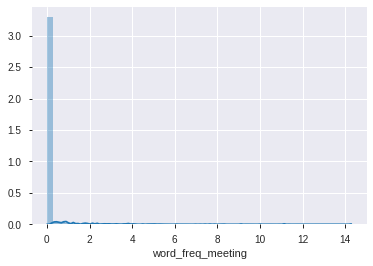

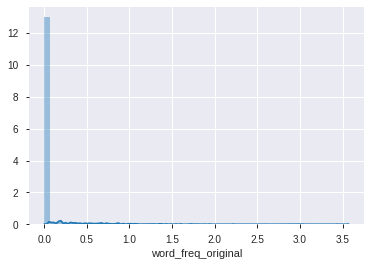

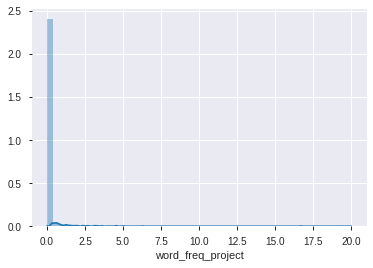

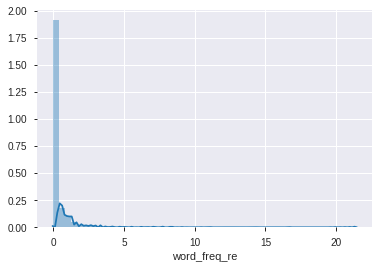

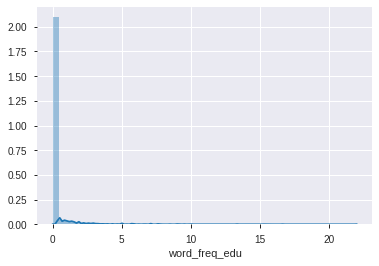

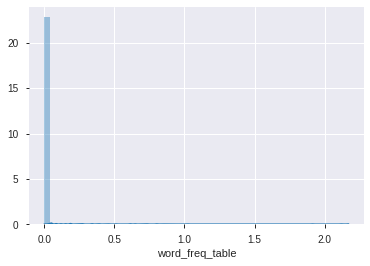

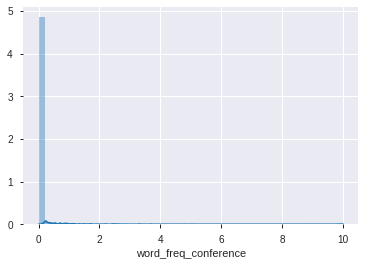

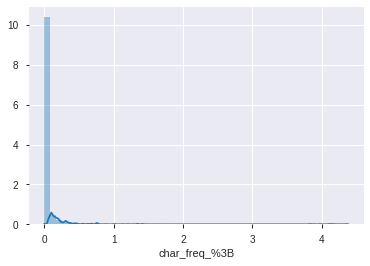

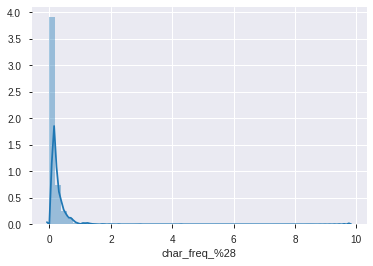

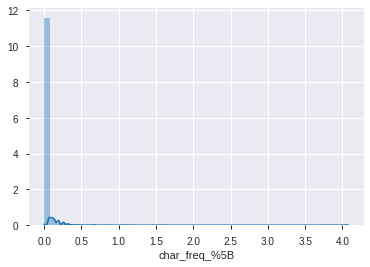

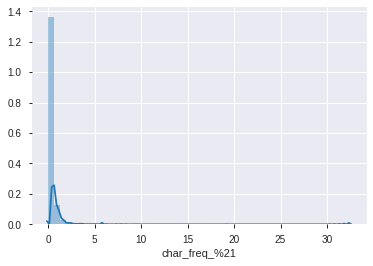

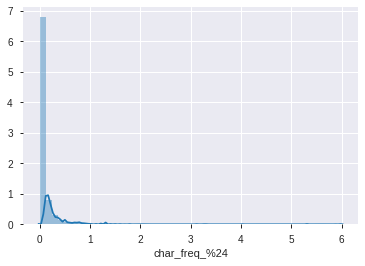

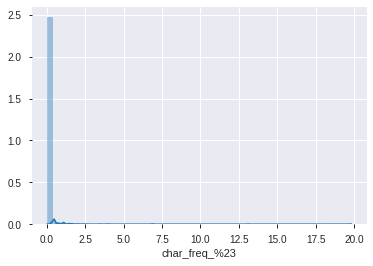

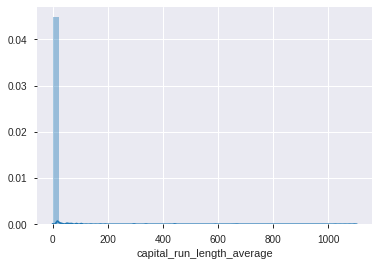

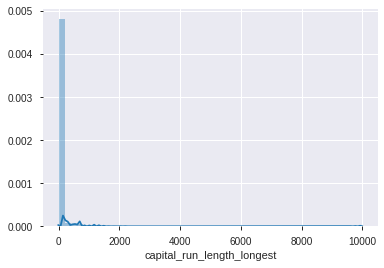

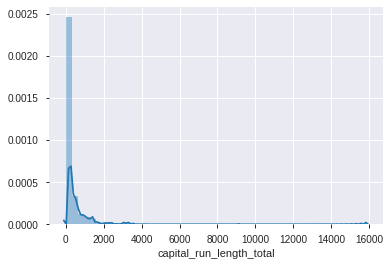

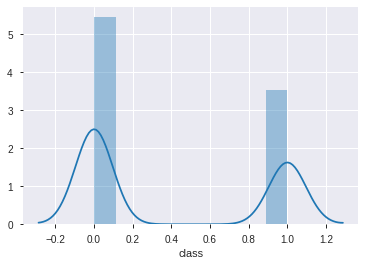

In [27]:
for col in data.columns:
  plt.figure()
  sns.distplot(data[col], kde=True)

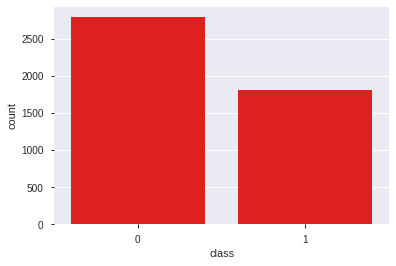

In [37]:
# generating a catplot for the class column
sns.countplot(x='class', data= data, color='red')


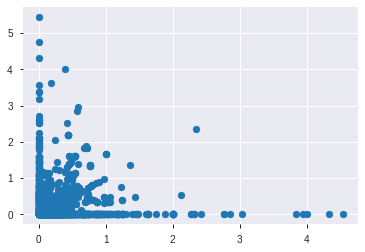

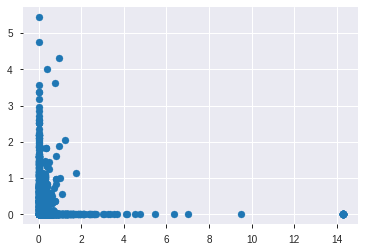

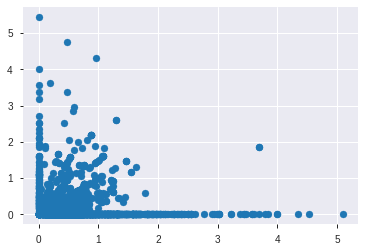

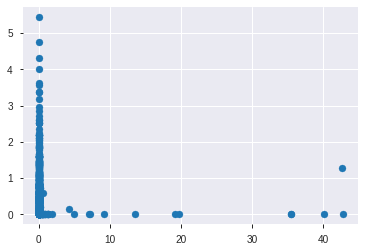

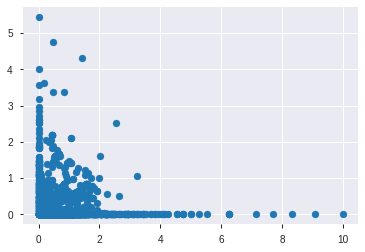

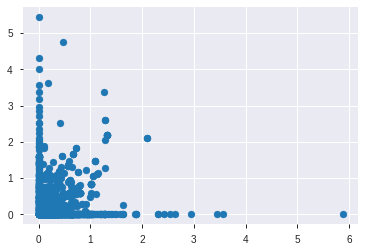

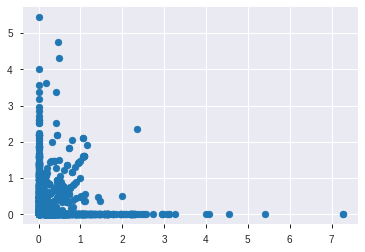

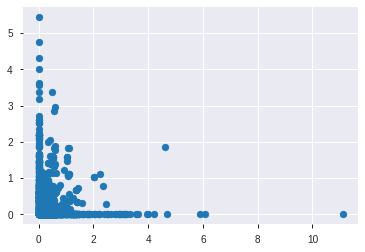

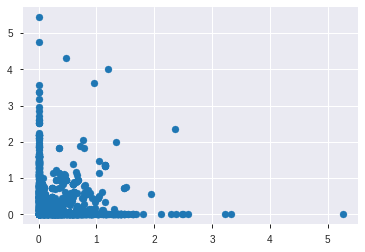

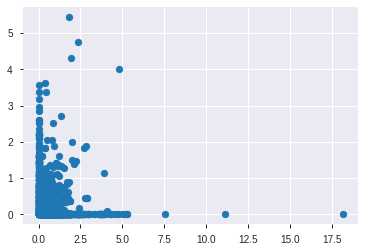

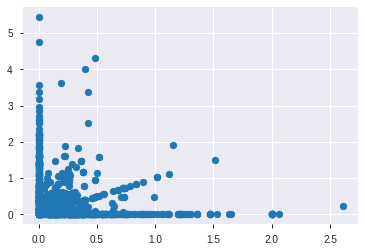

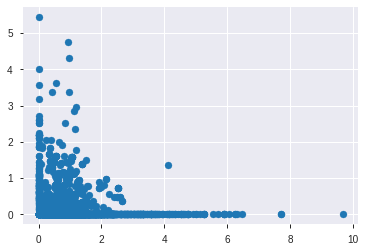

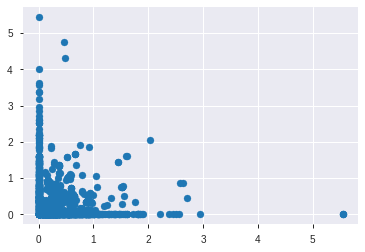

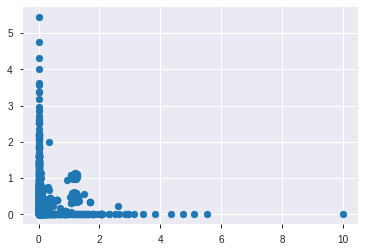

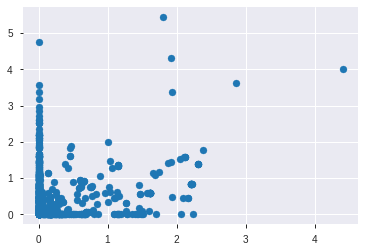

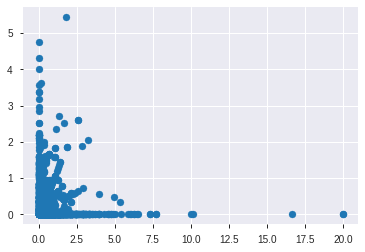

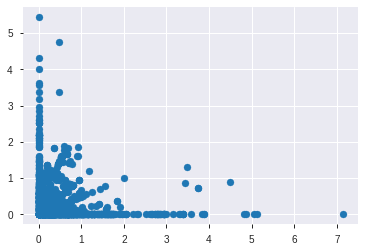

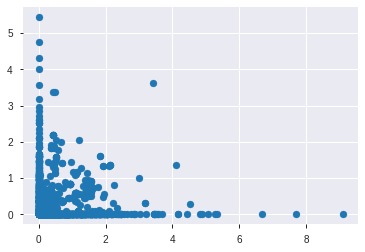

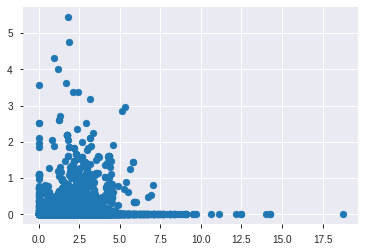

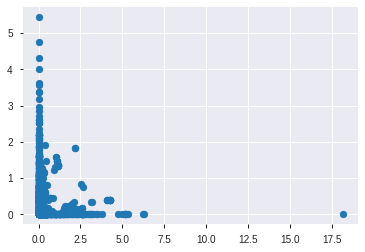

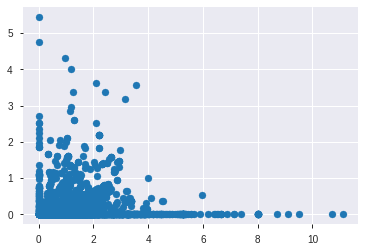

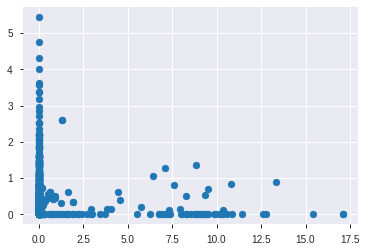

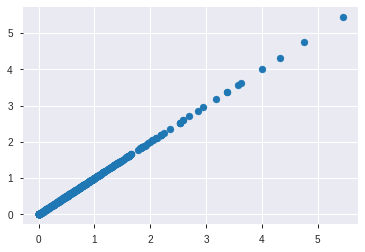

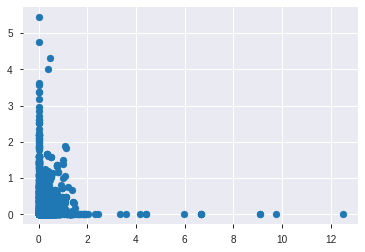

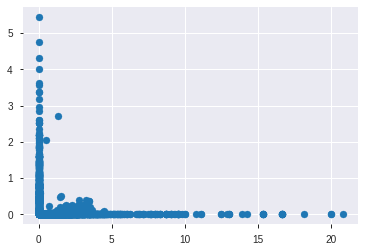

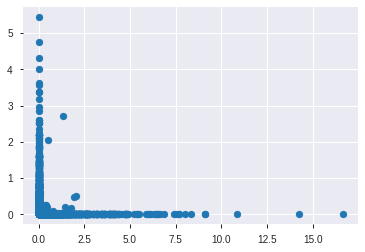

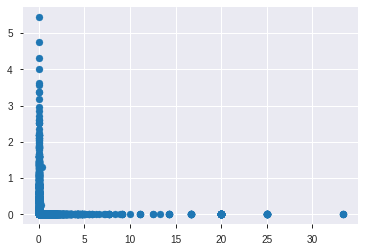

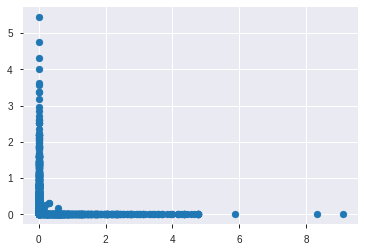

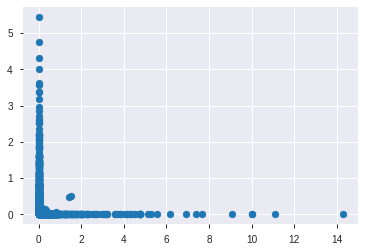

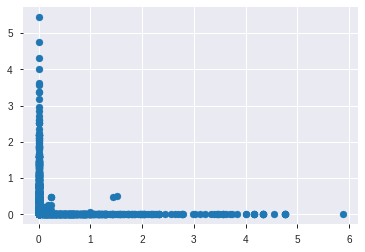

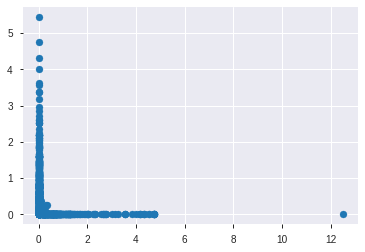

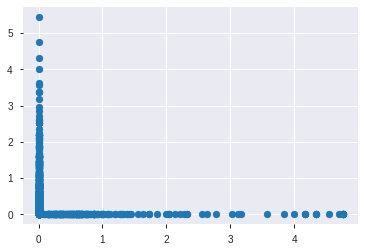

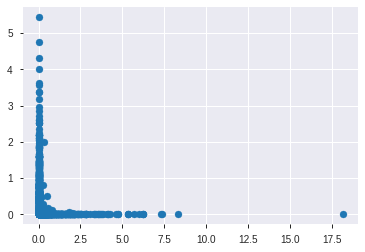

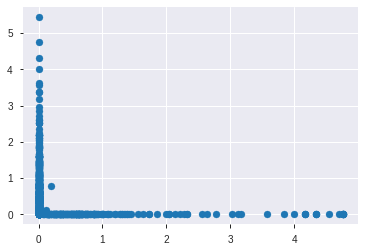

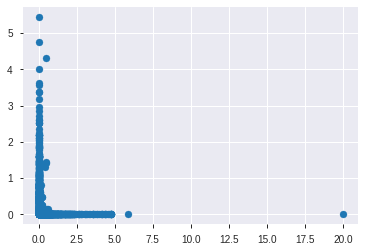

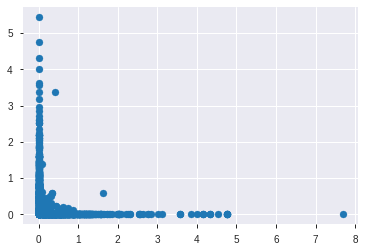

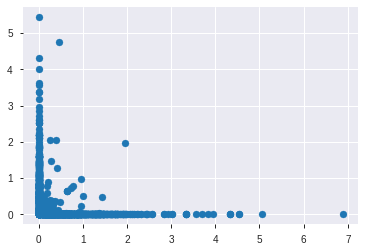

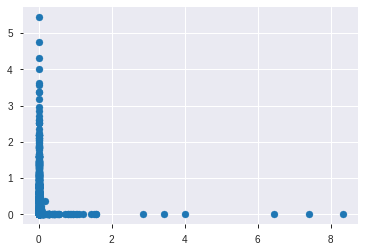

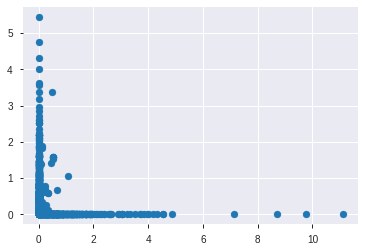

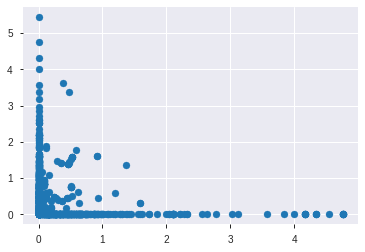

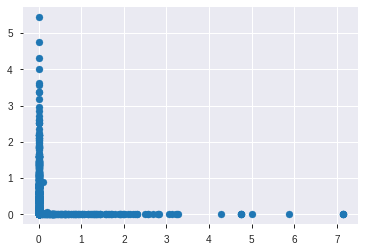

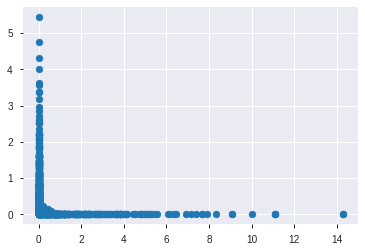

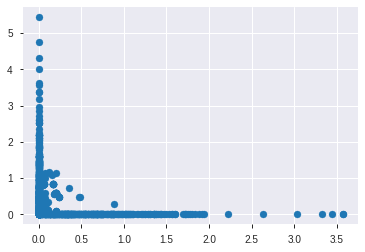

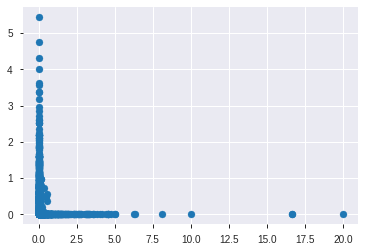

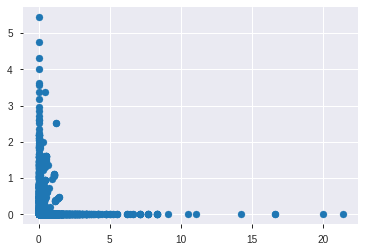

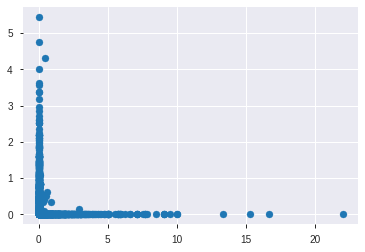

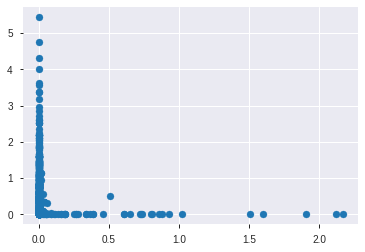

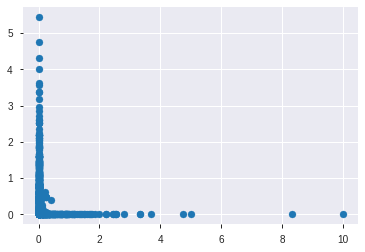

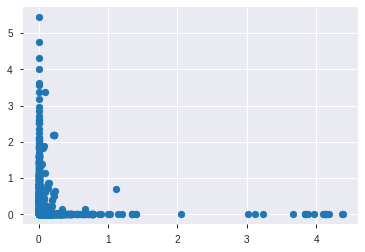

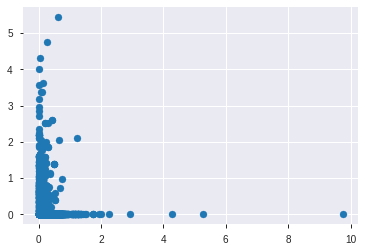

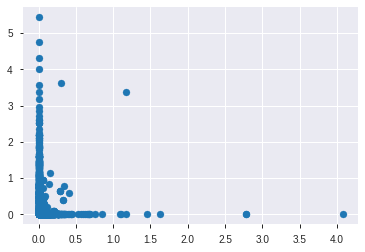

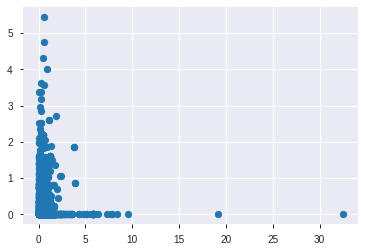

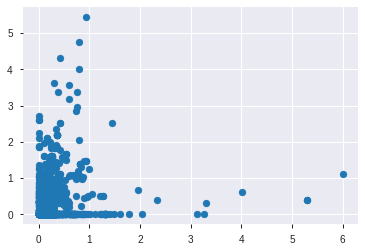

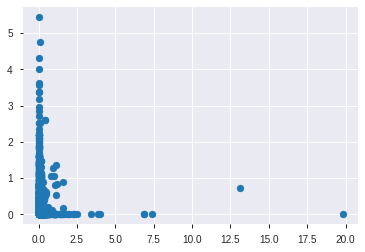

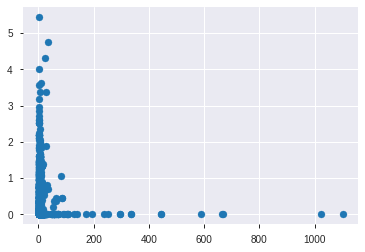

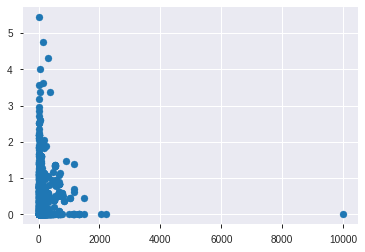

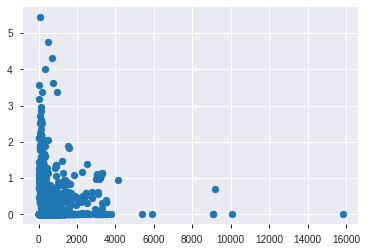

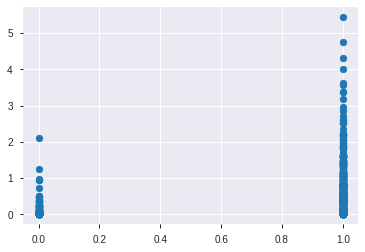

In [55]:
# scatter plots for the dataset
for col in data.columns:
  plt.scatter(data[col], data['word_freq_000'])
  plt.show()

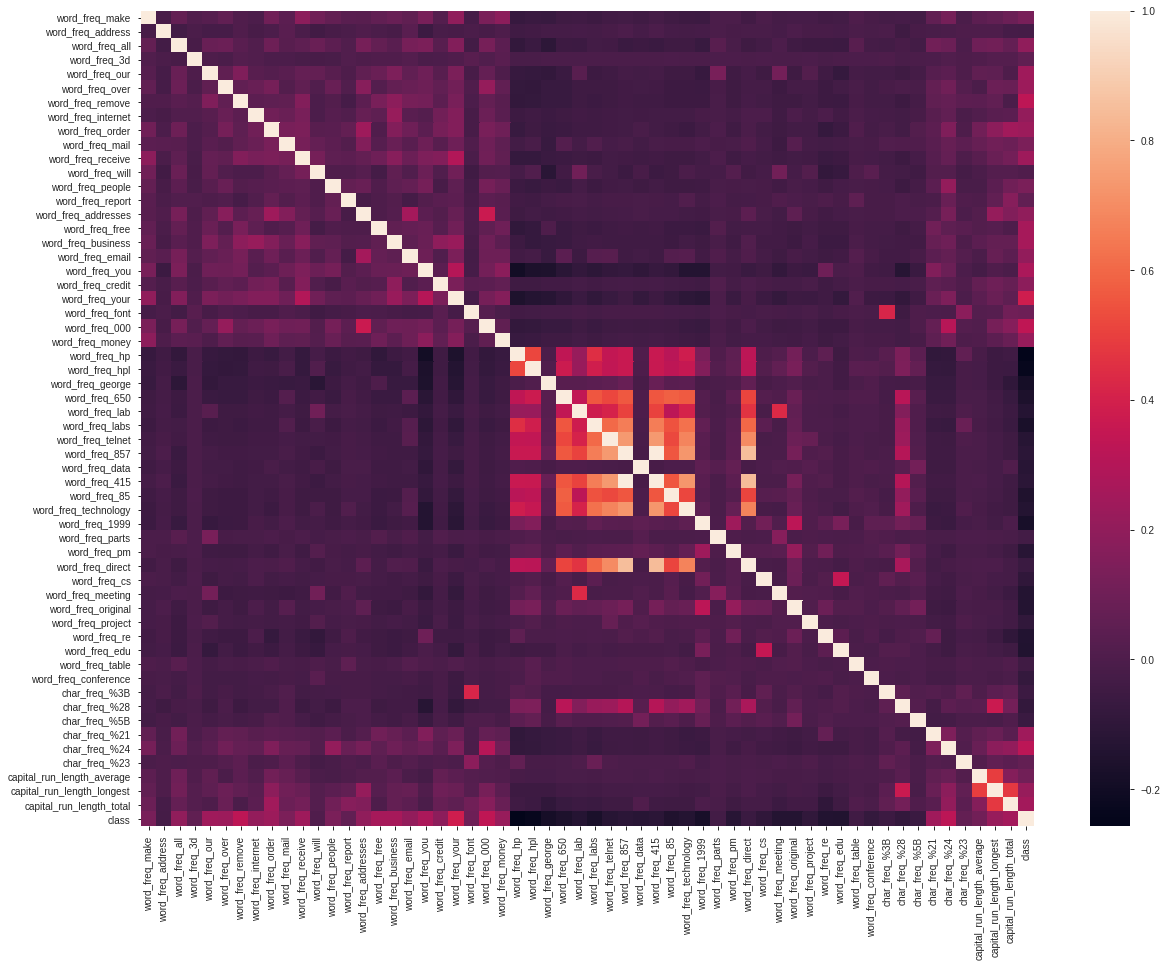

In [43]:
f, ax = plt.subplots(figsize=(20,15))
corr = data.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [ ]:
# generating more 
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(data)
sweet_report.show_html('sweet_report.html')

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


:FEATURES DONE:                    |█████████████████████| [100%]   00:29  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.



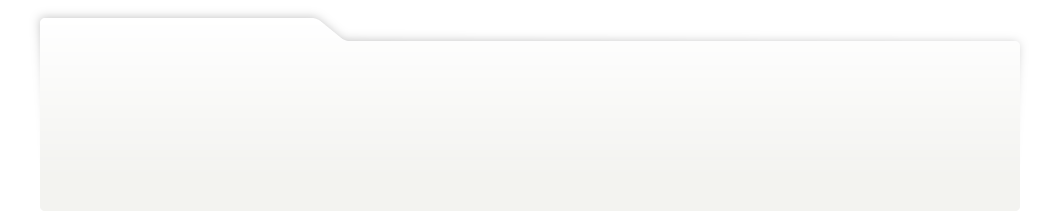
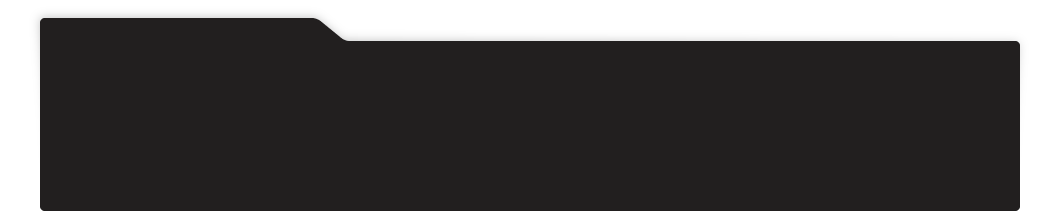
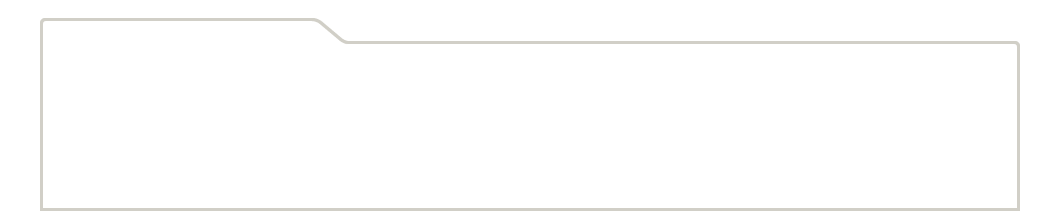
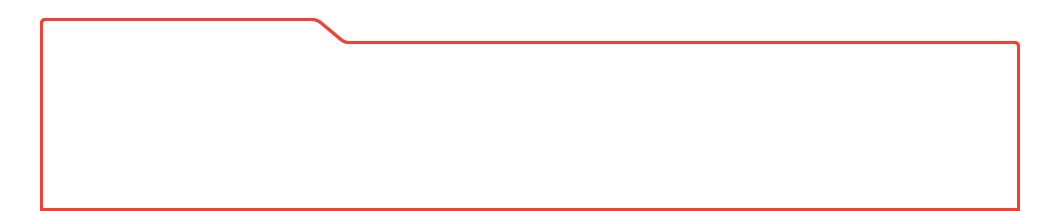
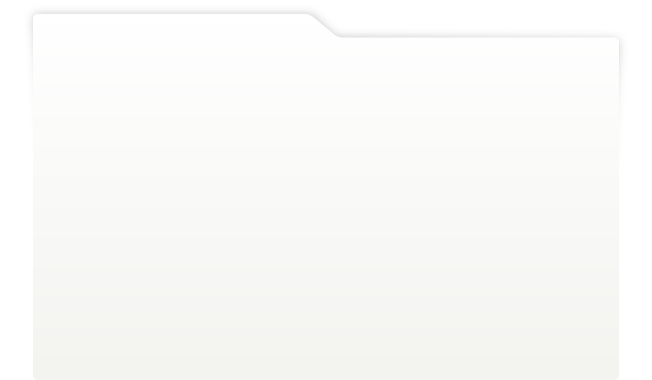
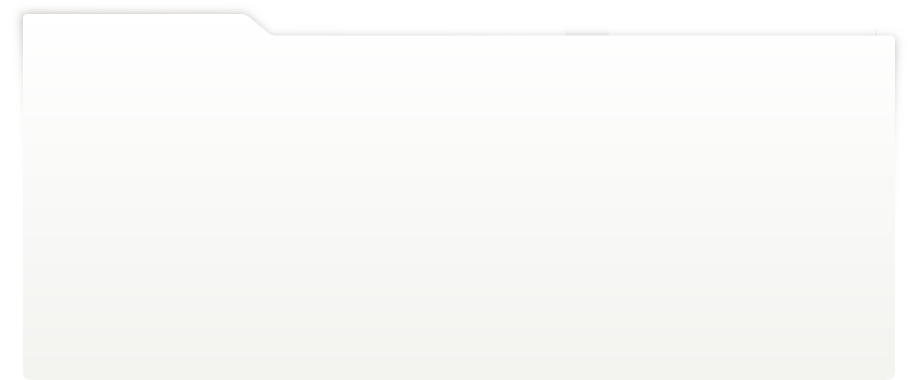
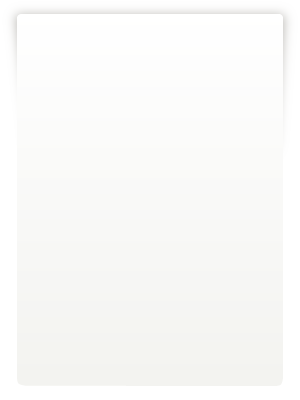
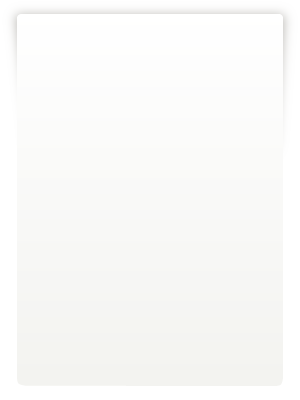
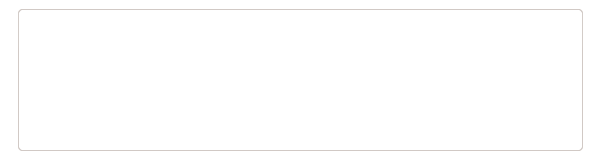
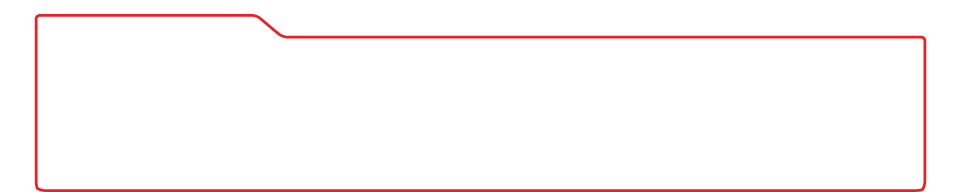
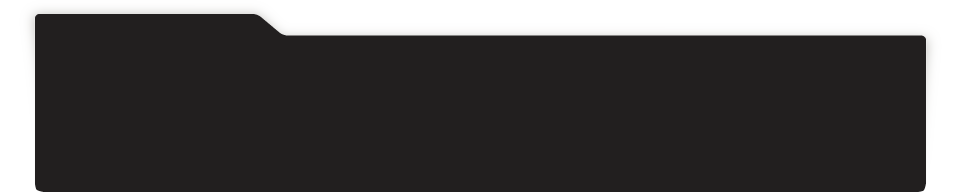
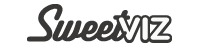
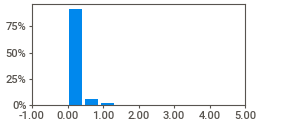
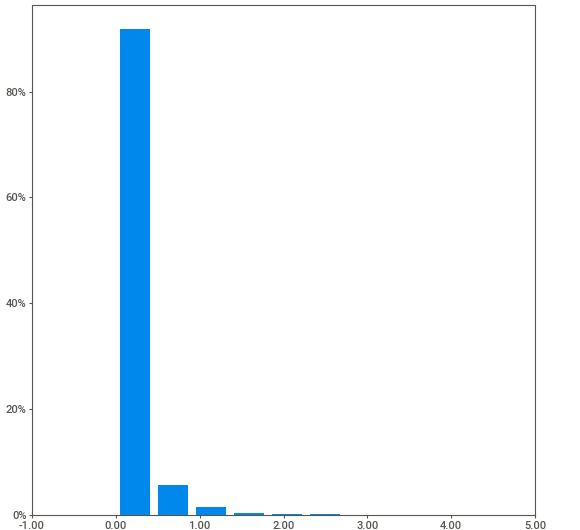
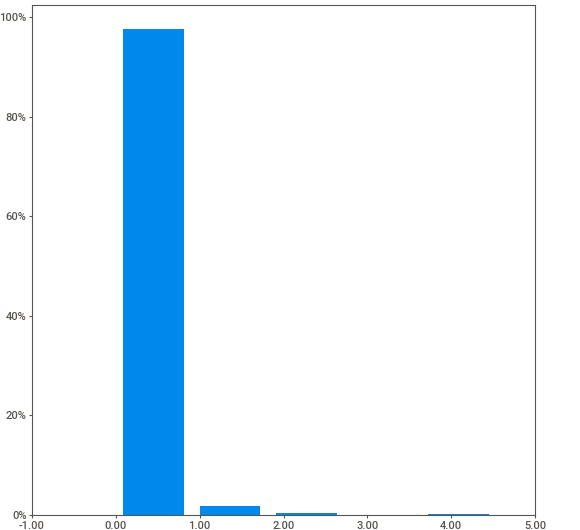
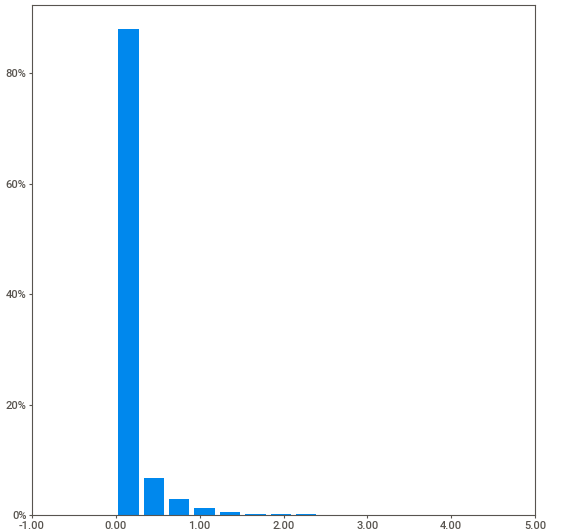
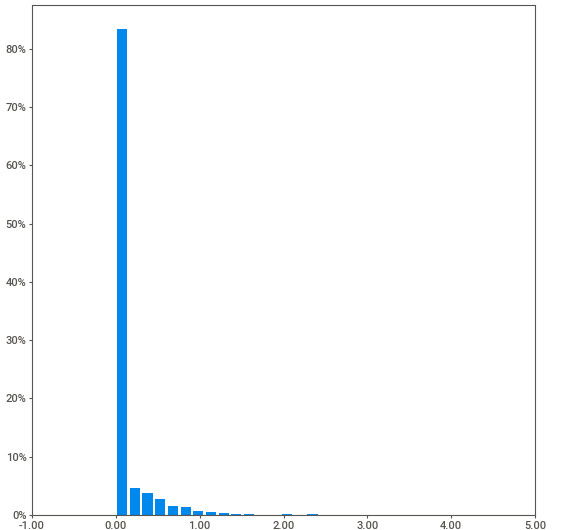
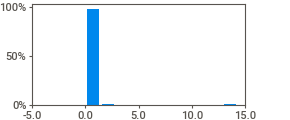
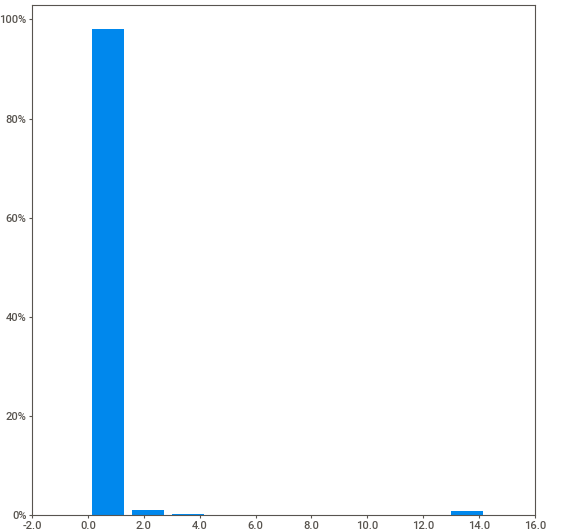
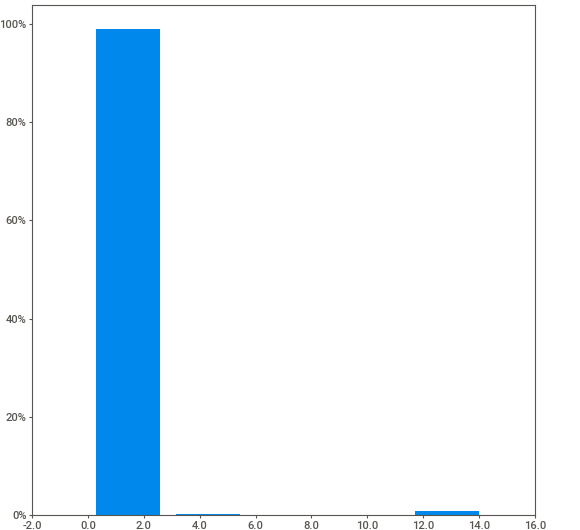
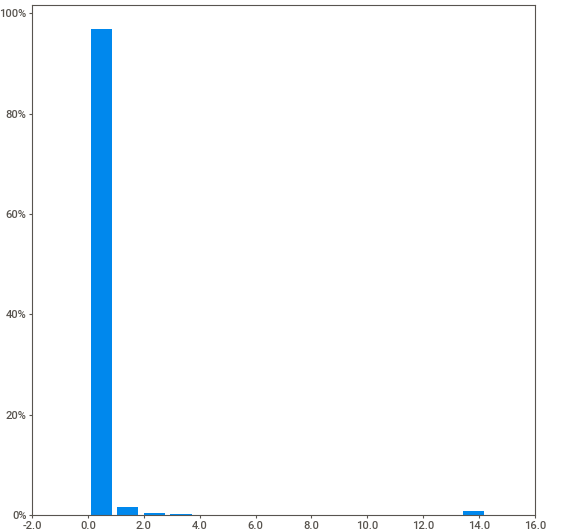
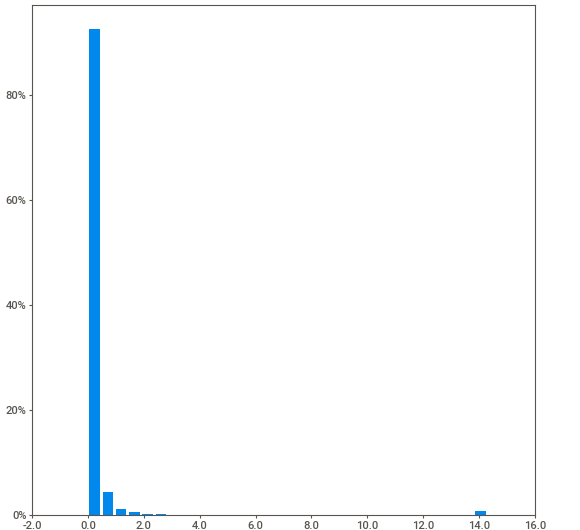
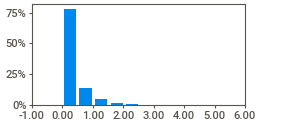
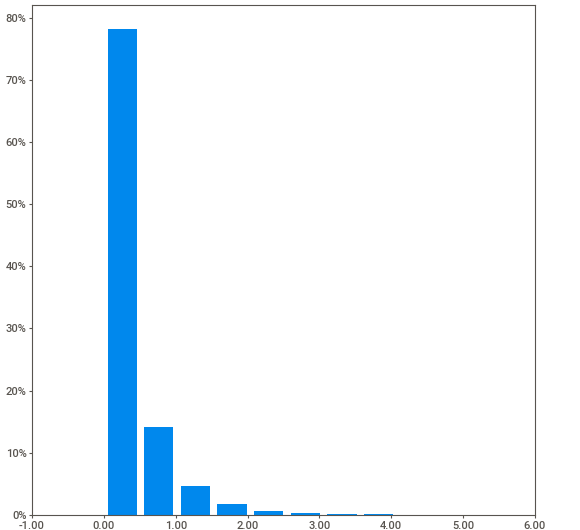
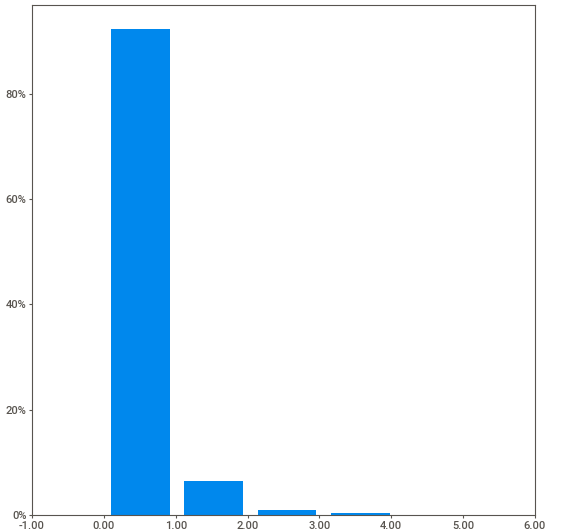
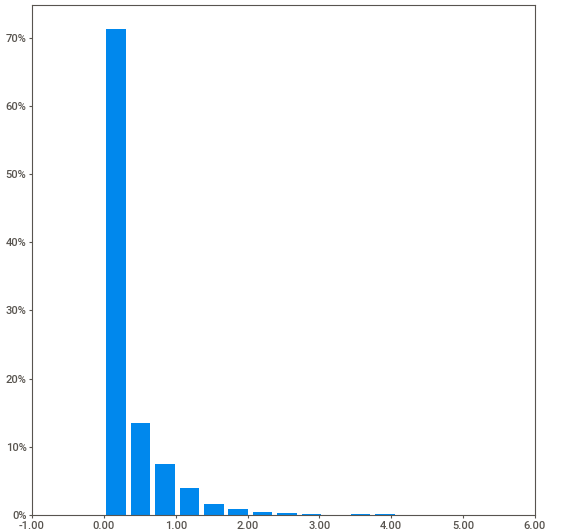
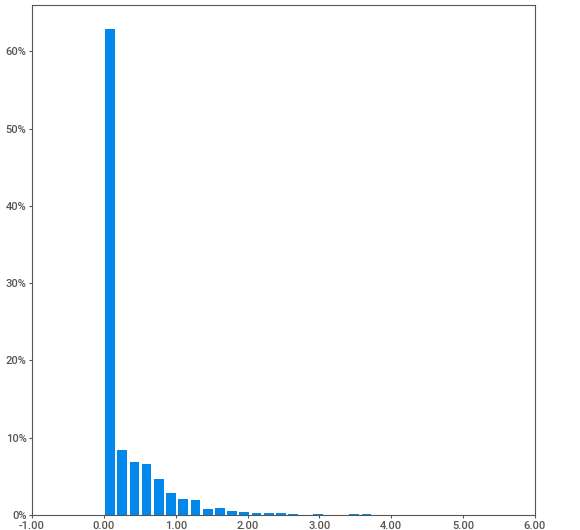
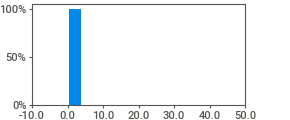
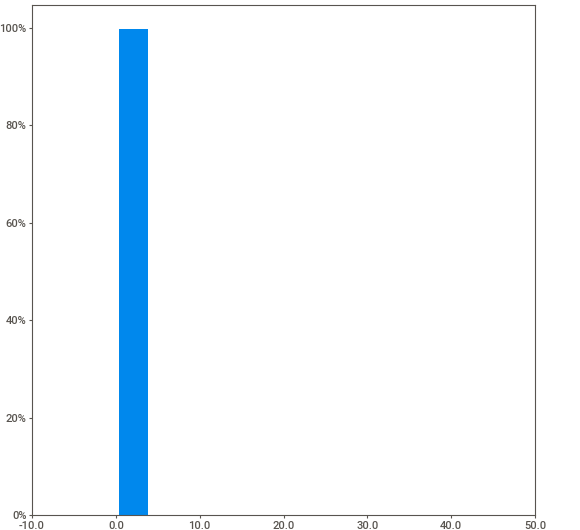
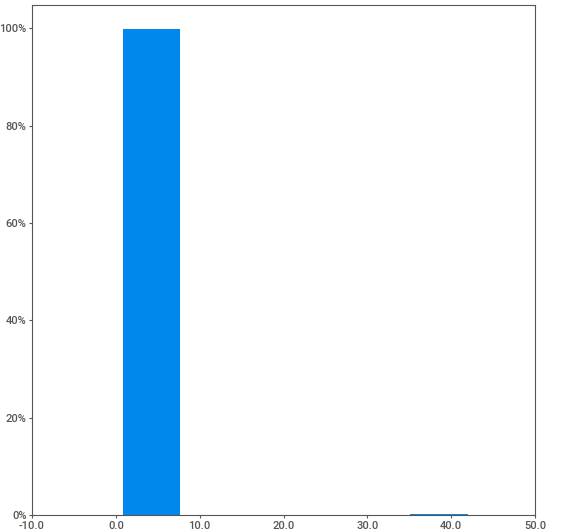
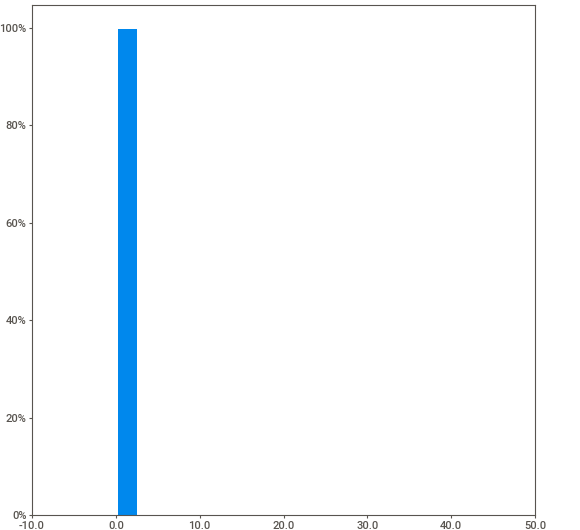
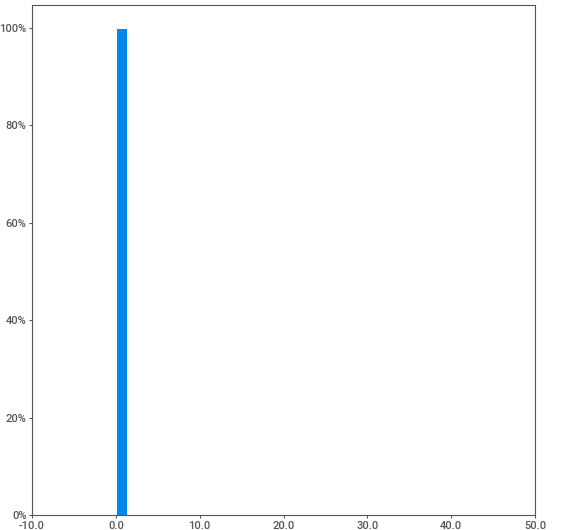
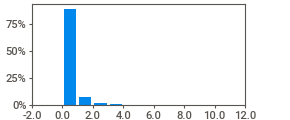
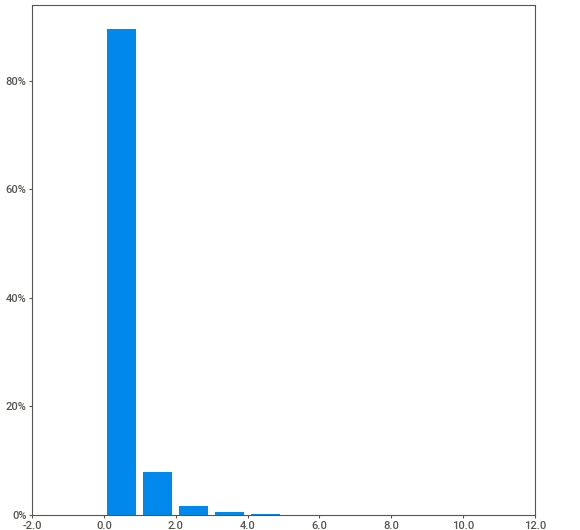
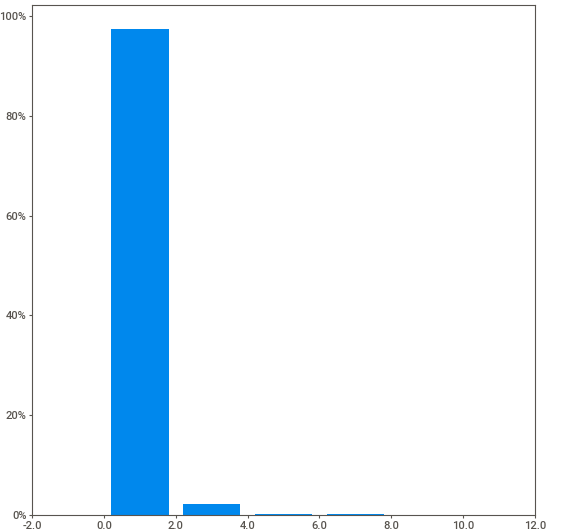
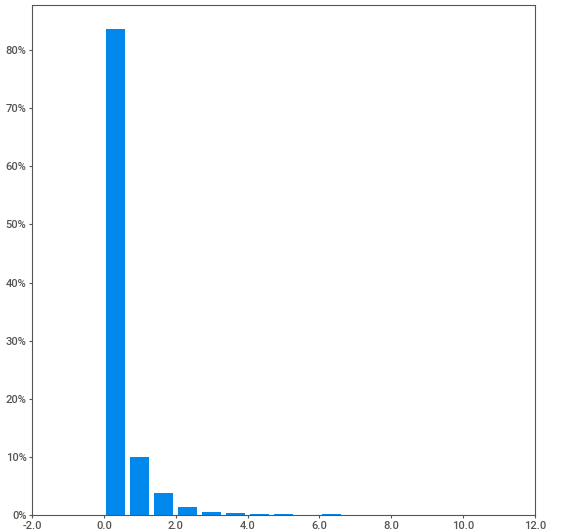
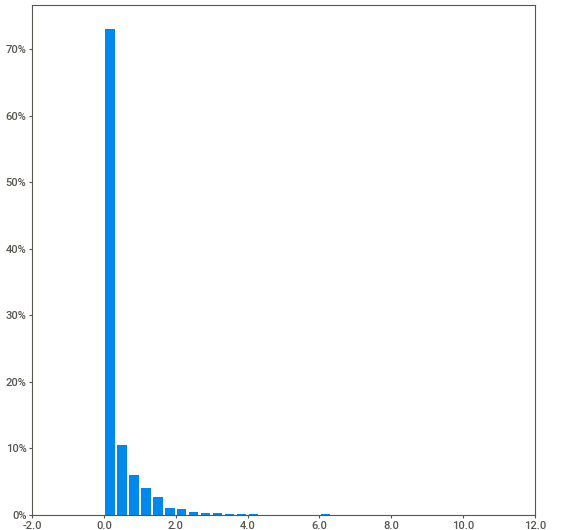
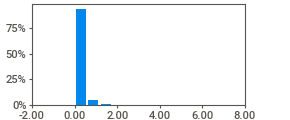
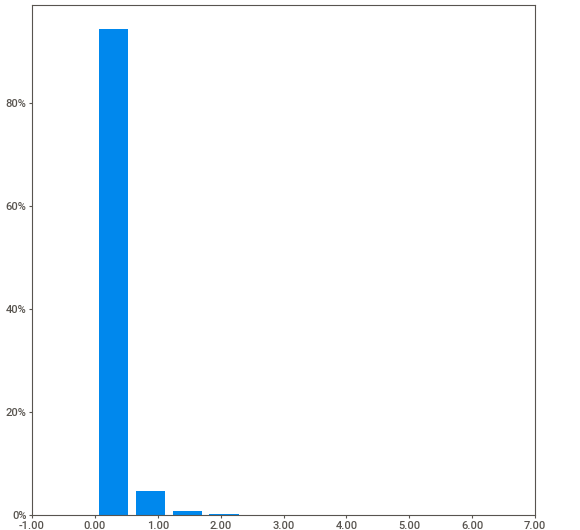
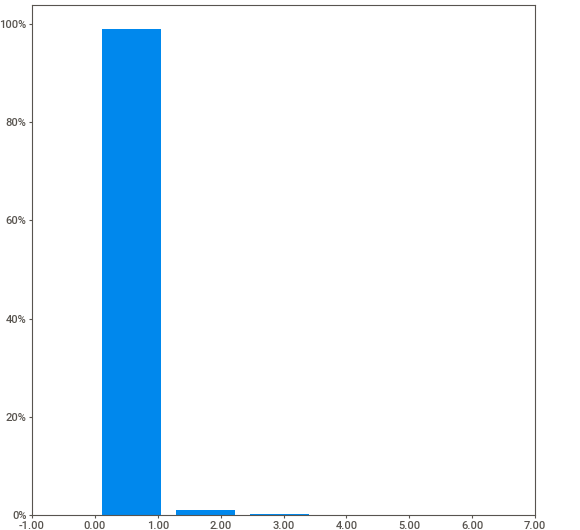
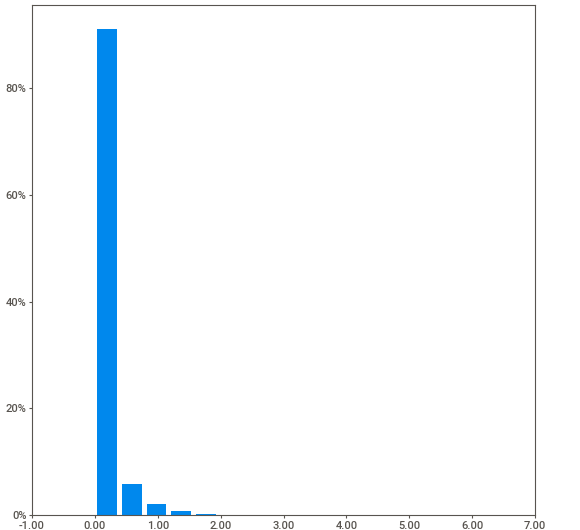
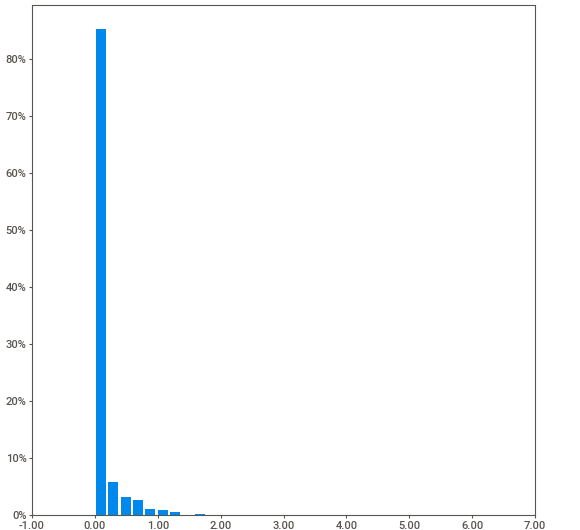
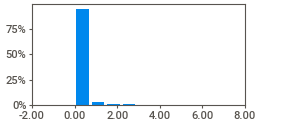
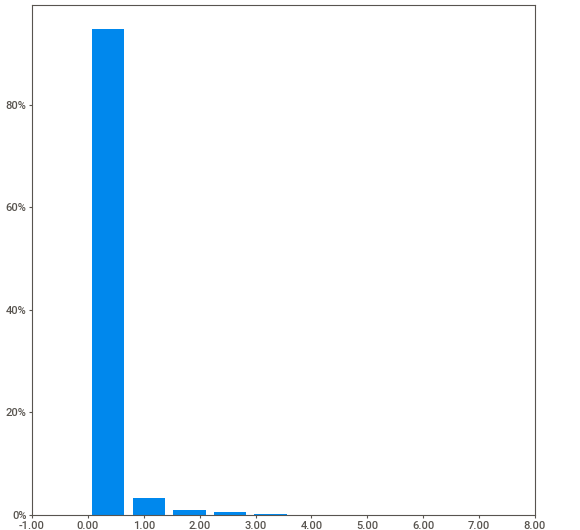
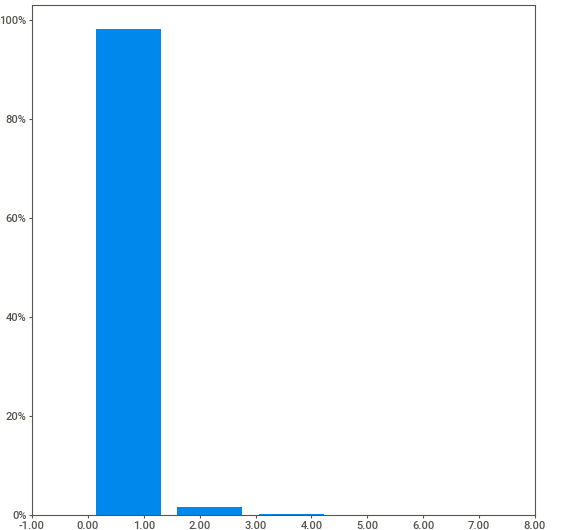
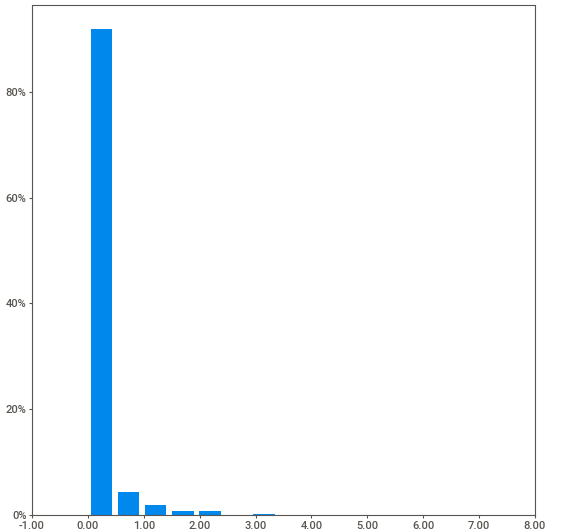
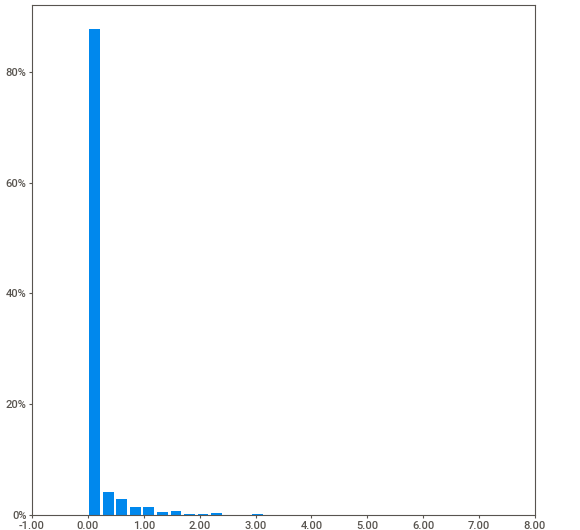
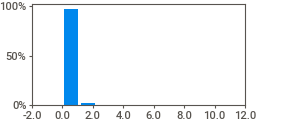
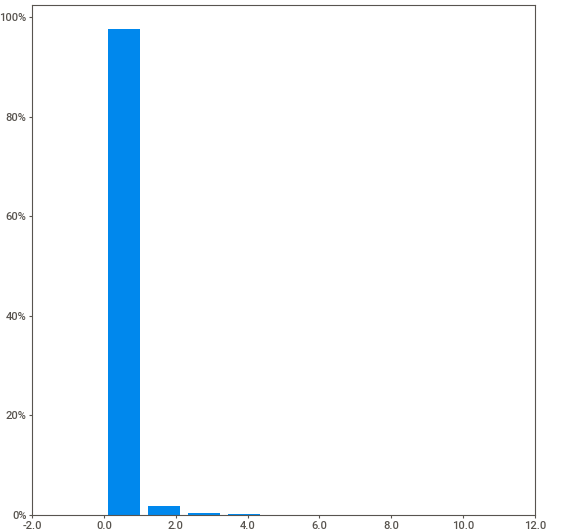
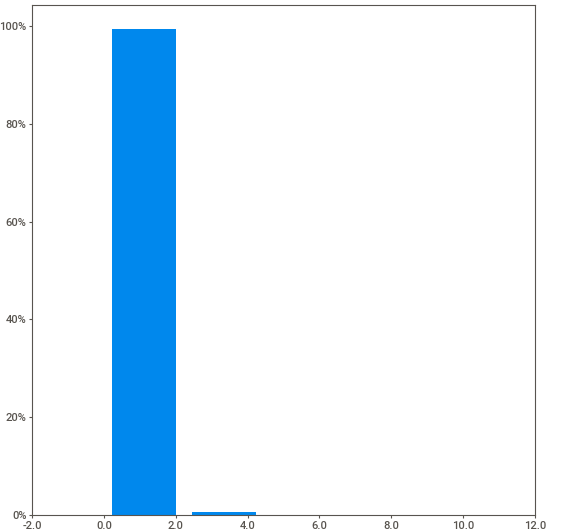
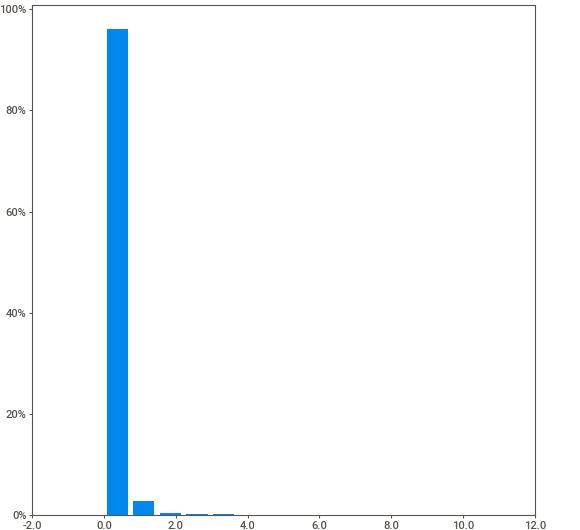
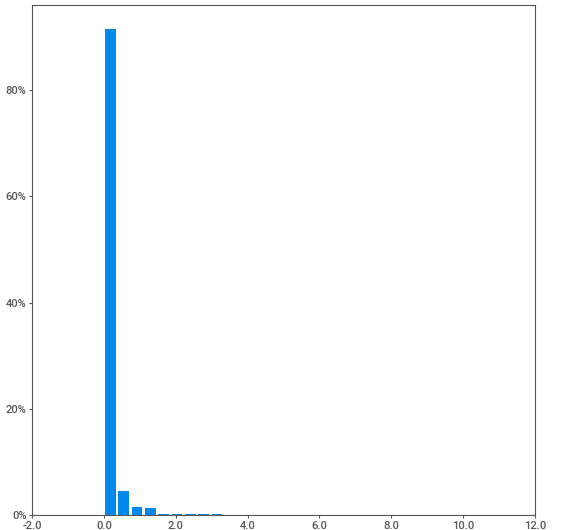
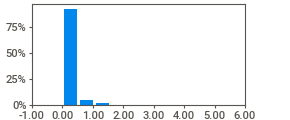
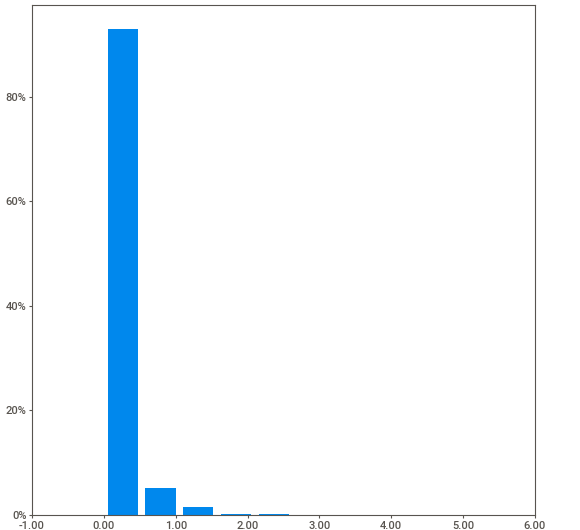
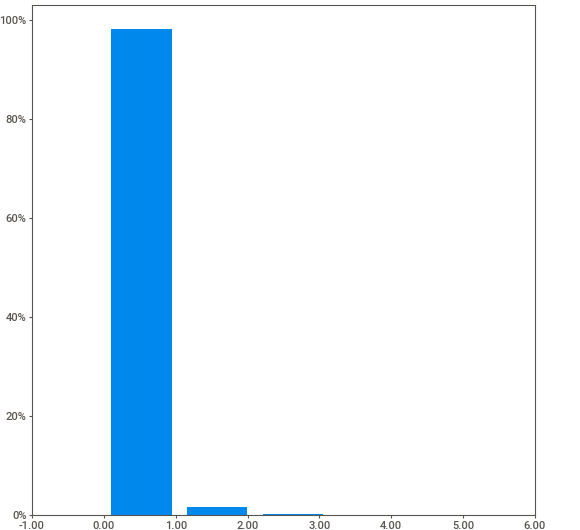
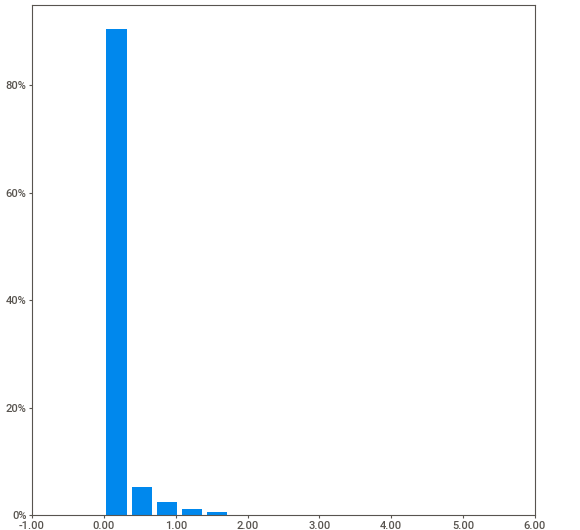
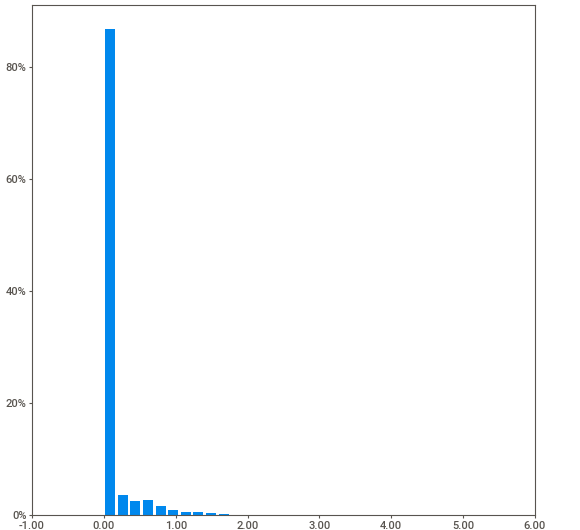
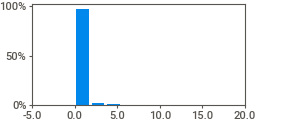
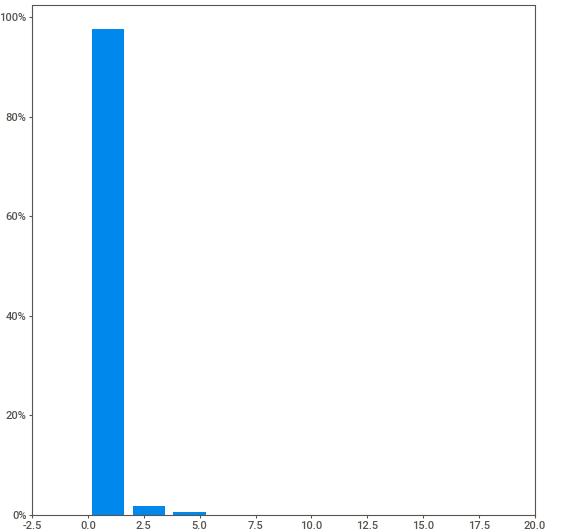
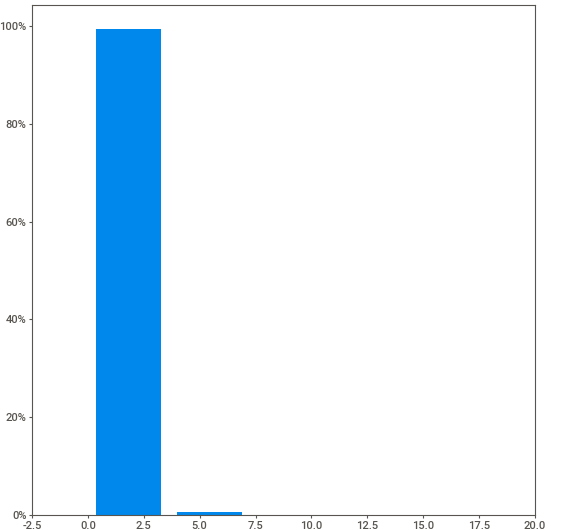
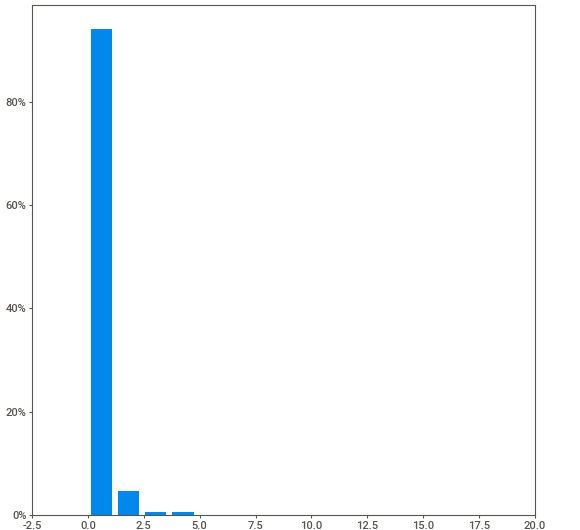
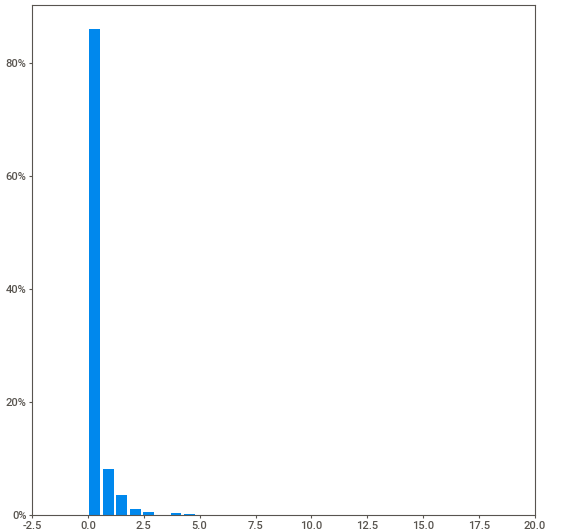
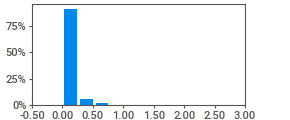
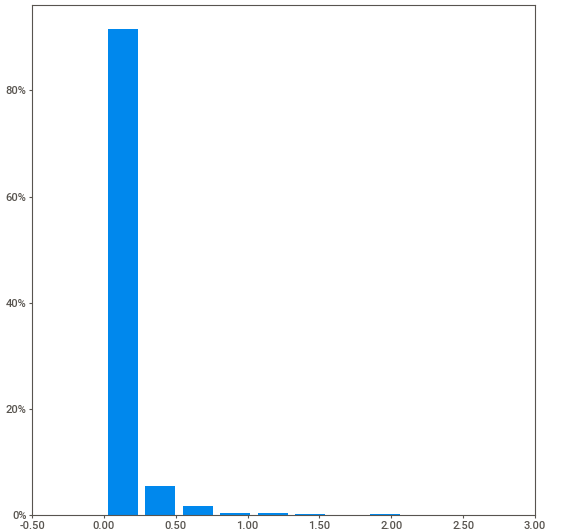
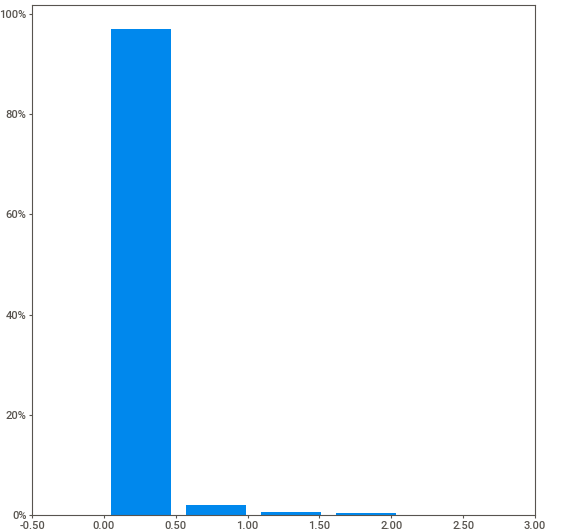
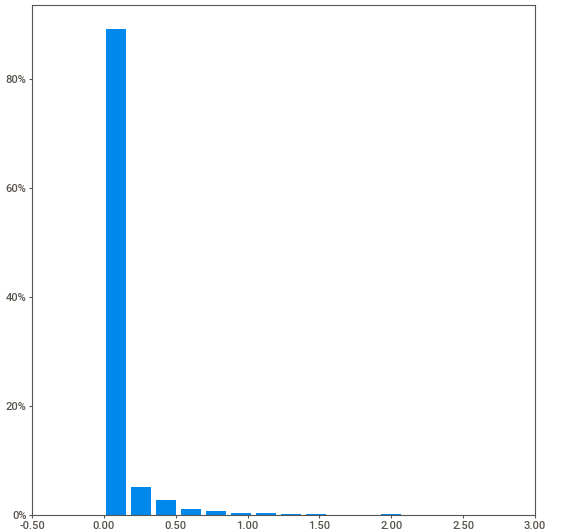
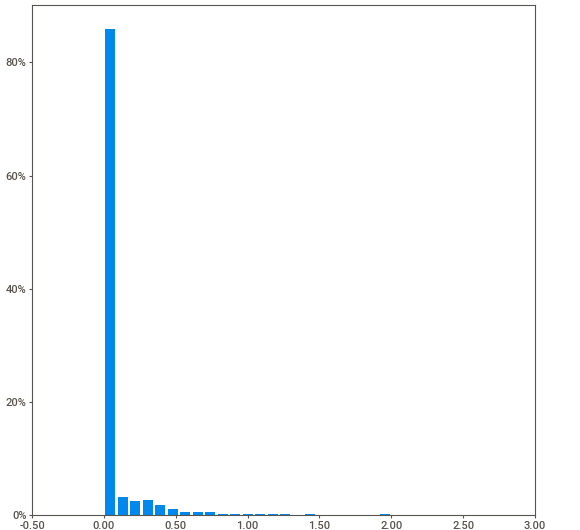
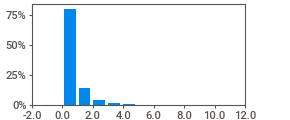
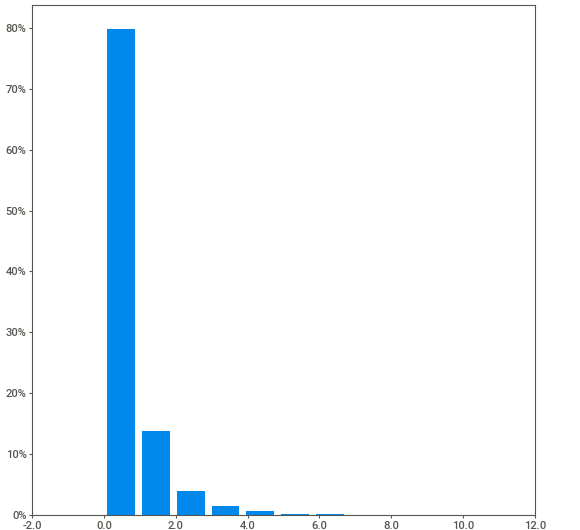
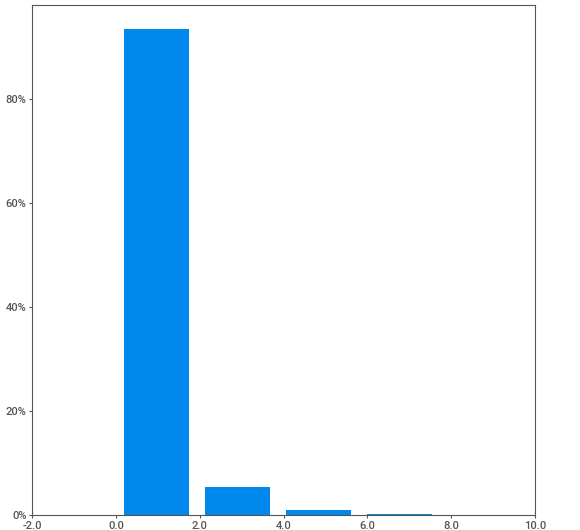
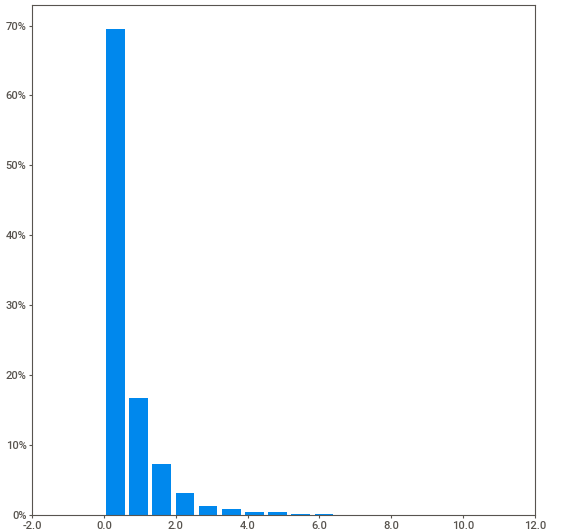
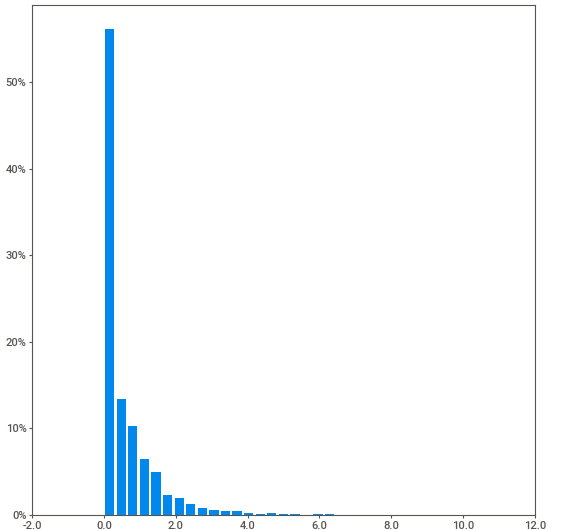
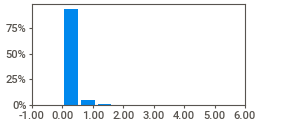
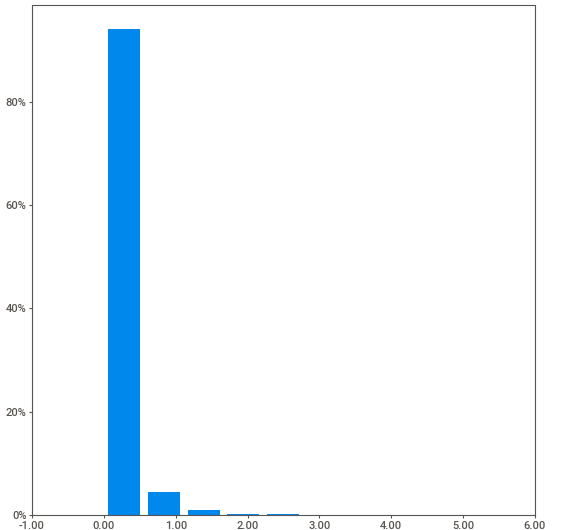
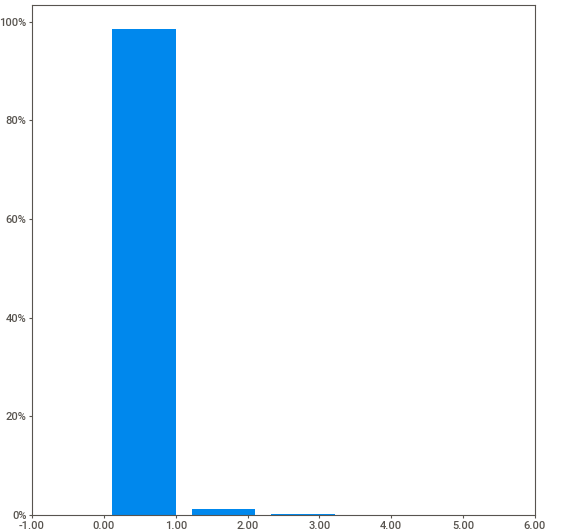
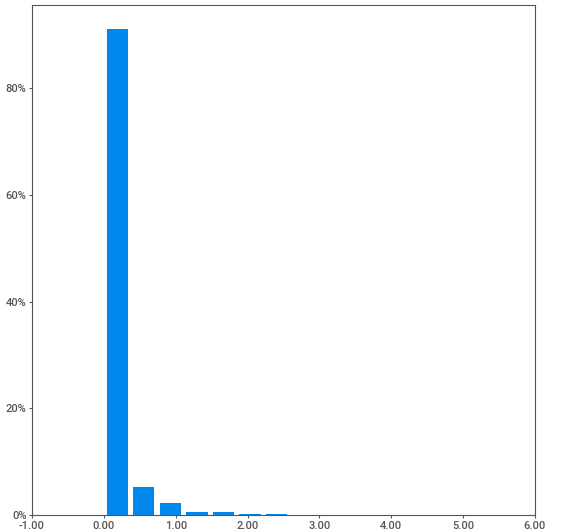
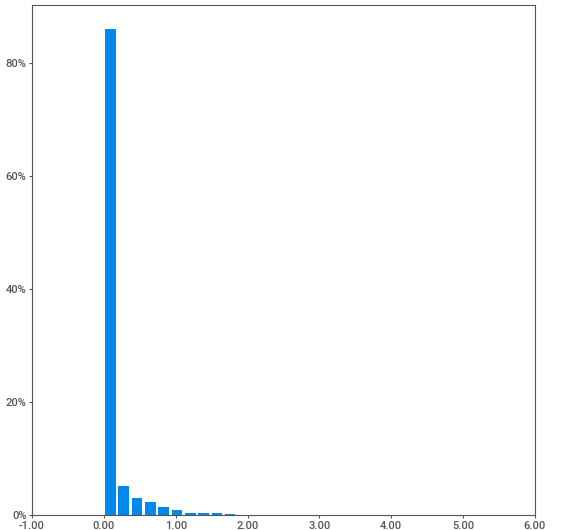
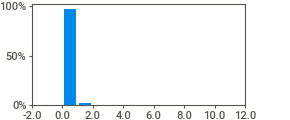
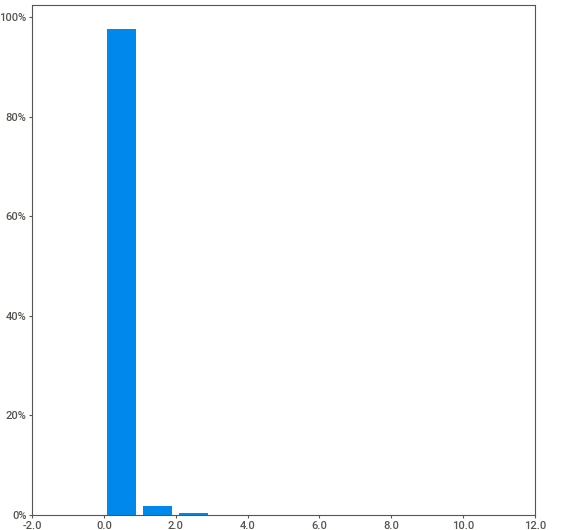
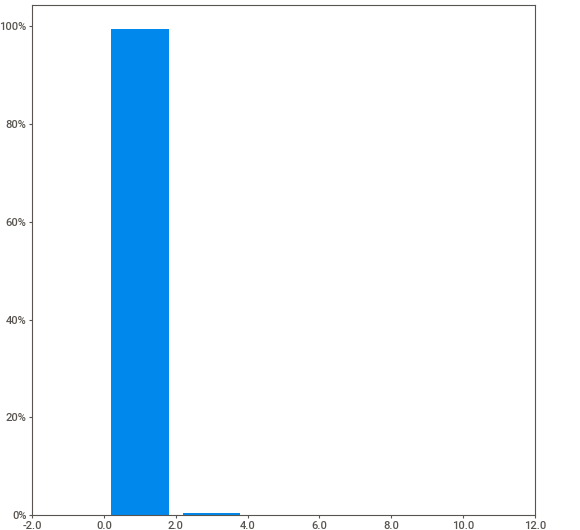
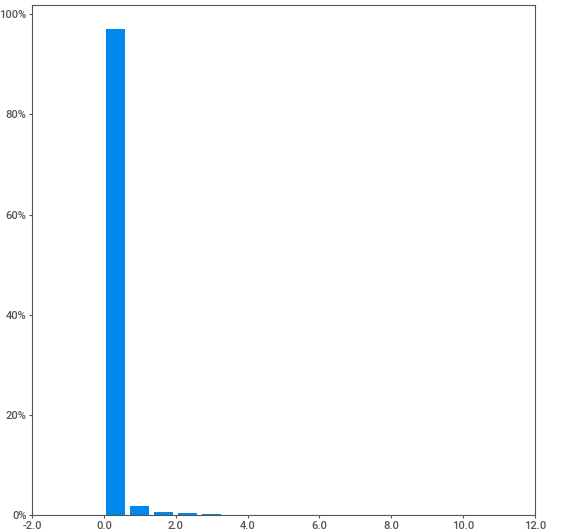
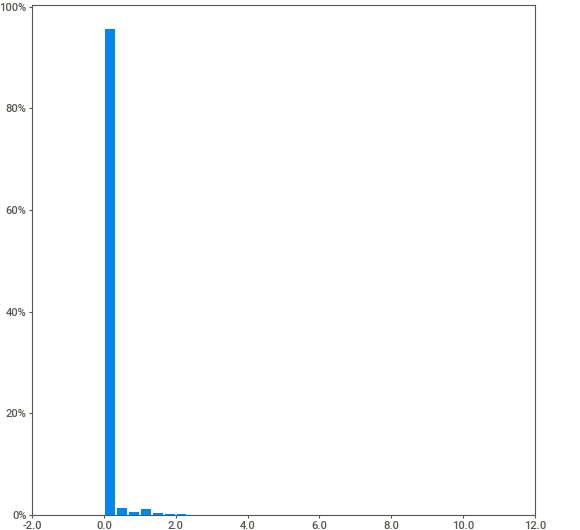
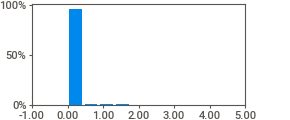
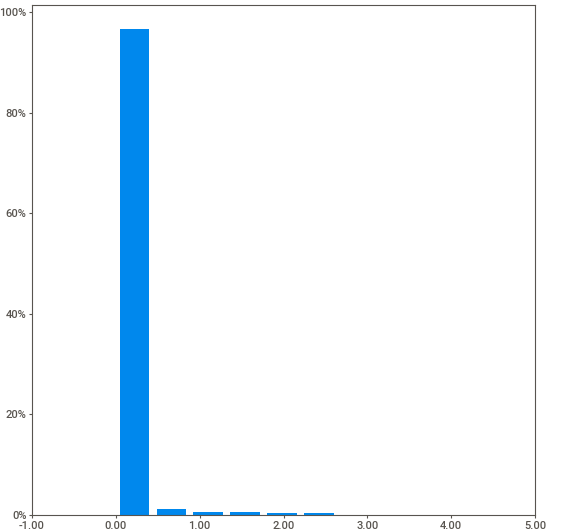
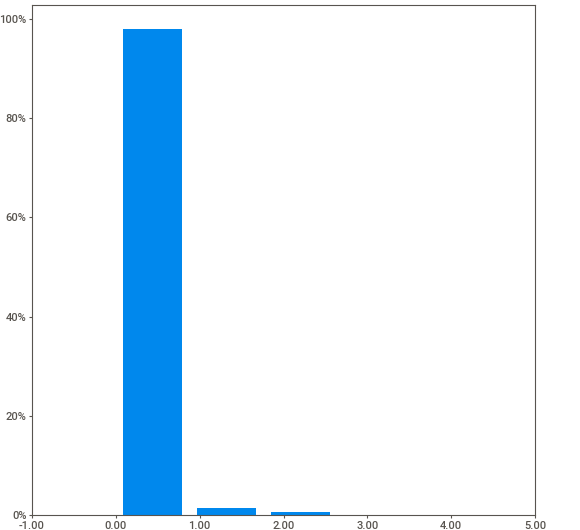
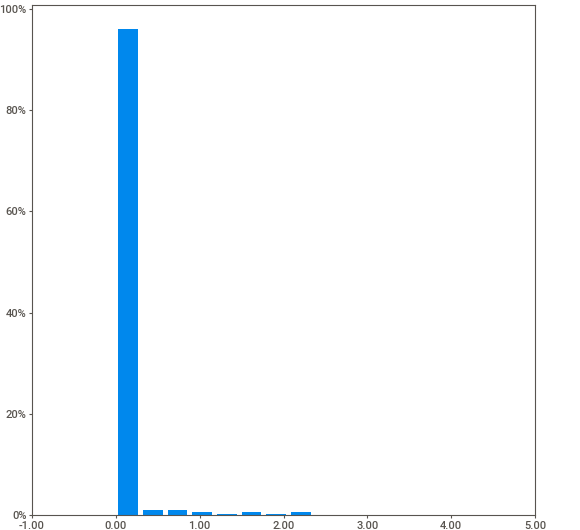
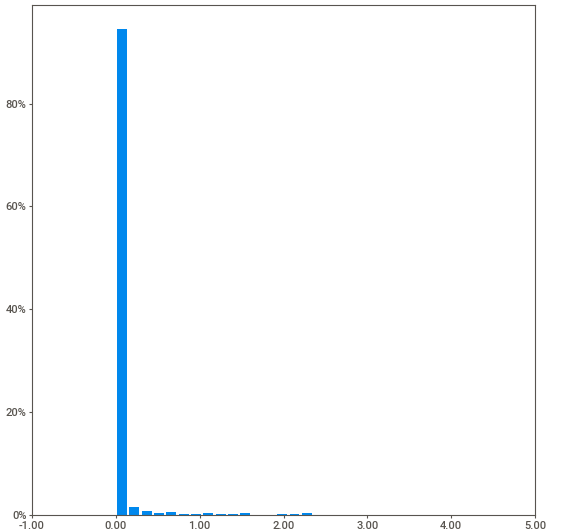
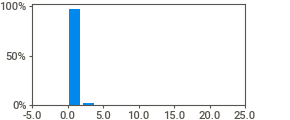
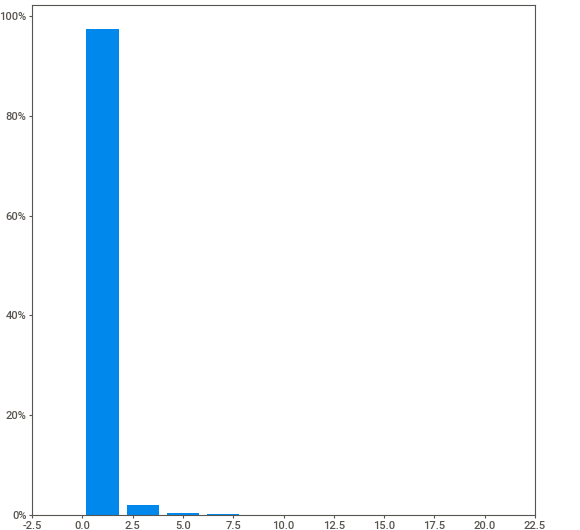
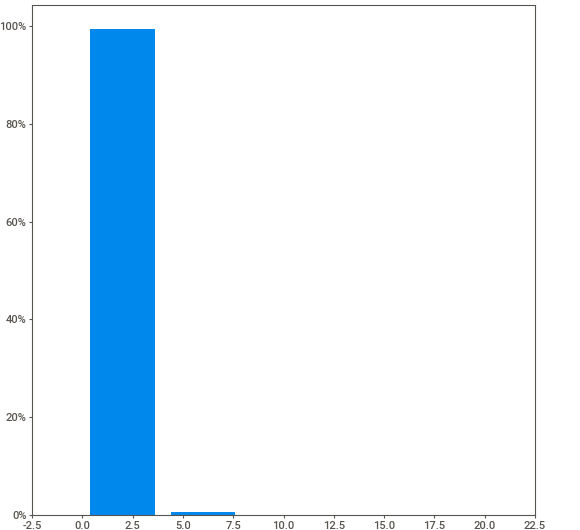
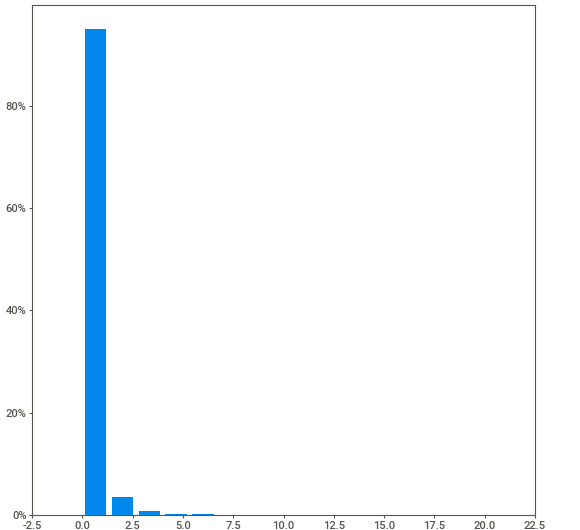
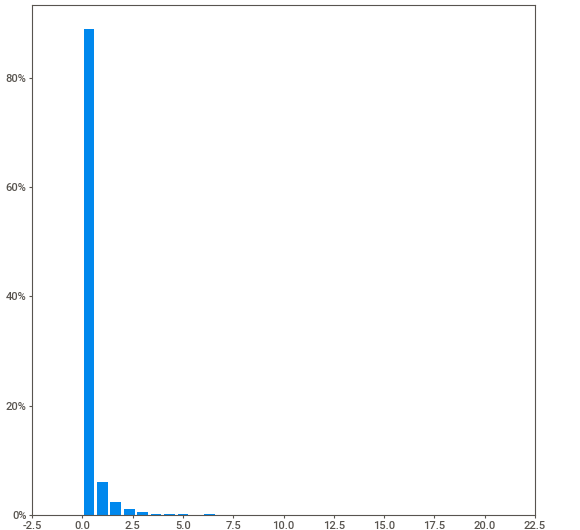
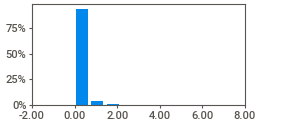
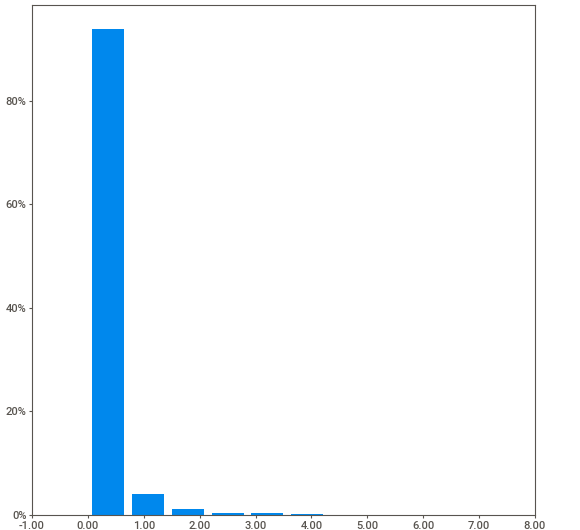
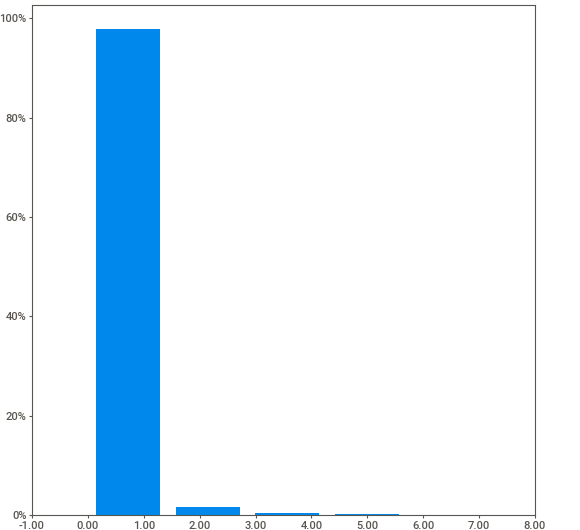
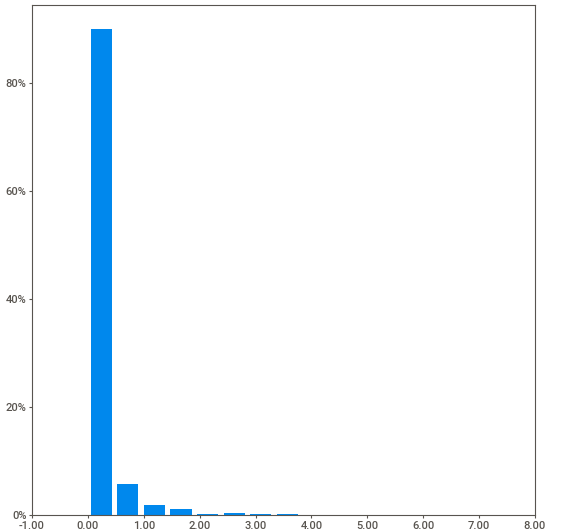
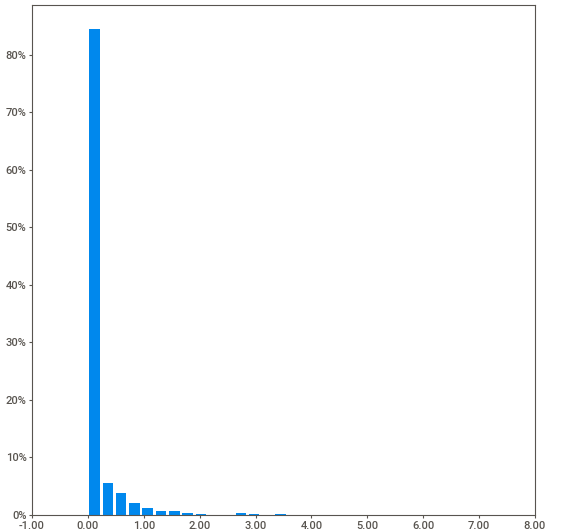
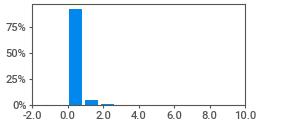
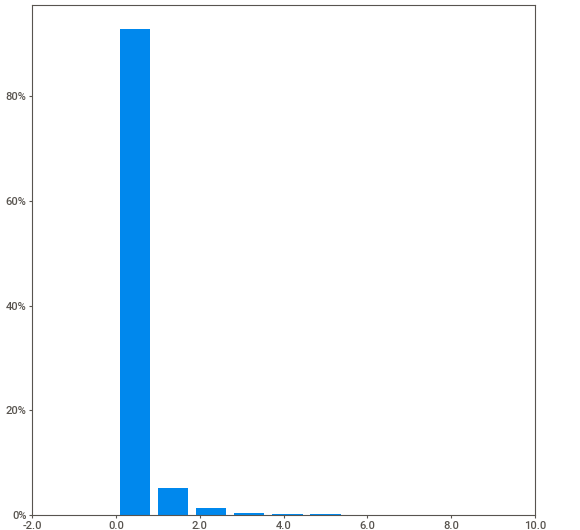
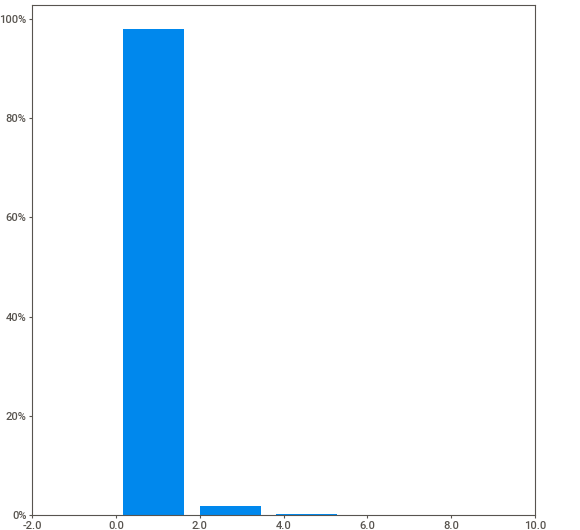
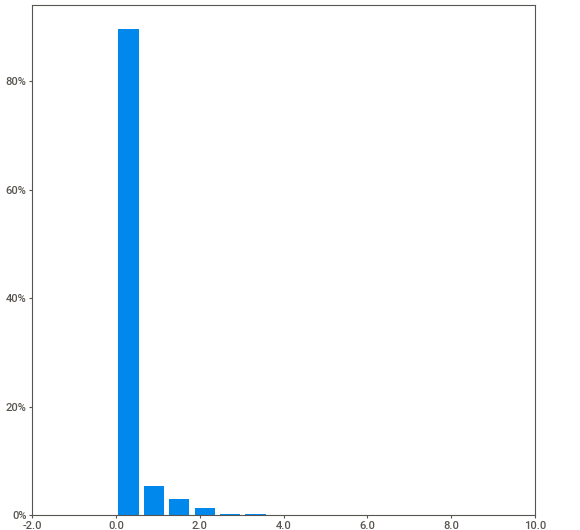
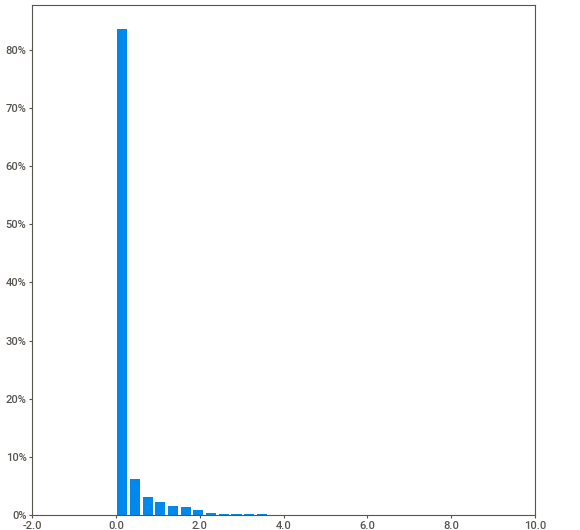
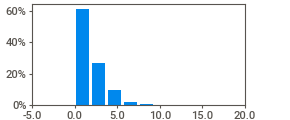
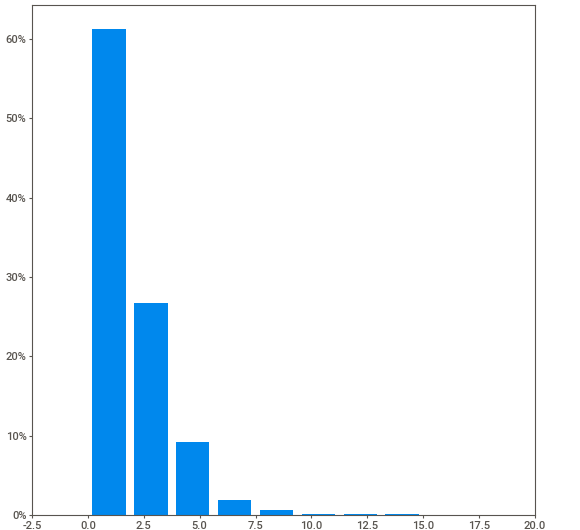
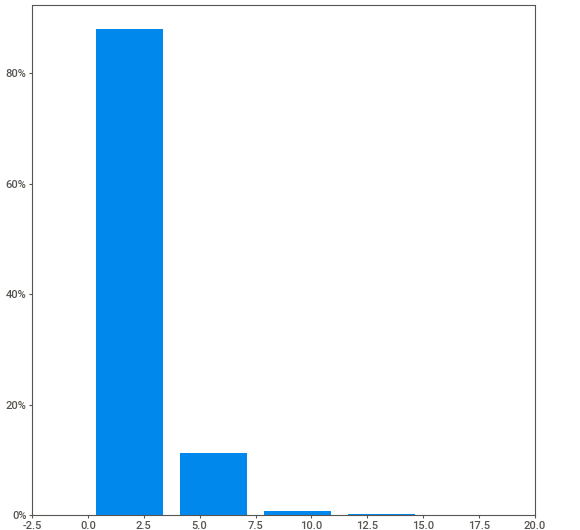
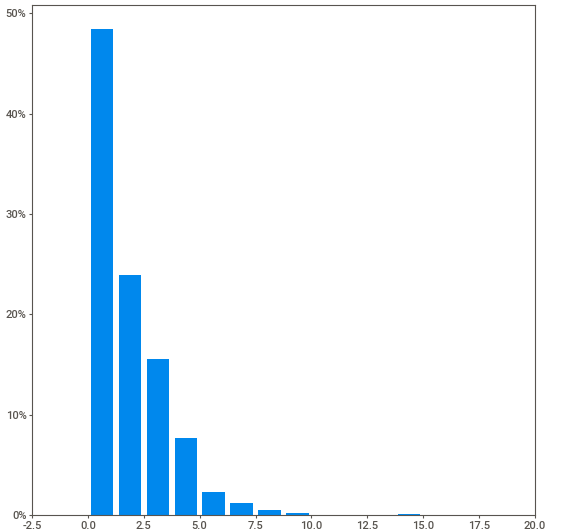
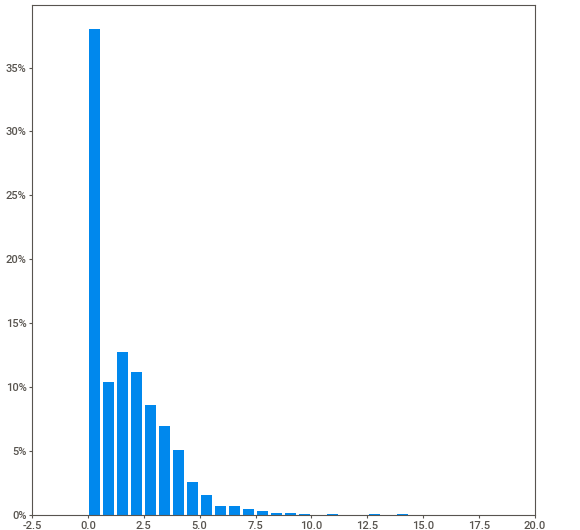
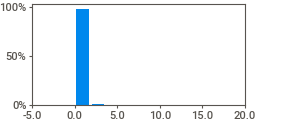
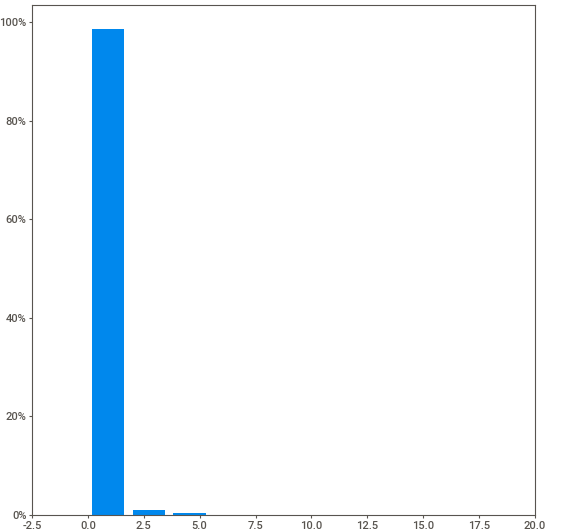
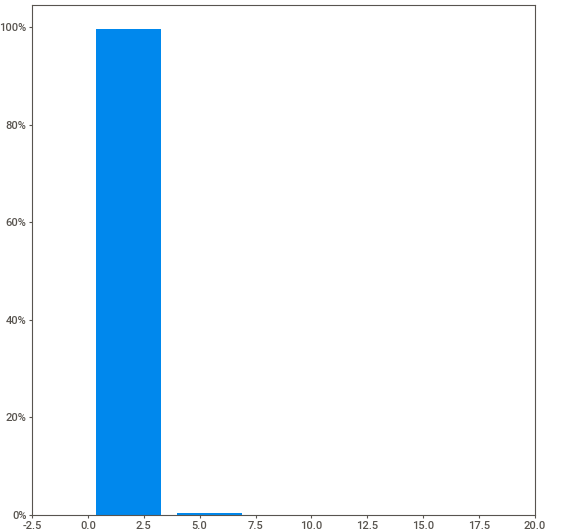
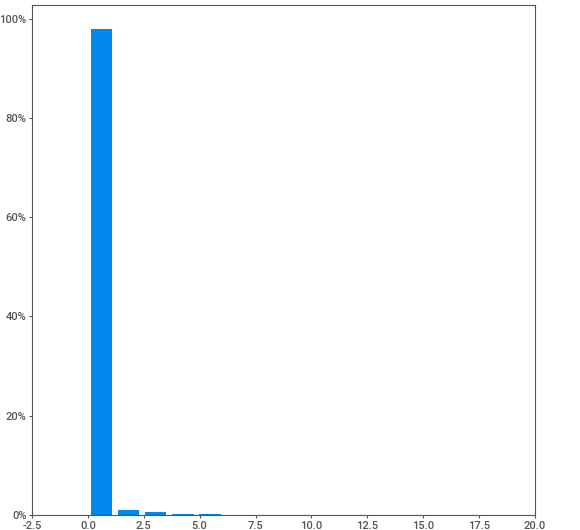
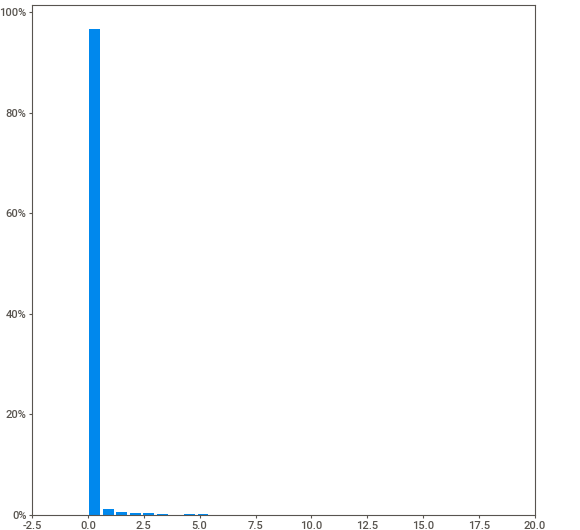
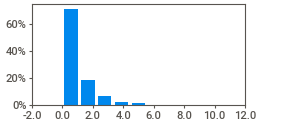
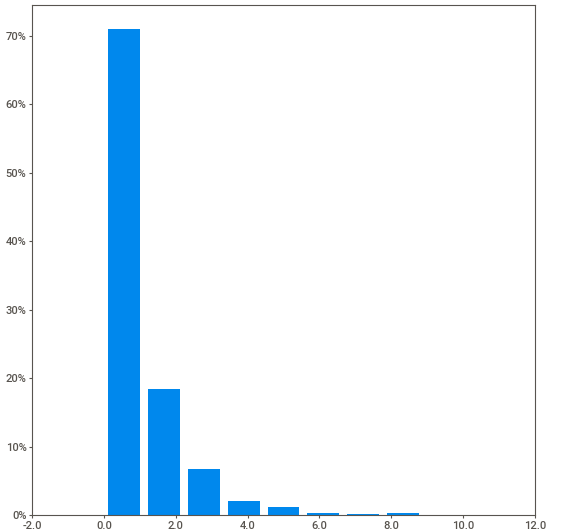
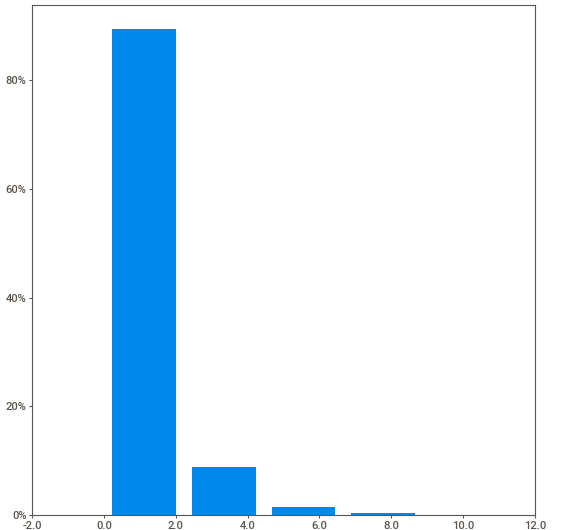
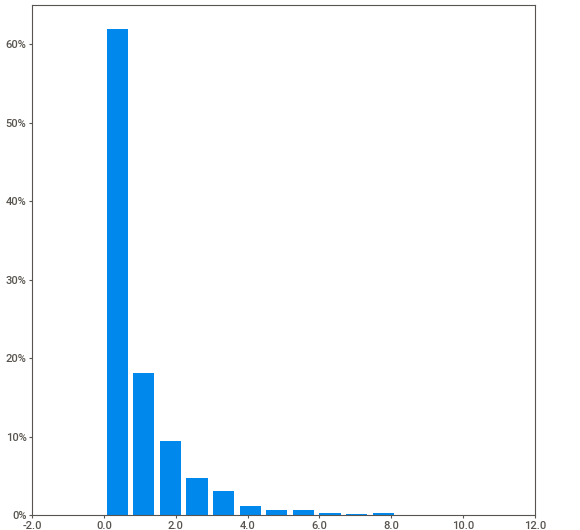
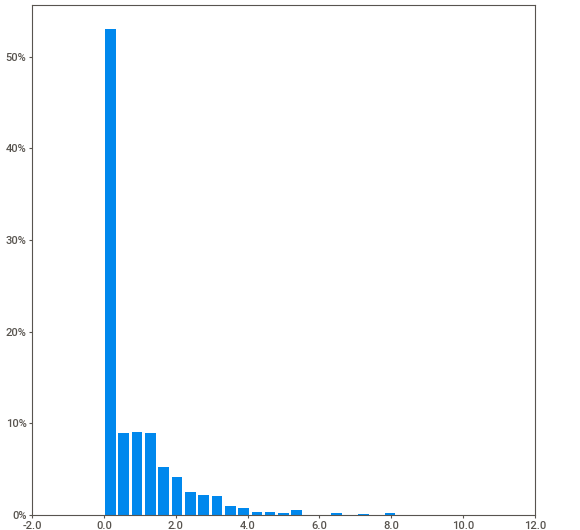
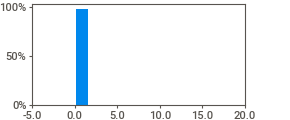
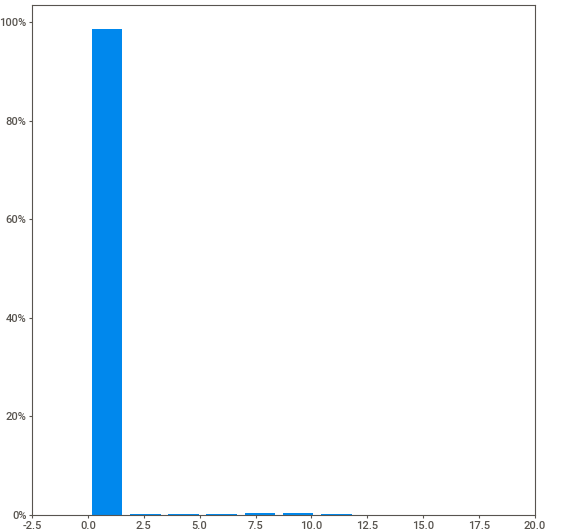
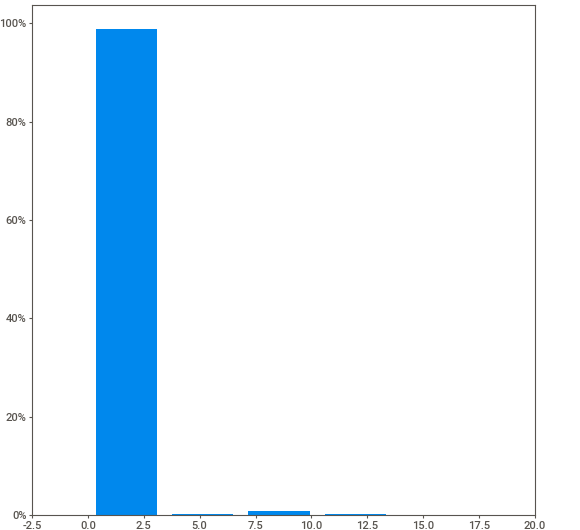
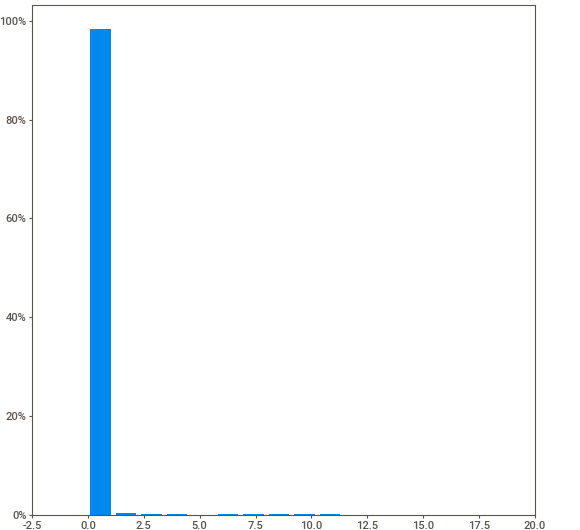
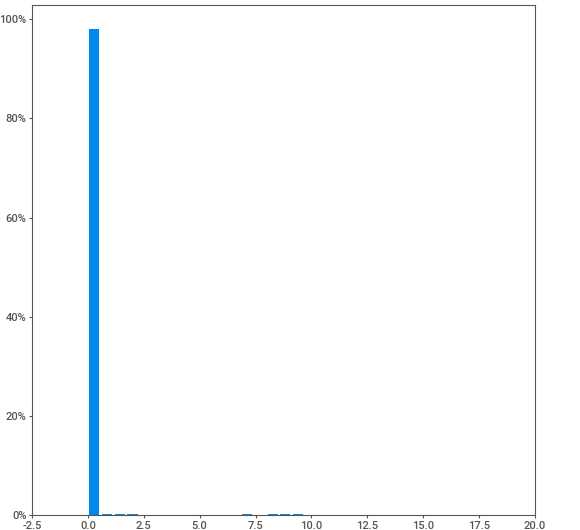
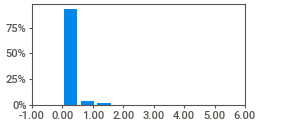
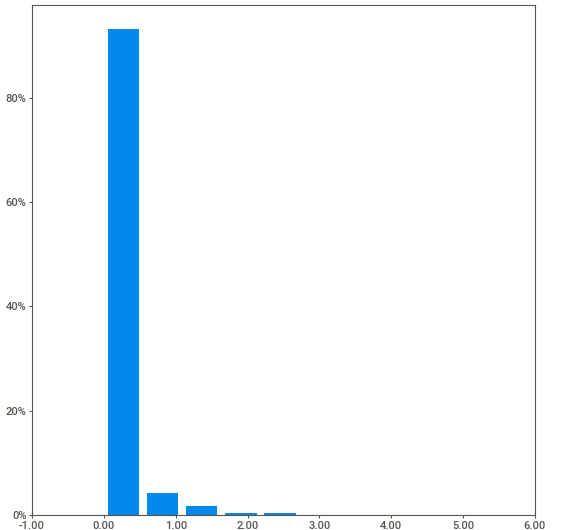
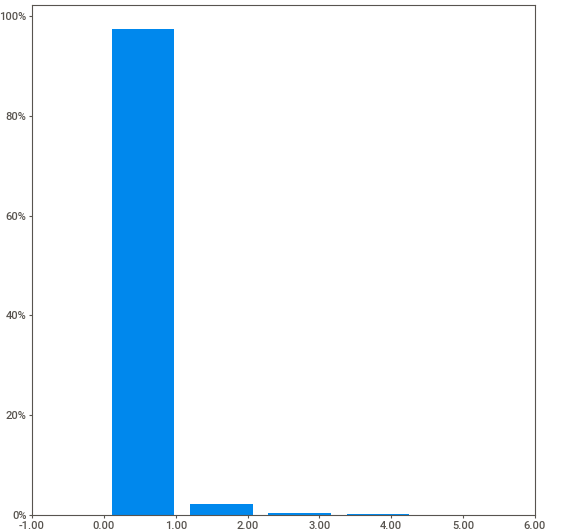
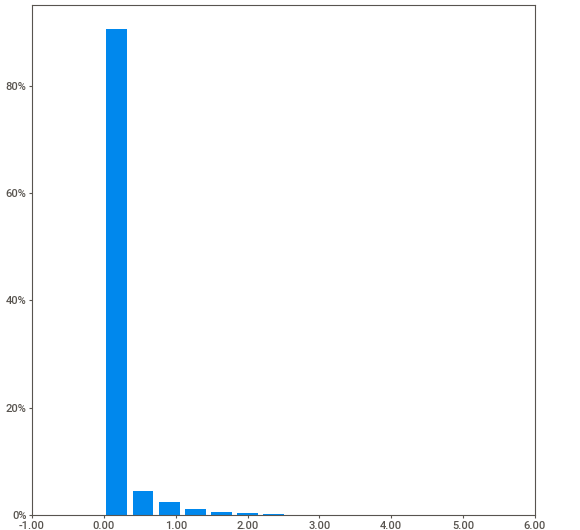
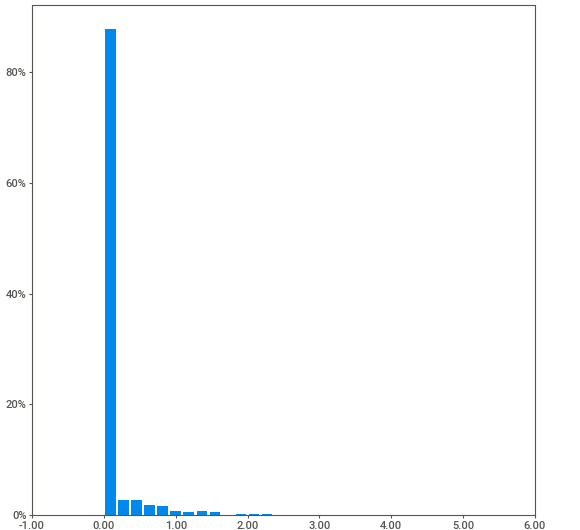
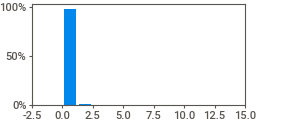
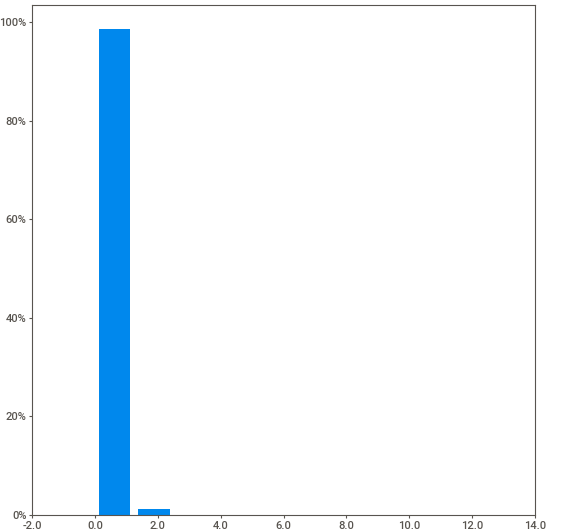
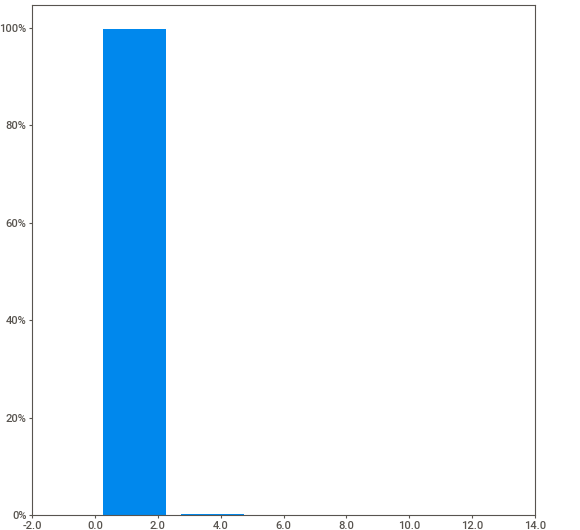
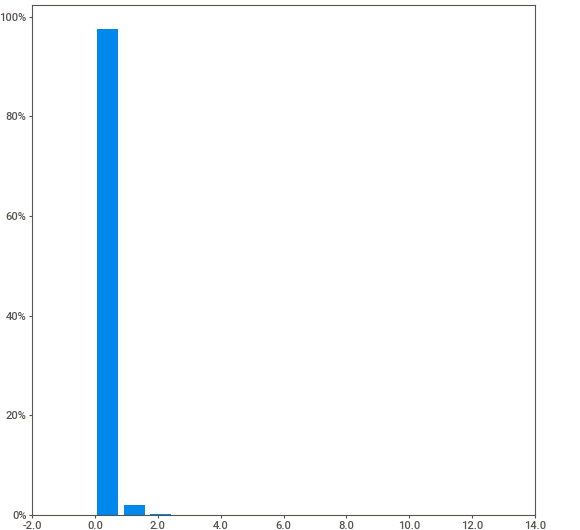
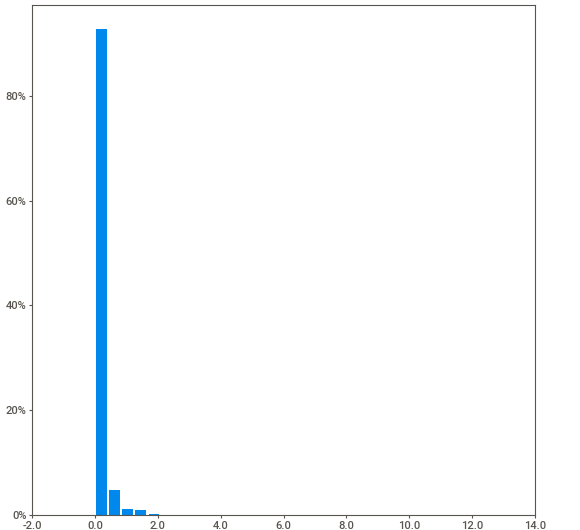
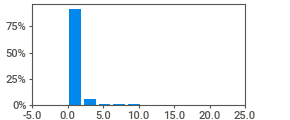
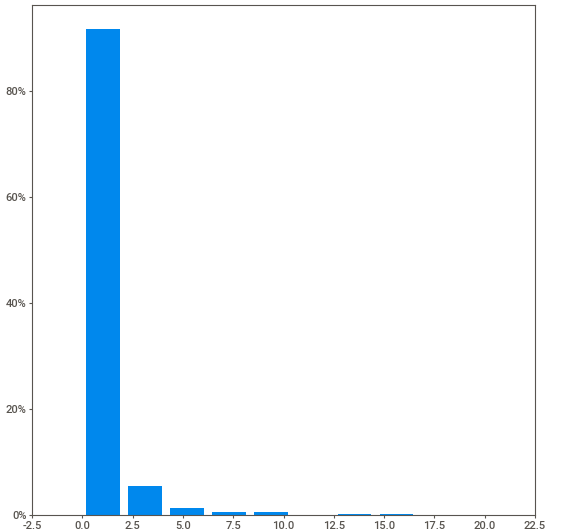
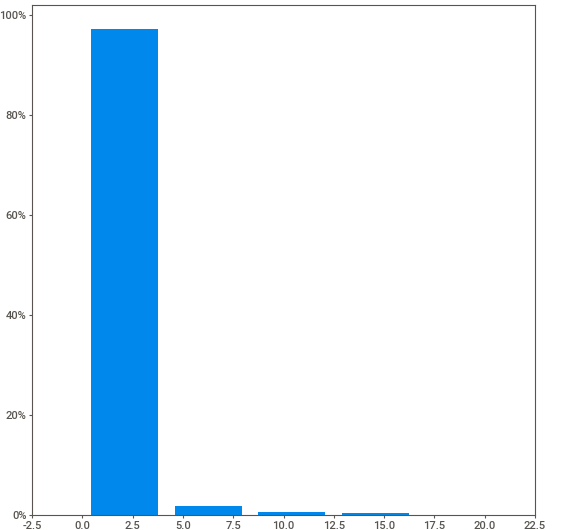
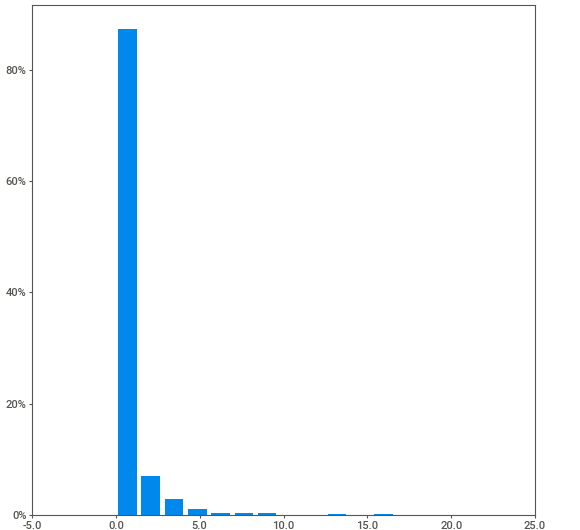
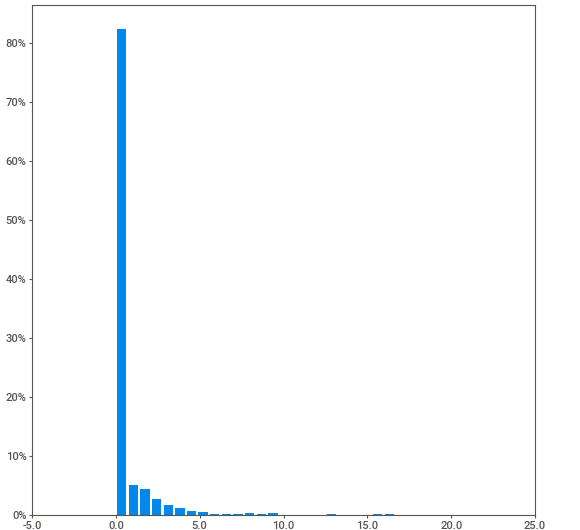
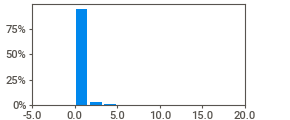
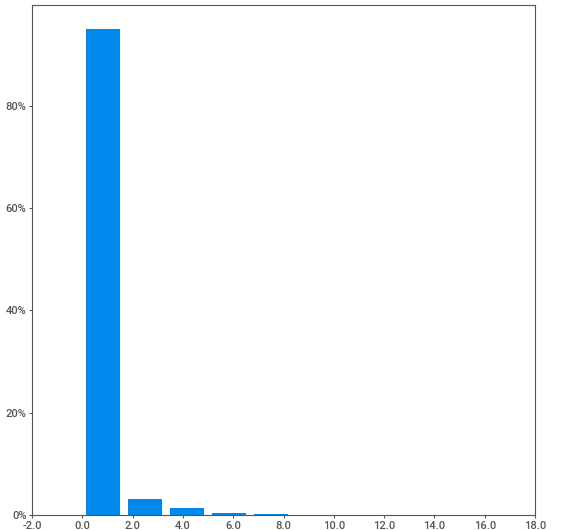
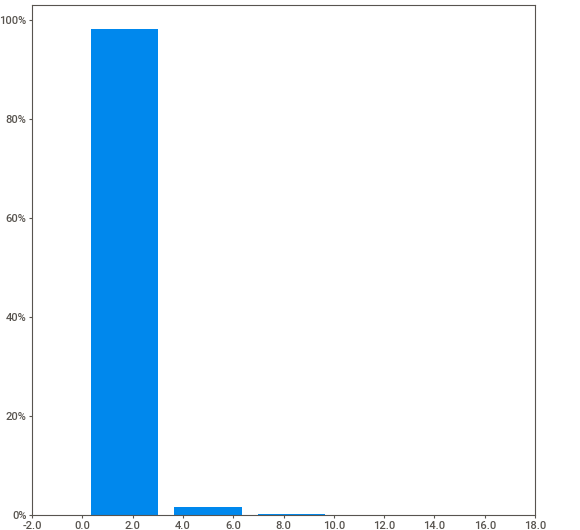
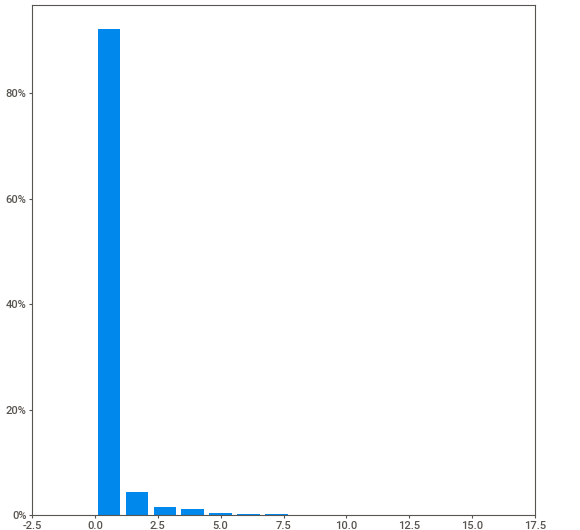
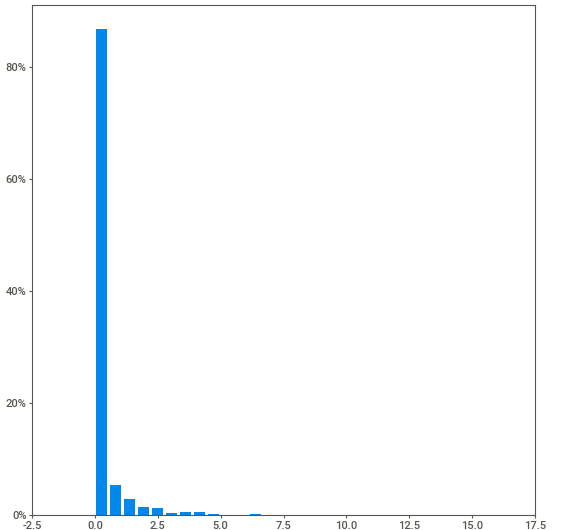
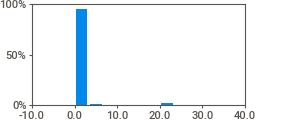
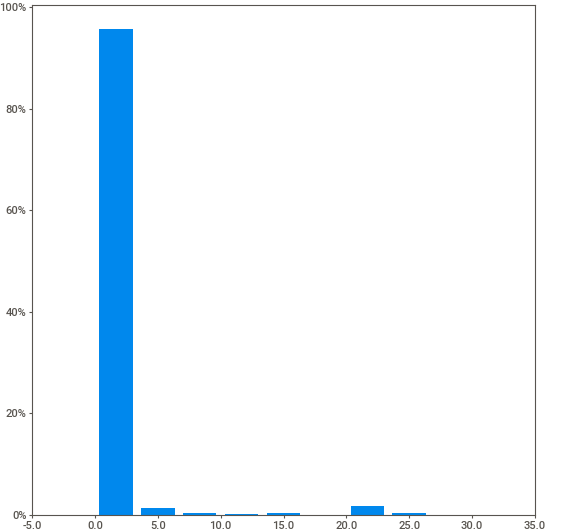
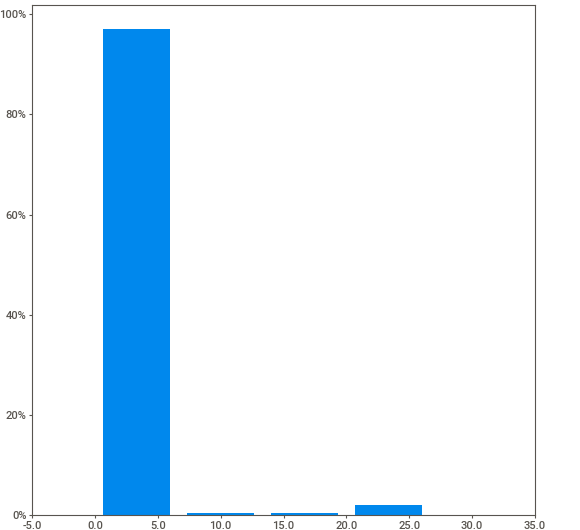
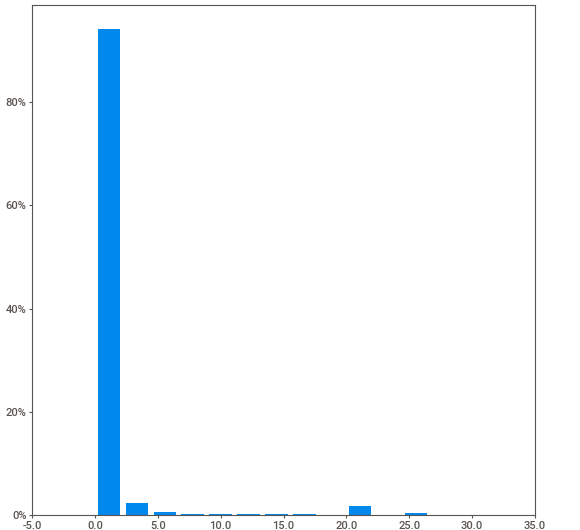
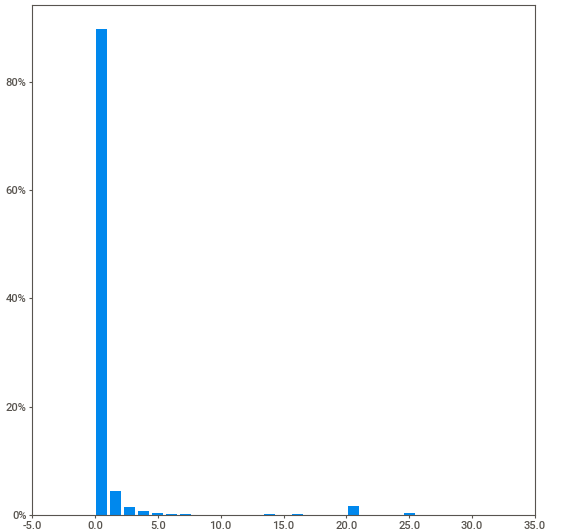
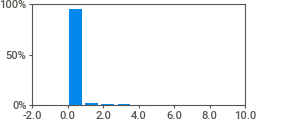
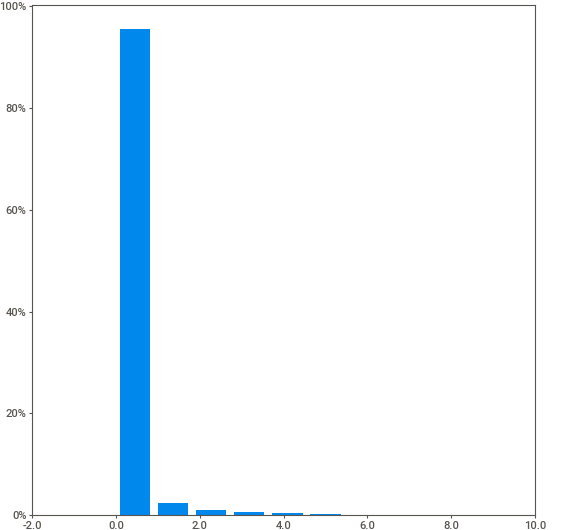
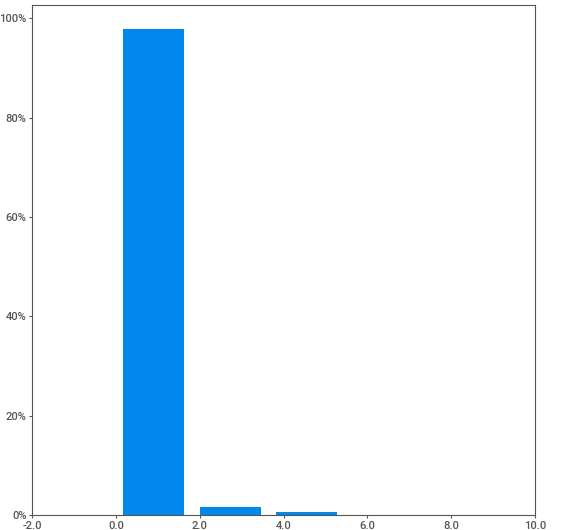
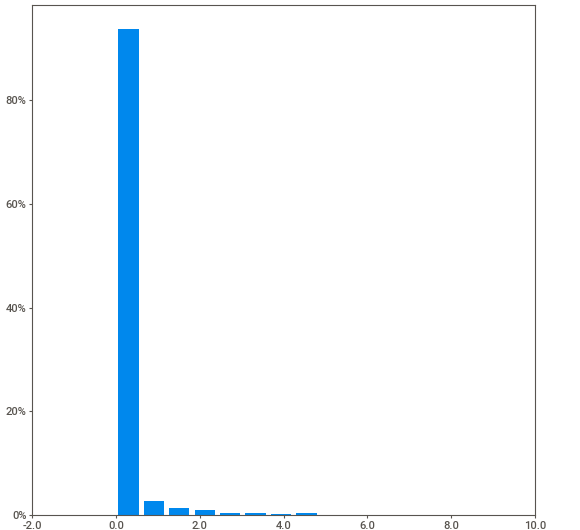
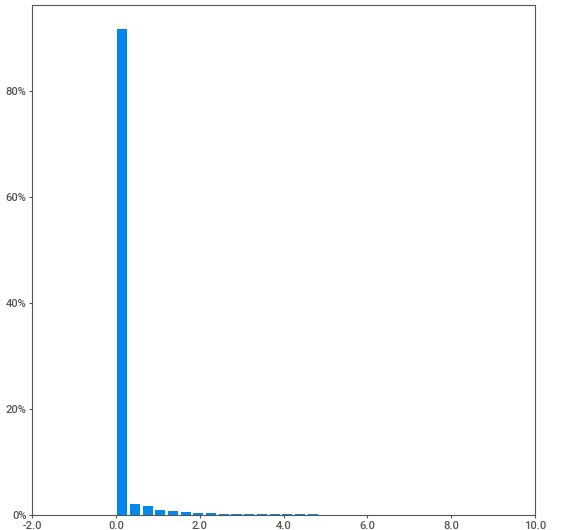
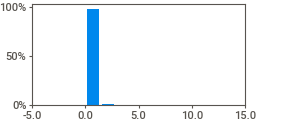
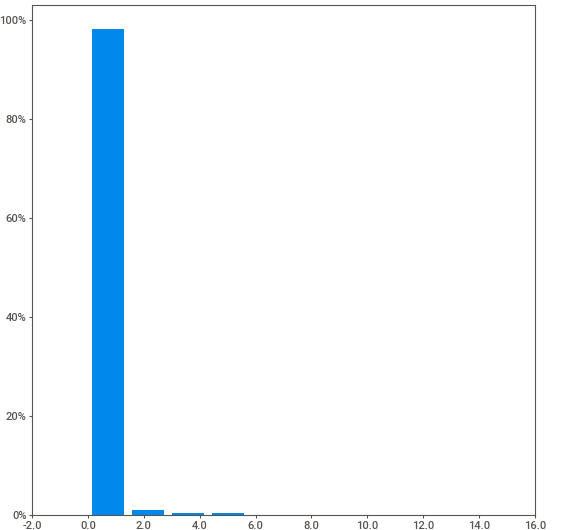
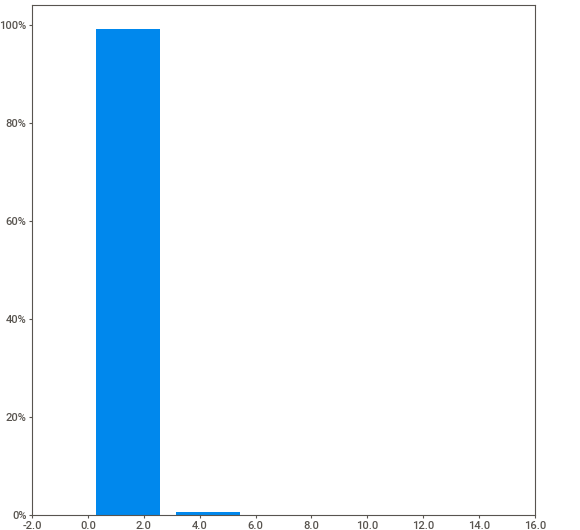
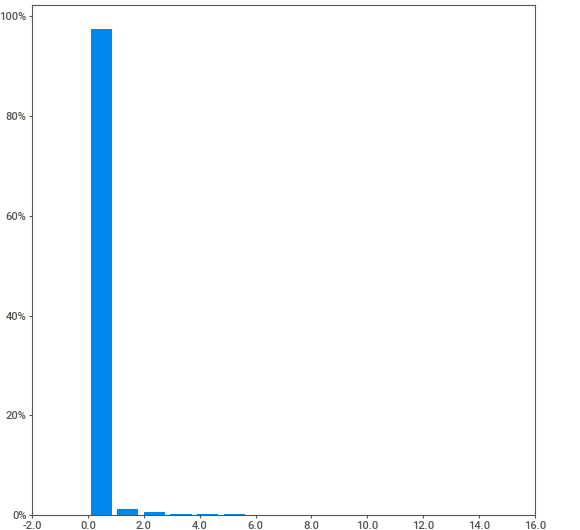
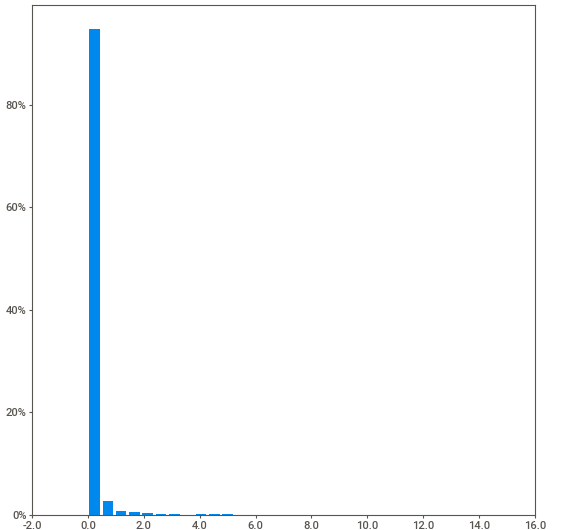
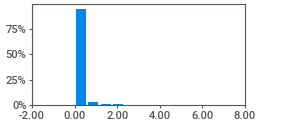
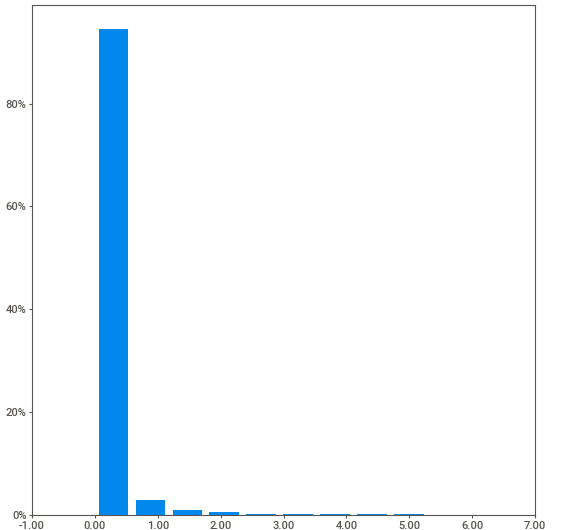
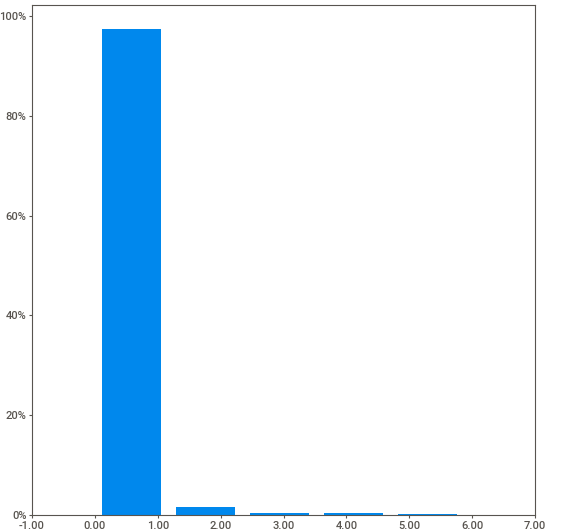
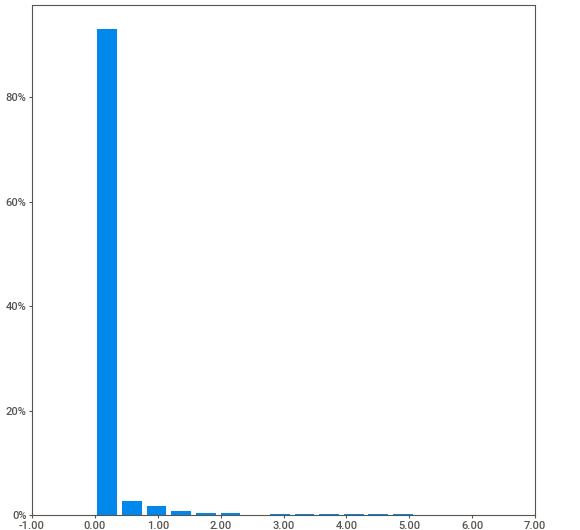
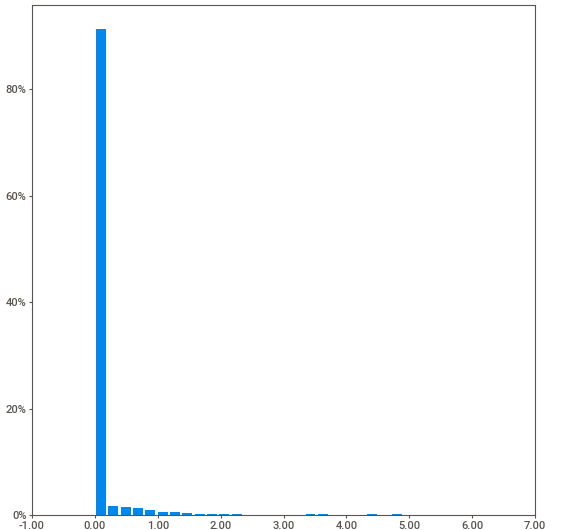
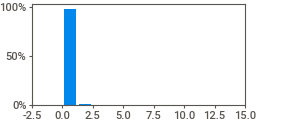
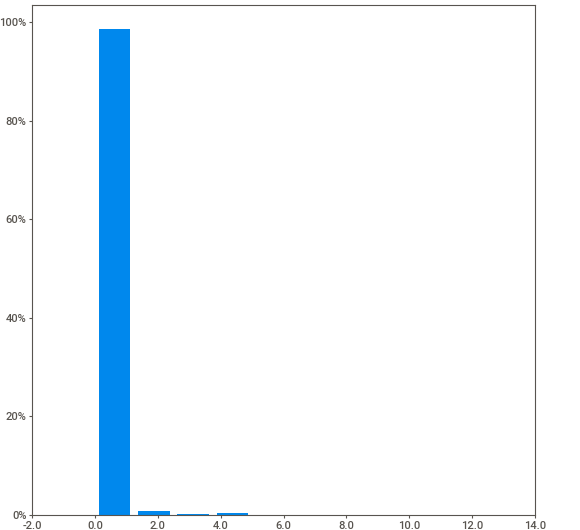
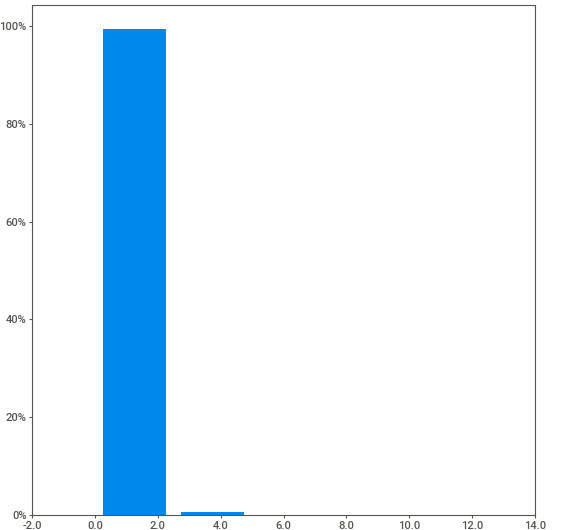
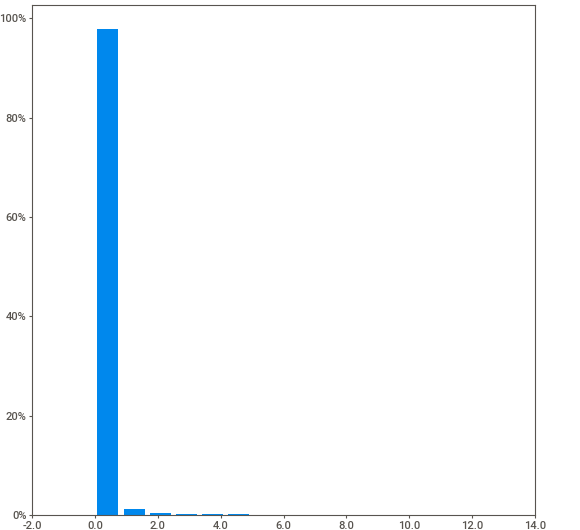
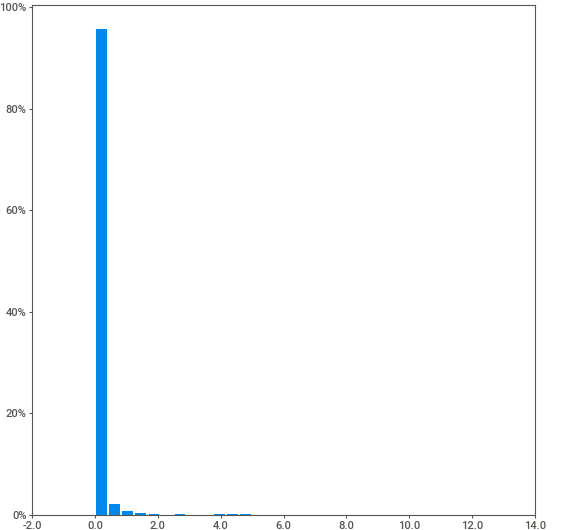
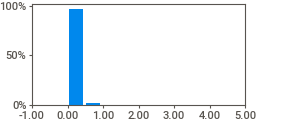
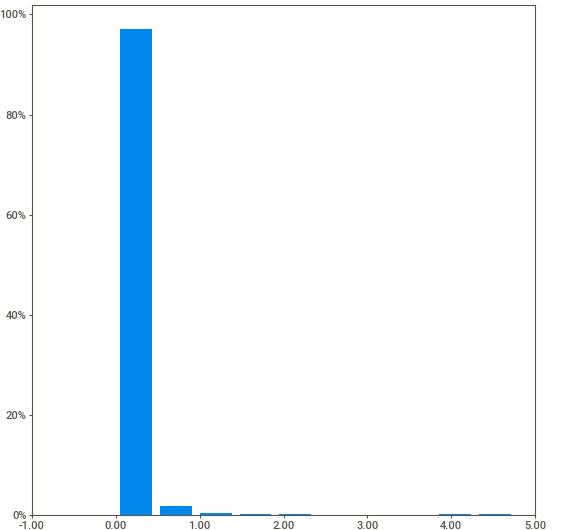
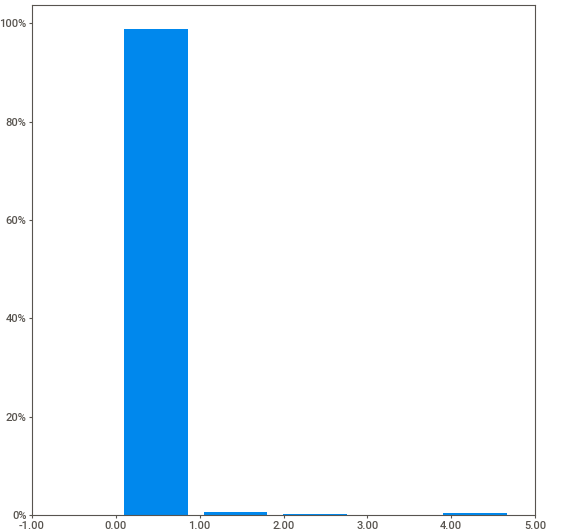
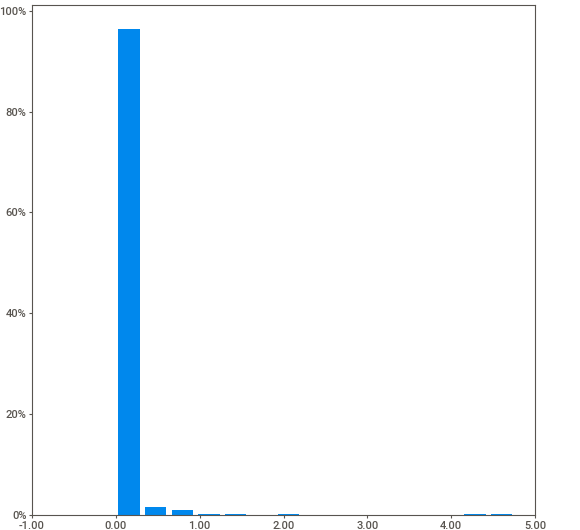
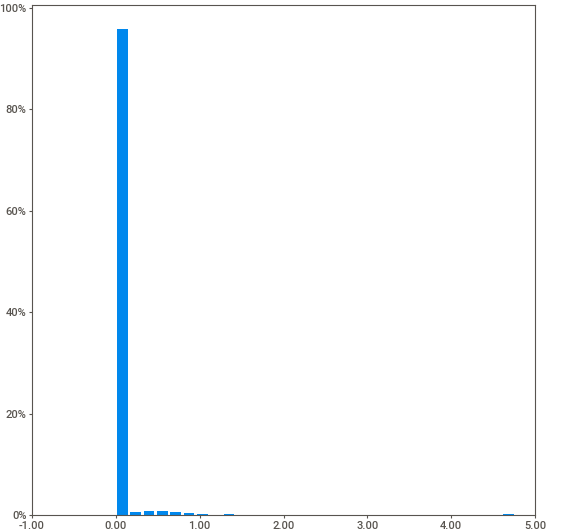
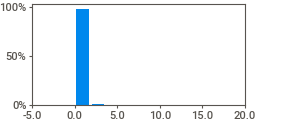
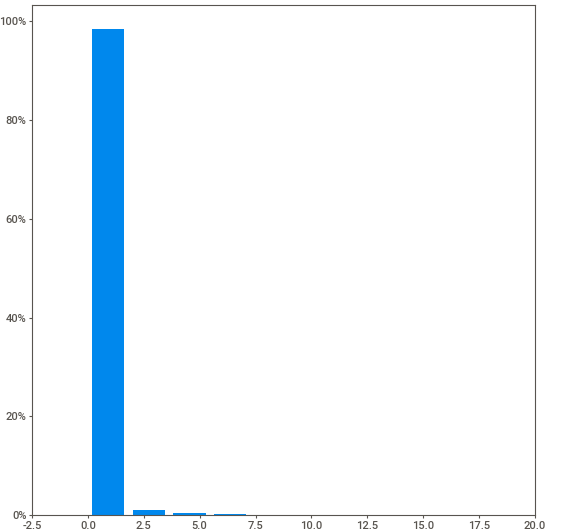
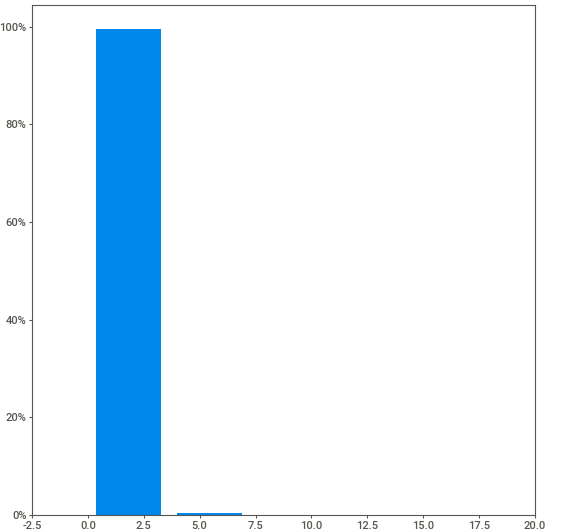
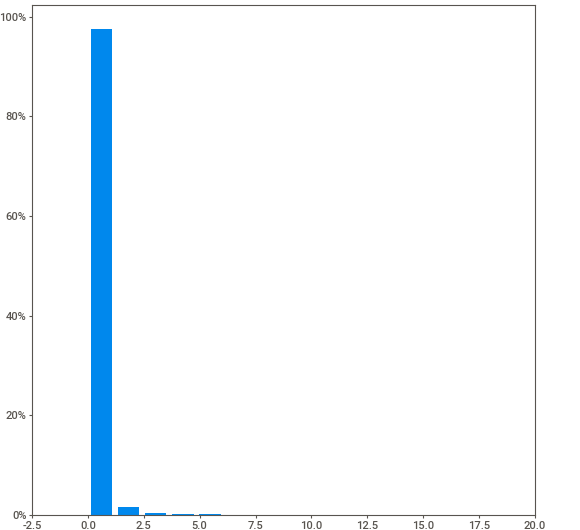
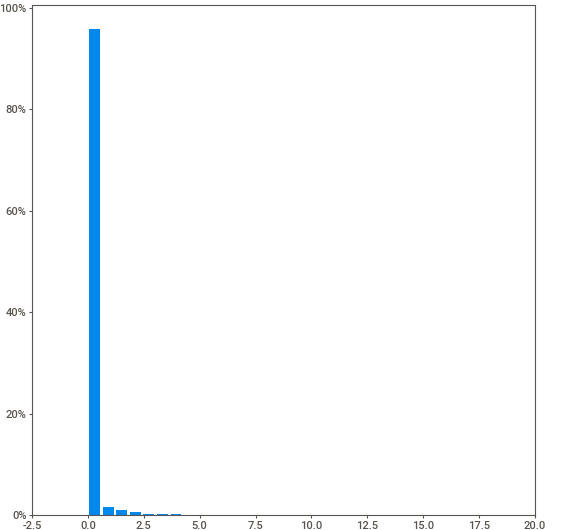
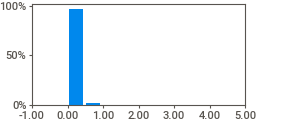
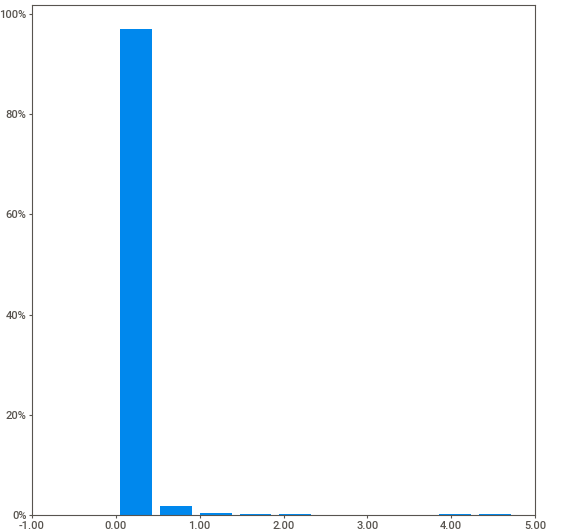
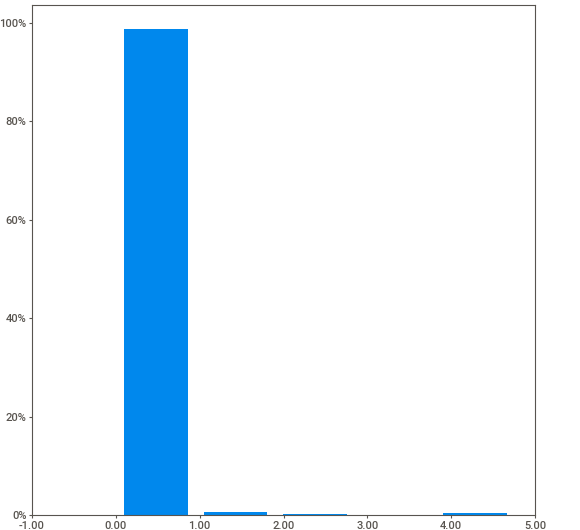
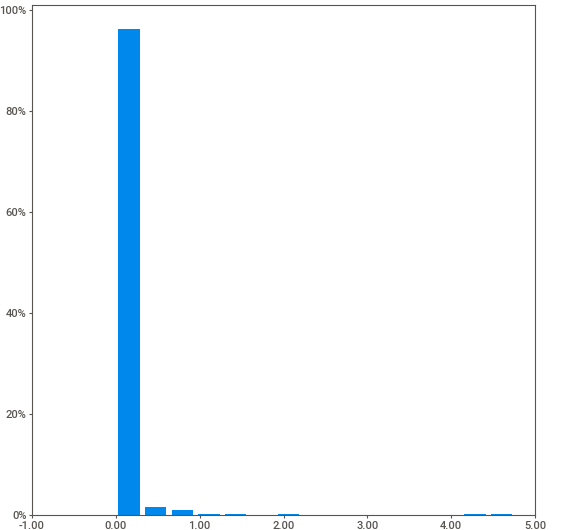
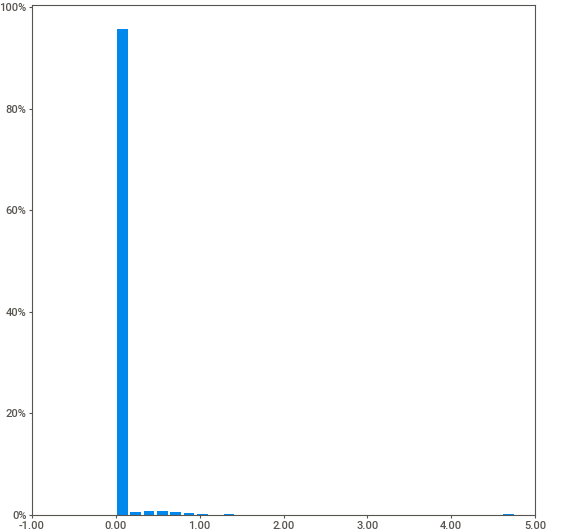
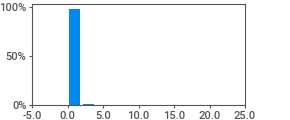
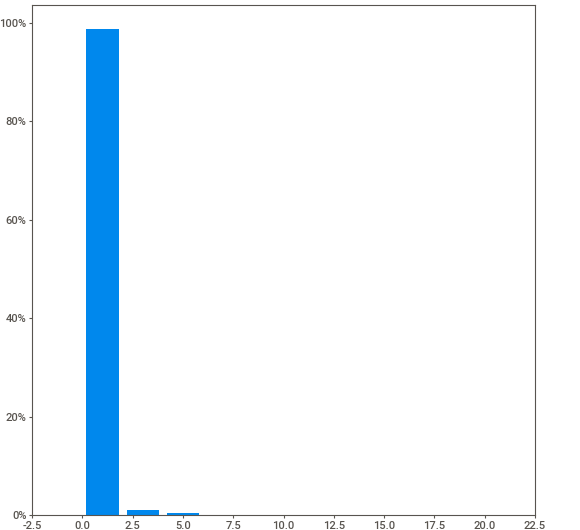
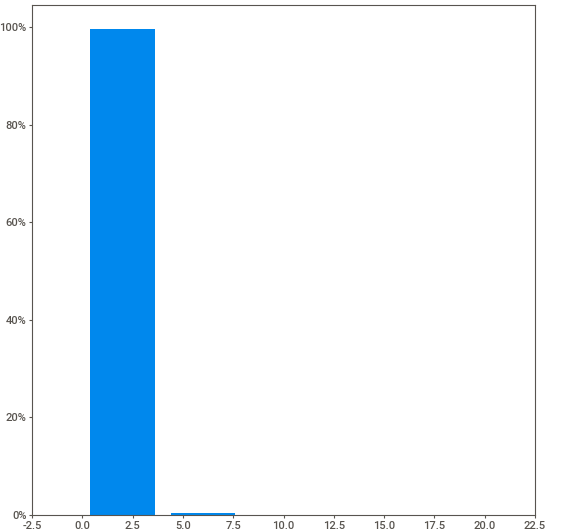
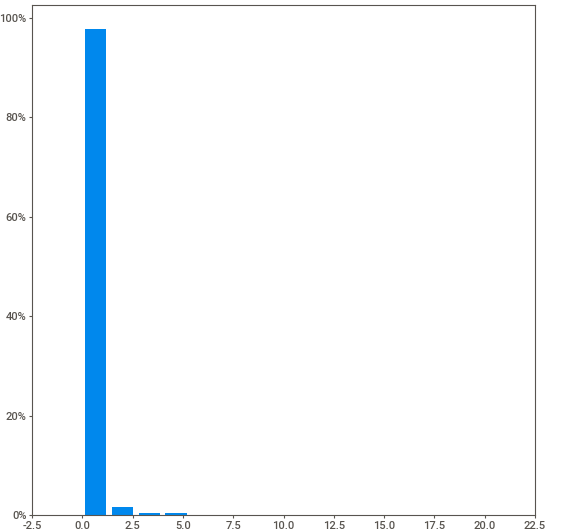
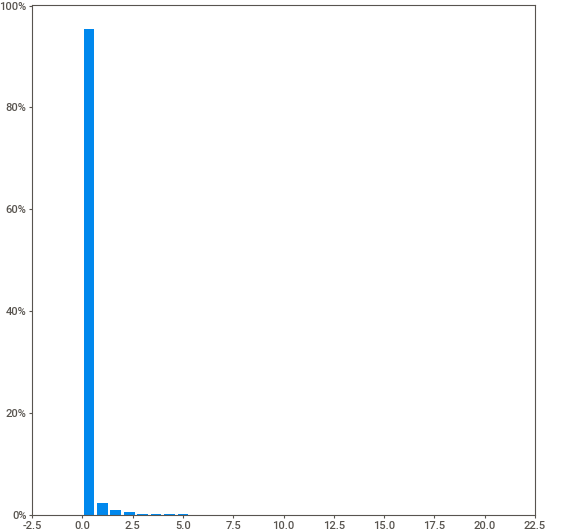
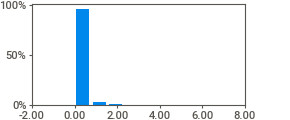
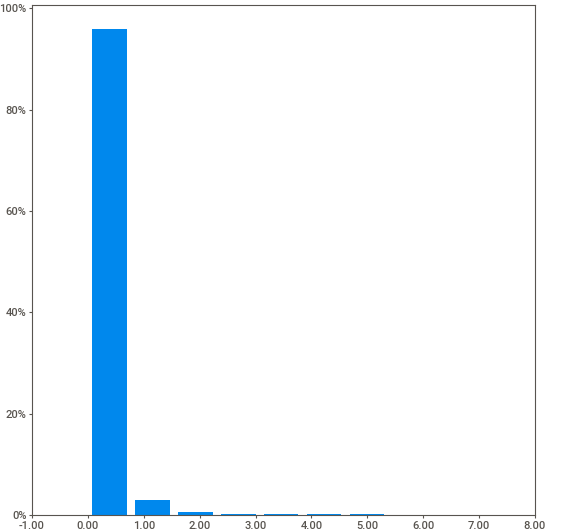
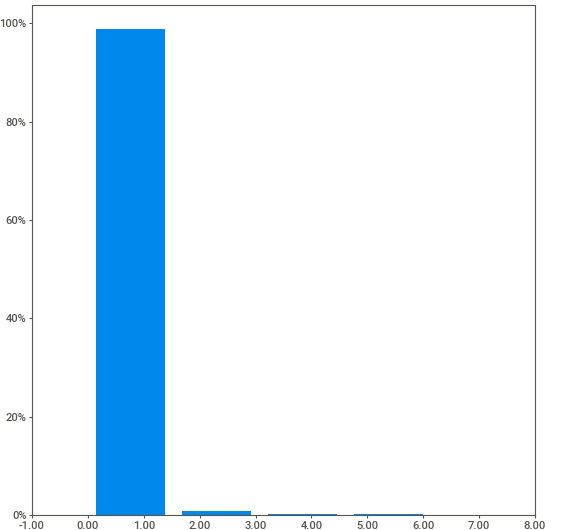
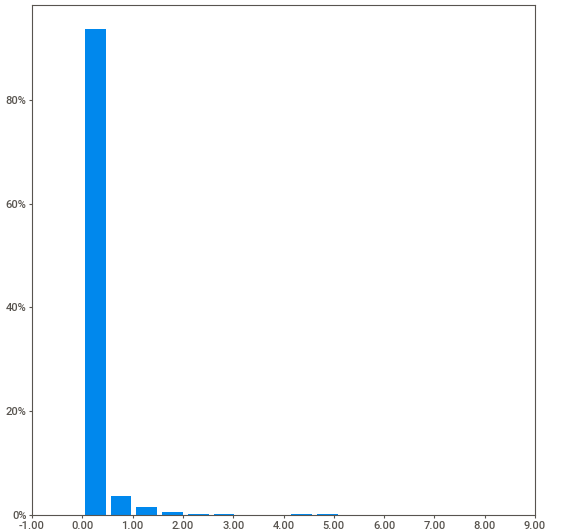
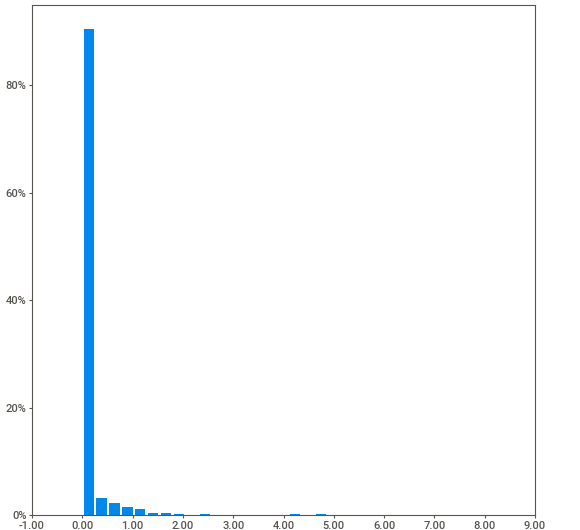
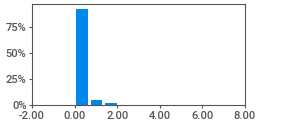
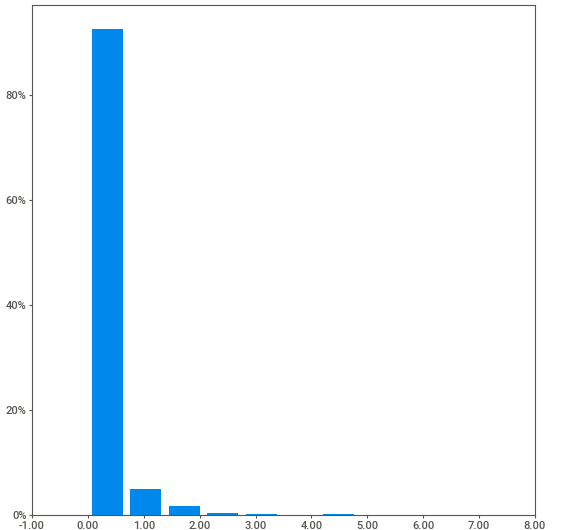
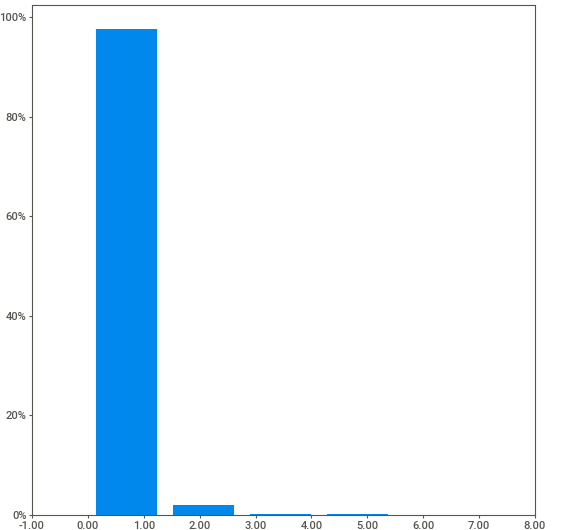
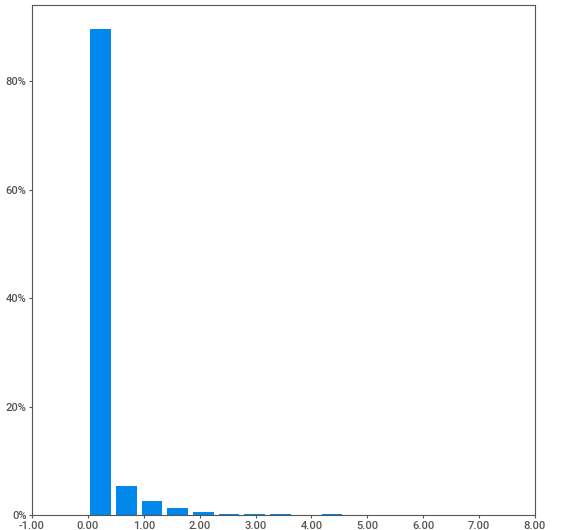
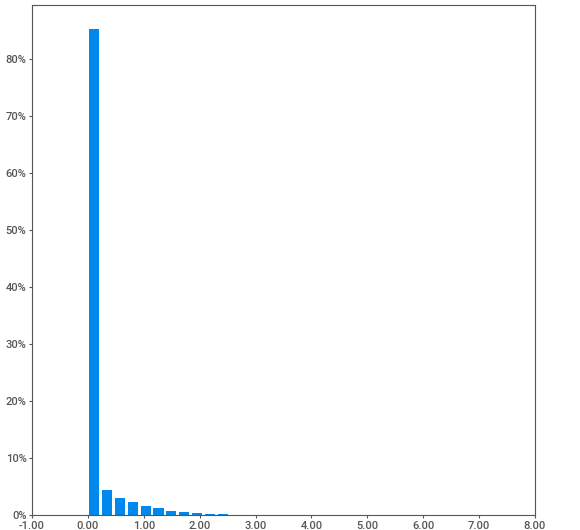
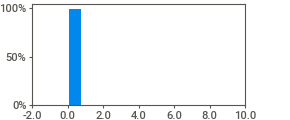
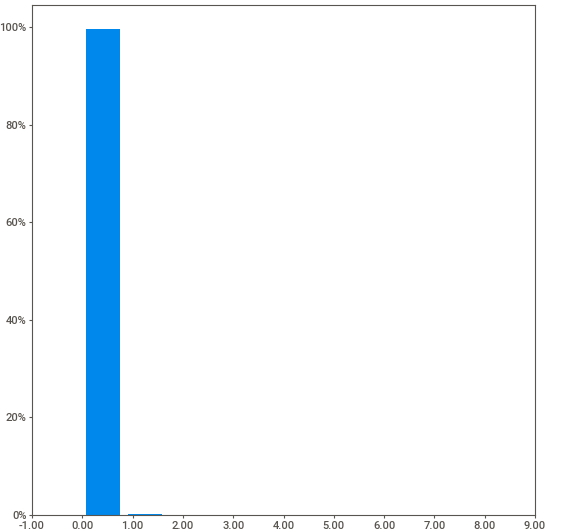
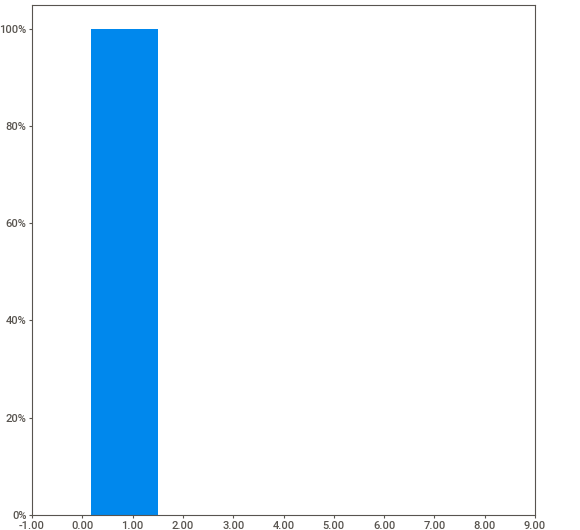
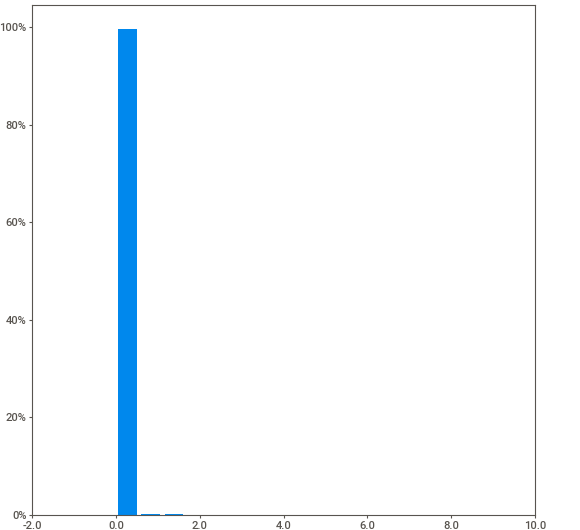
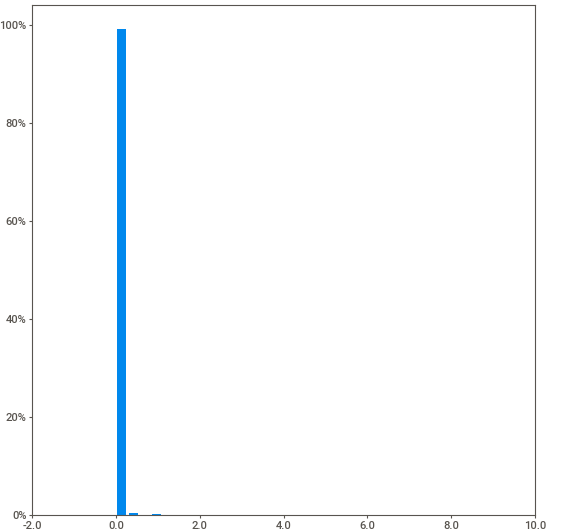
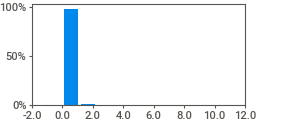
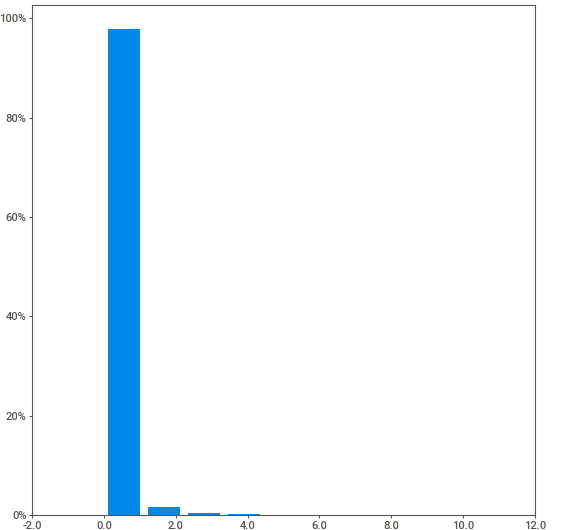
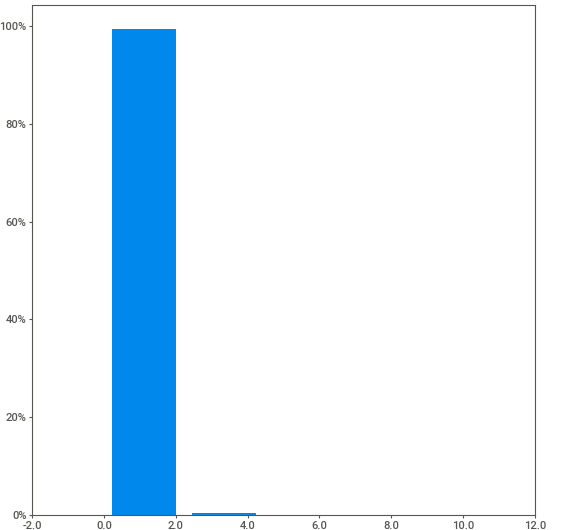
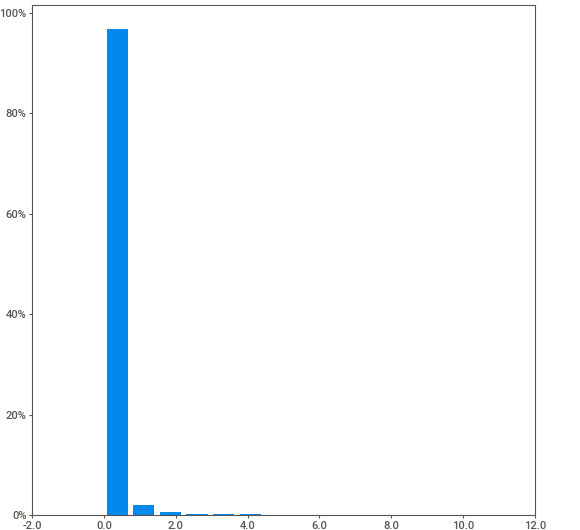
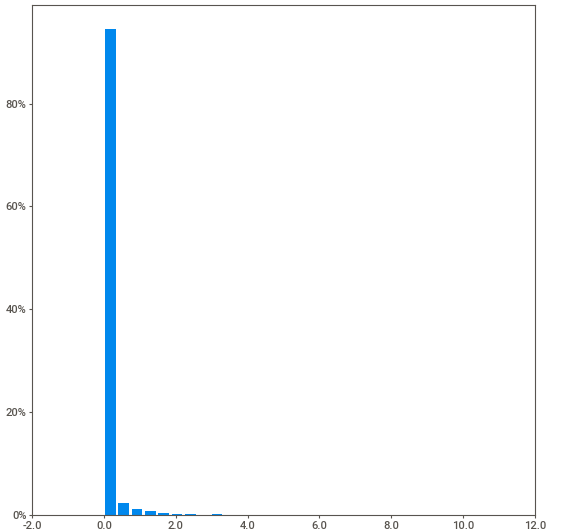
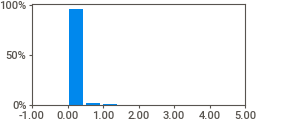
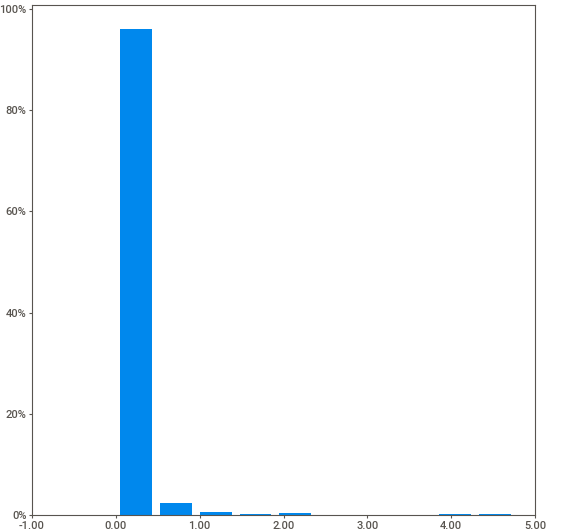
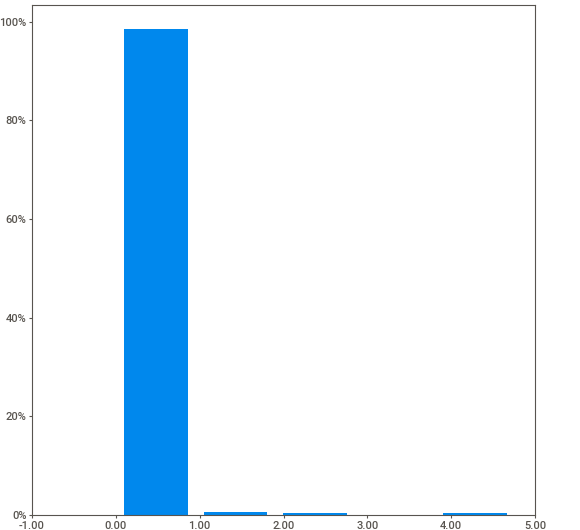
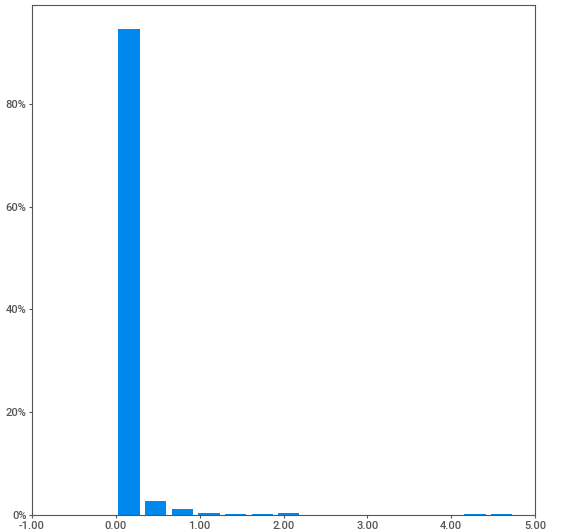
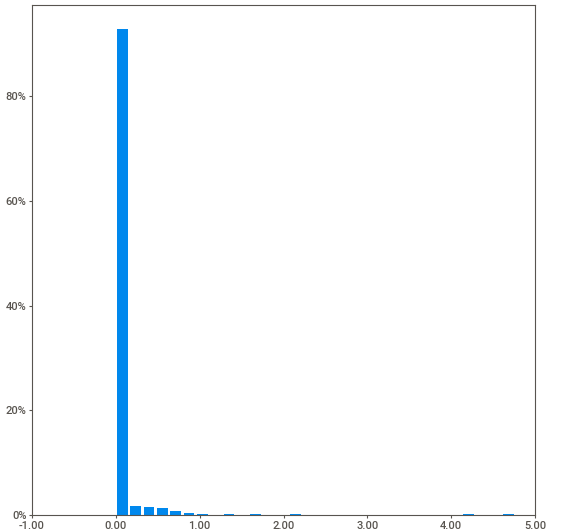
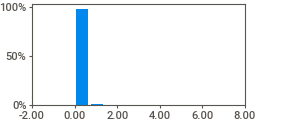
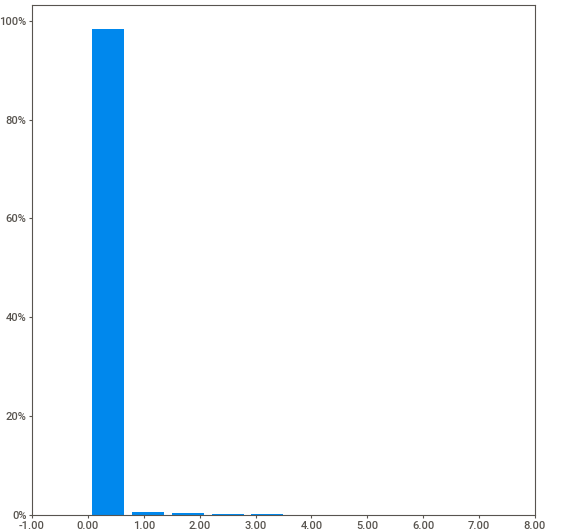
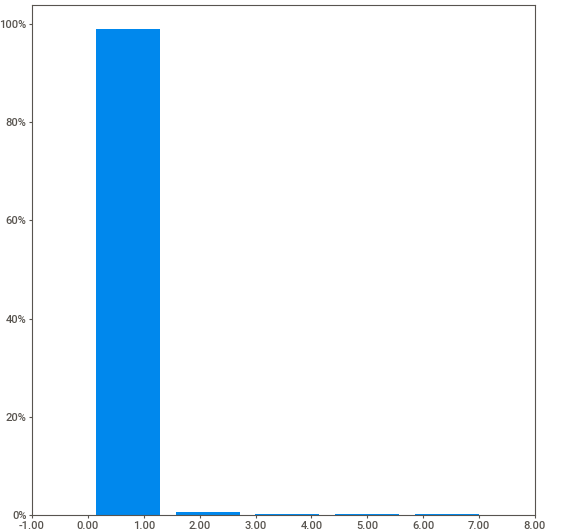
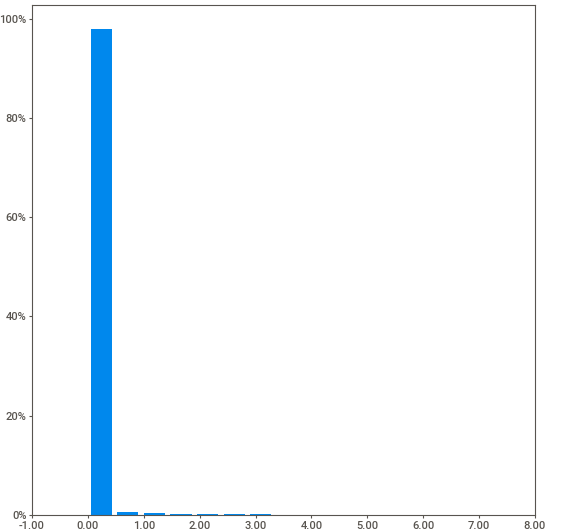
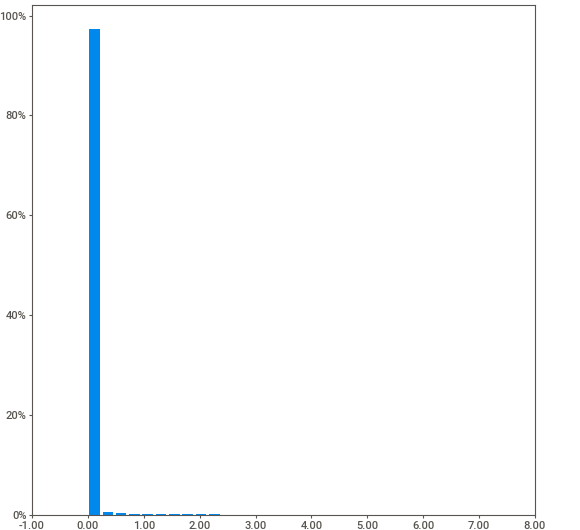
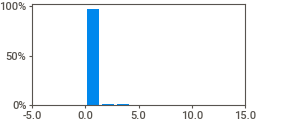
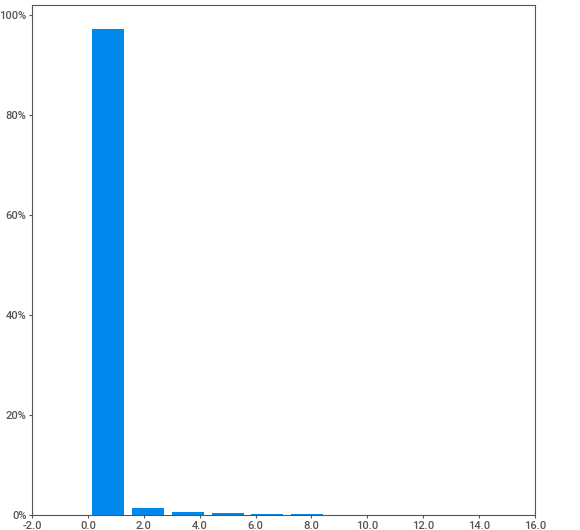
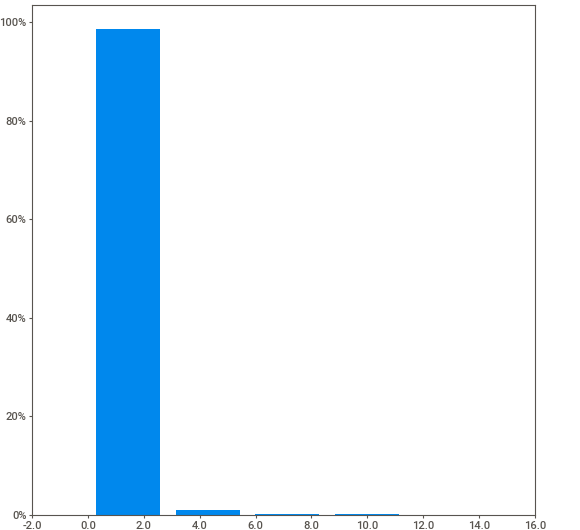
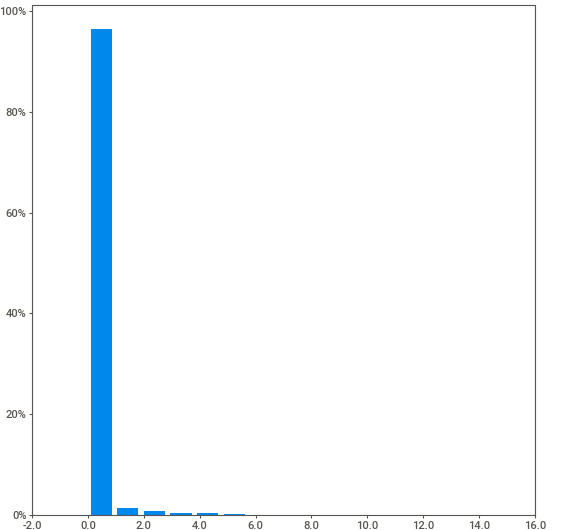
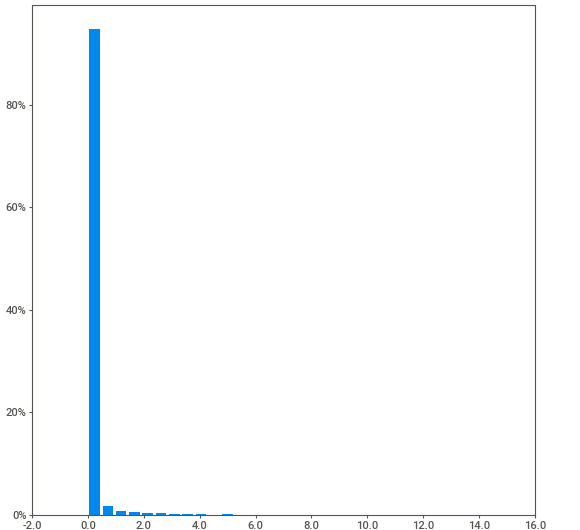
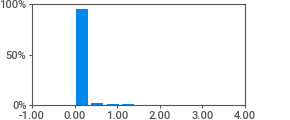
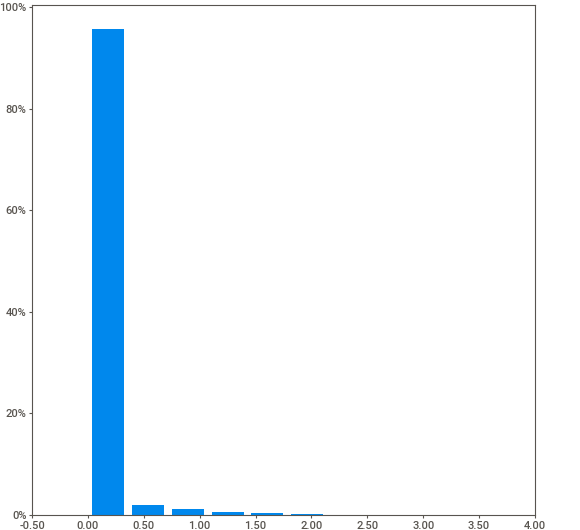
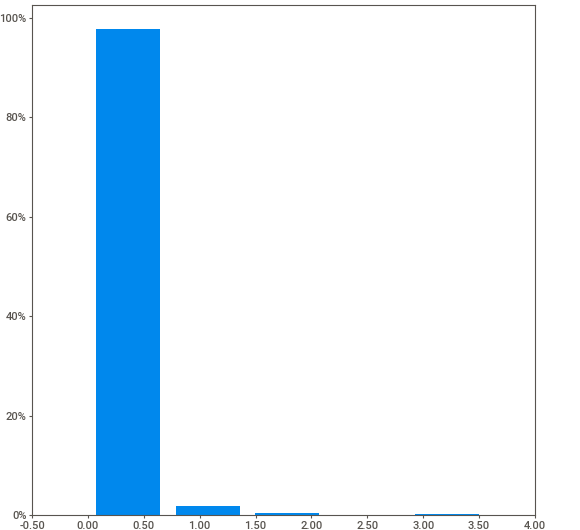
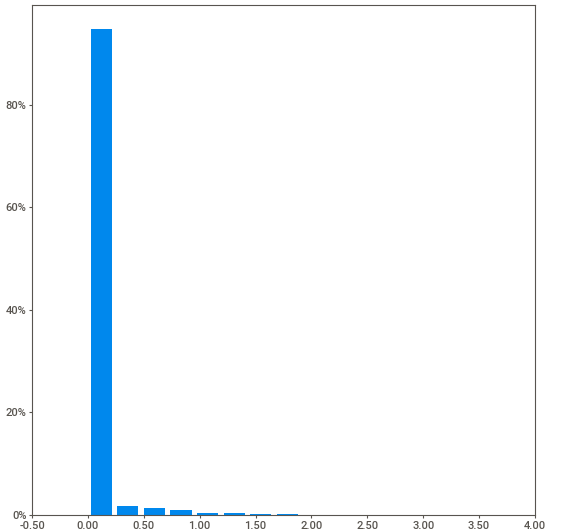
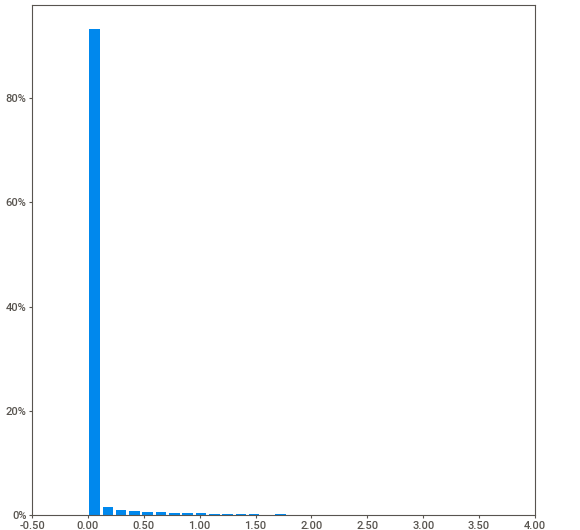
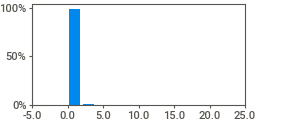
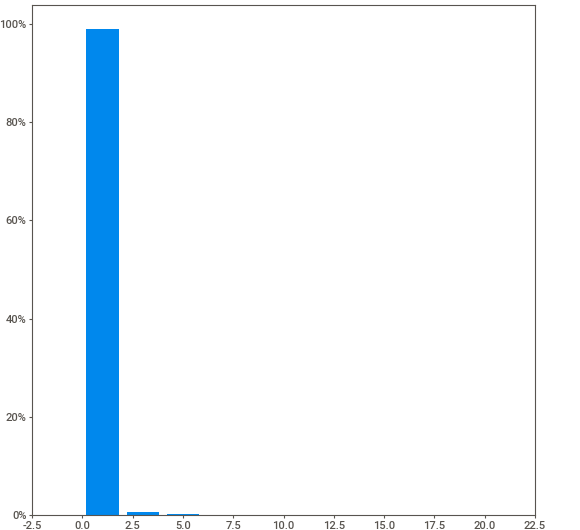
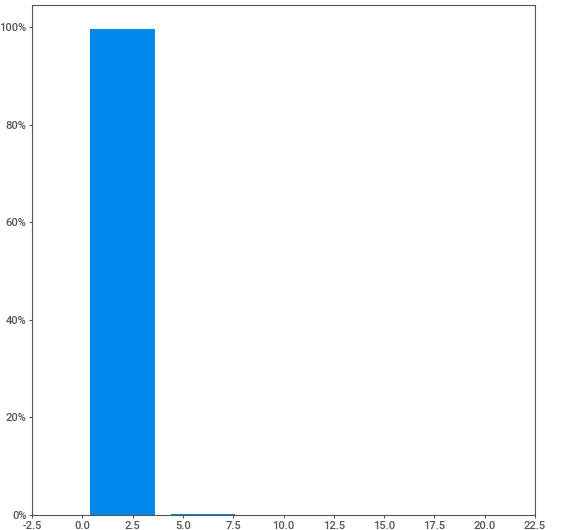
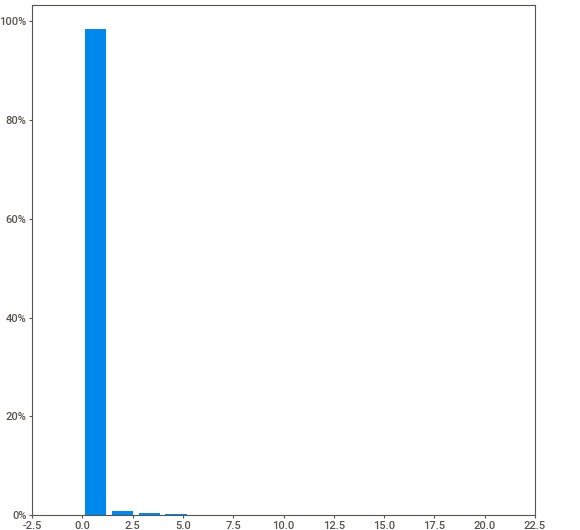
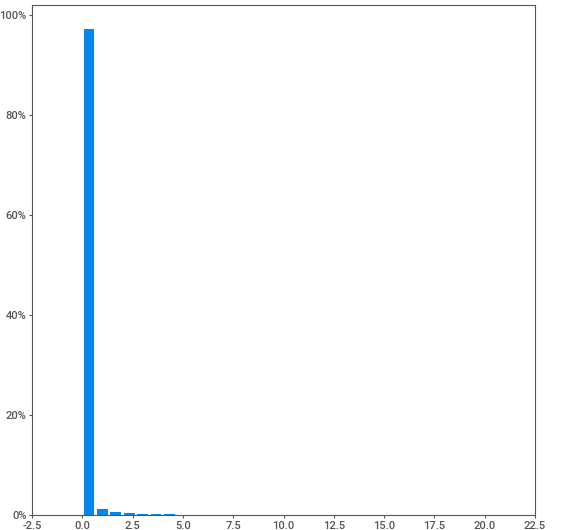
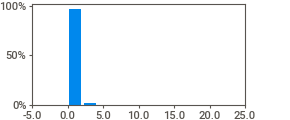
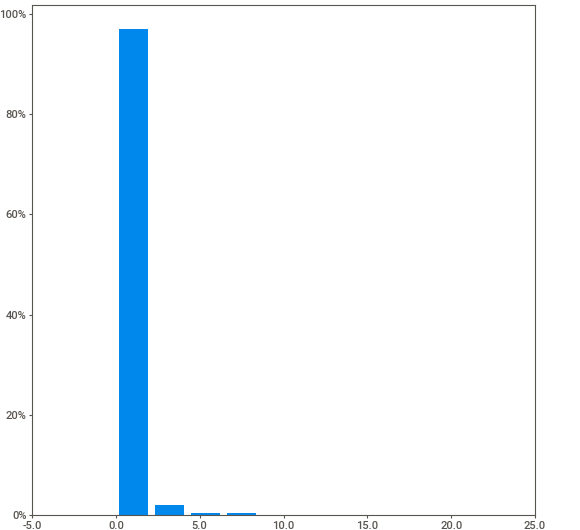
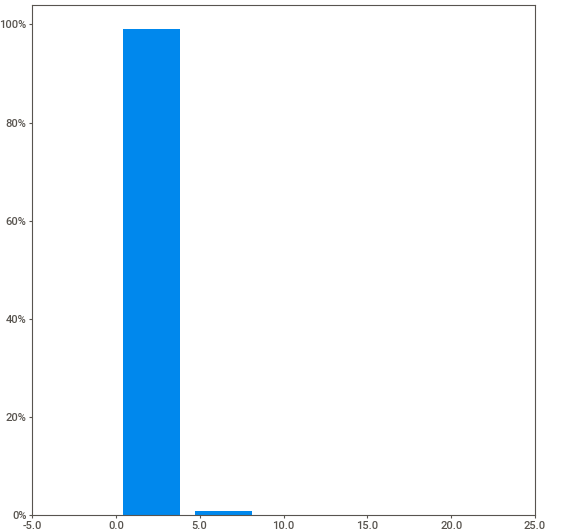
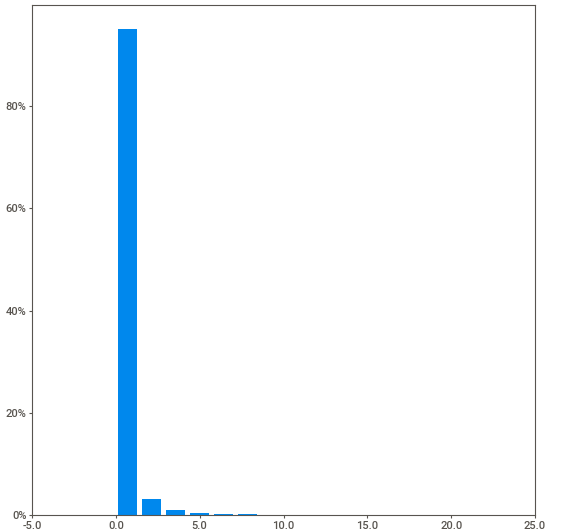
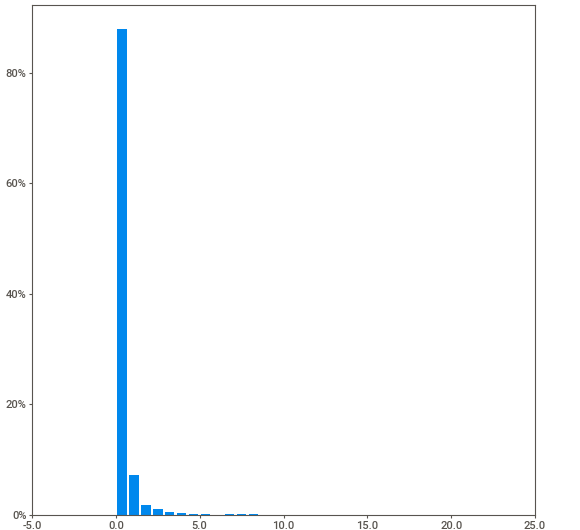
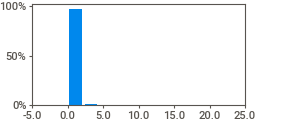
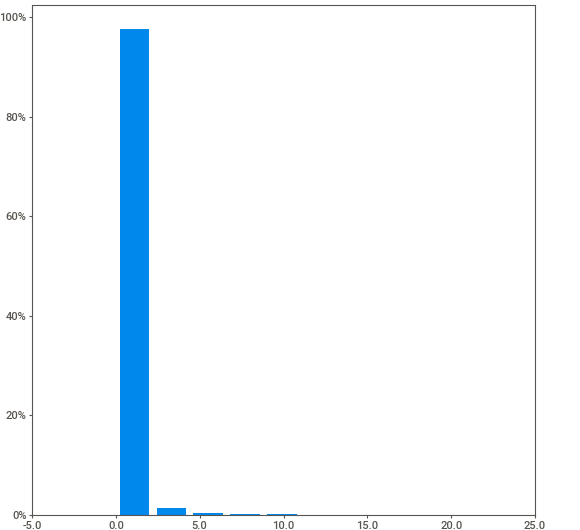
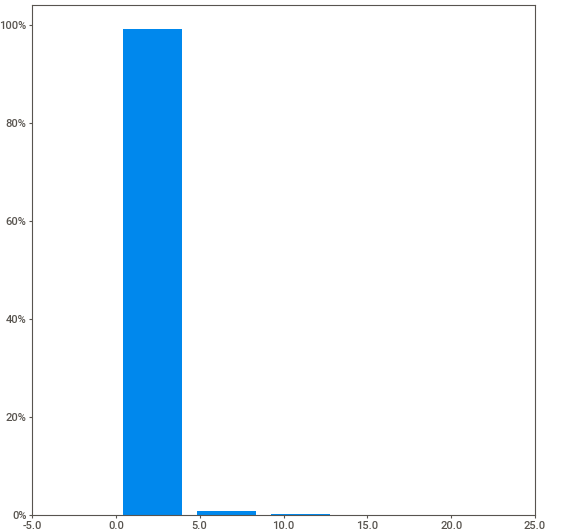
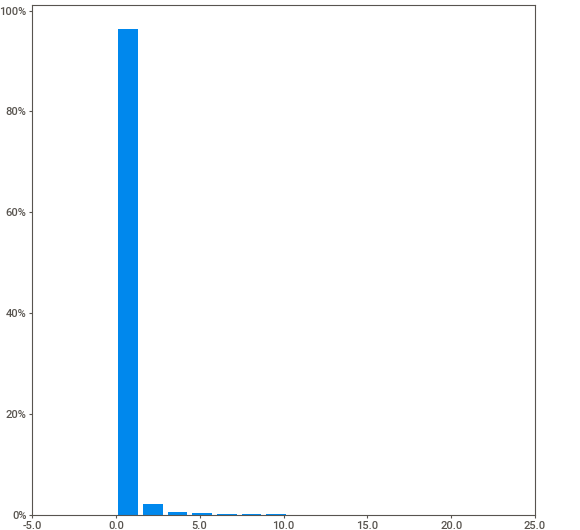
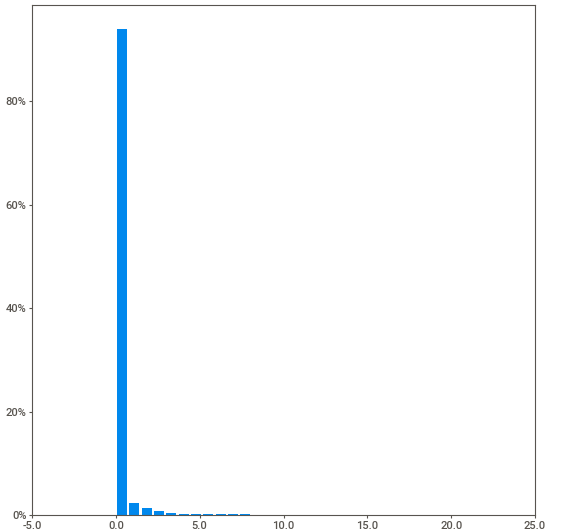
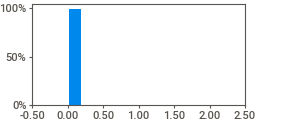
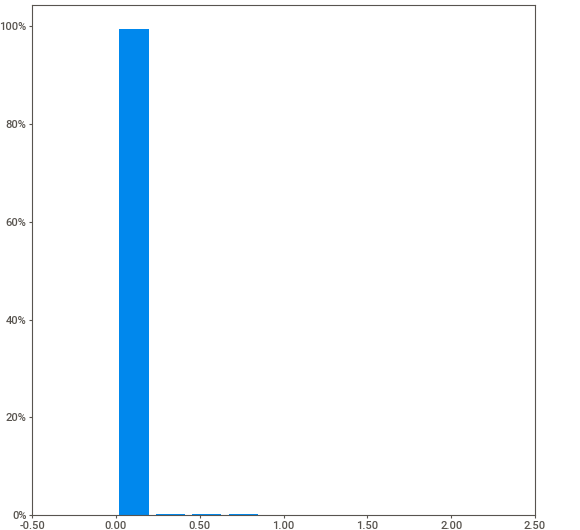
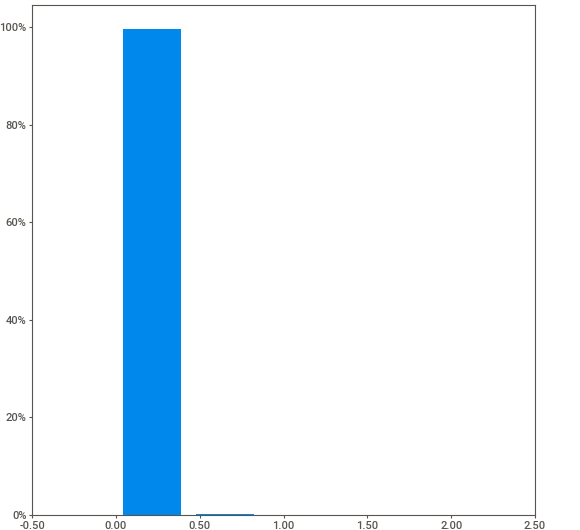
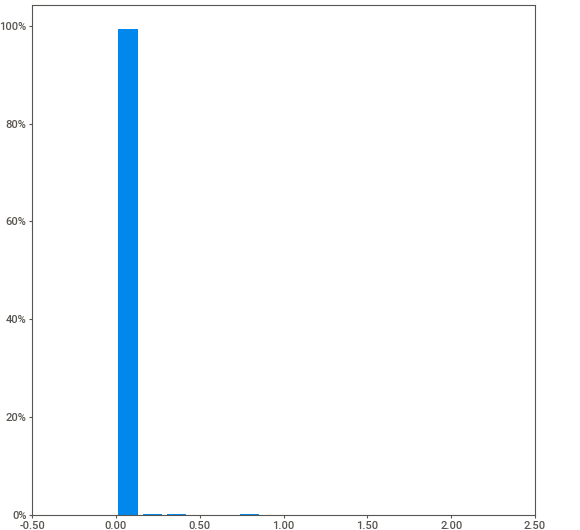
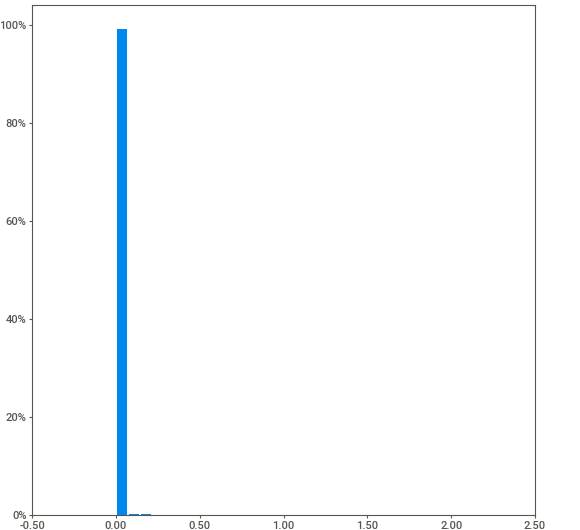
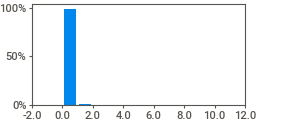
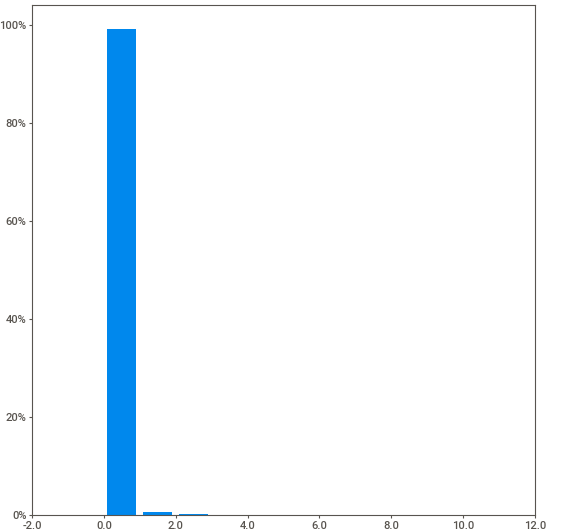
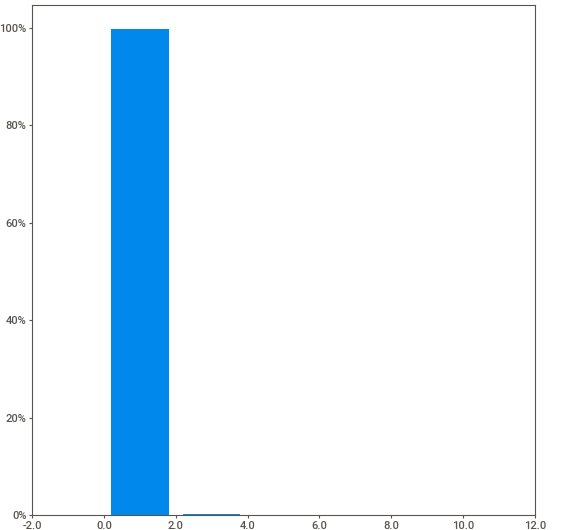
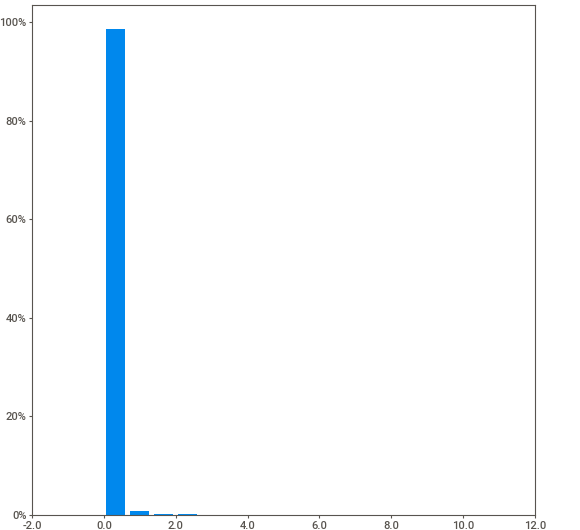
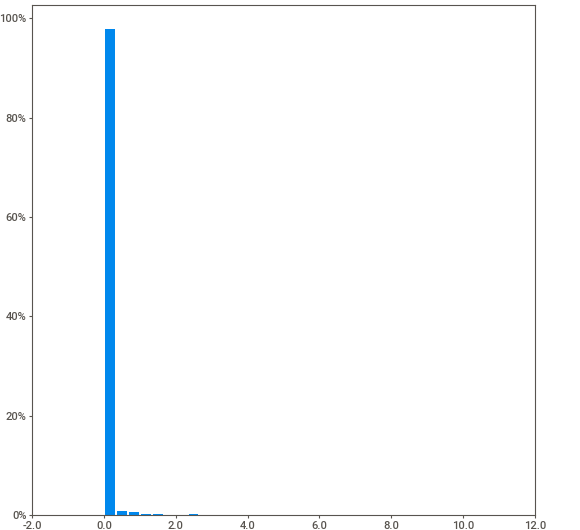
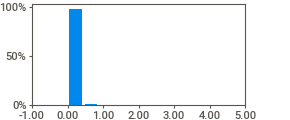
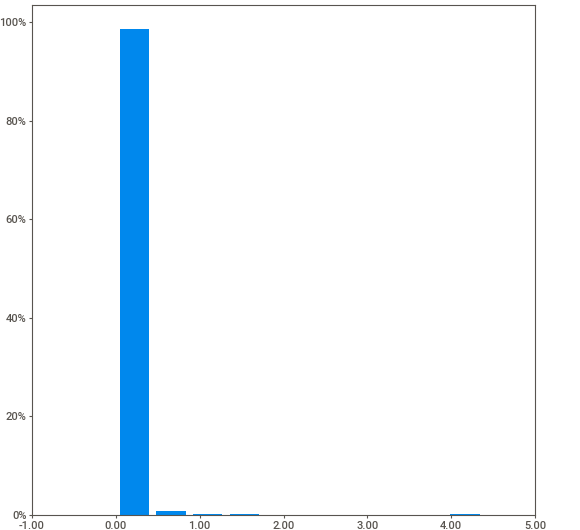
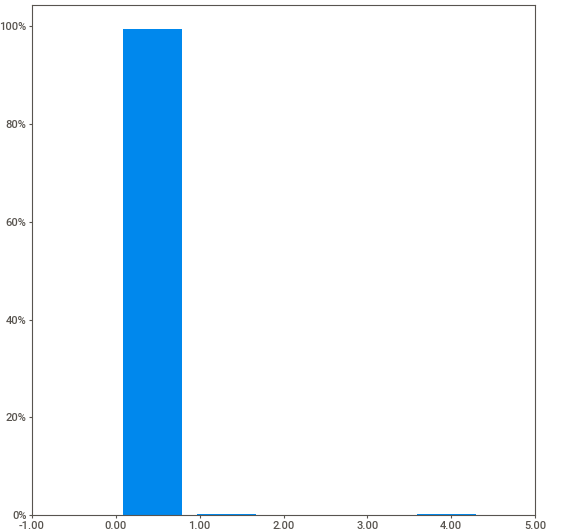
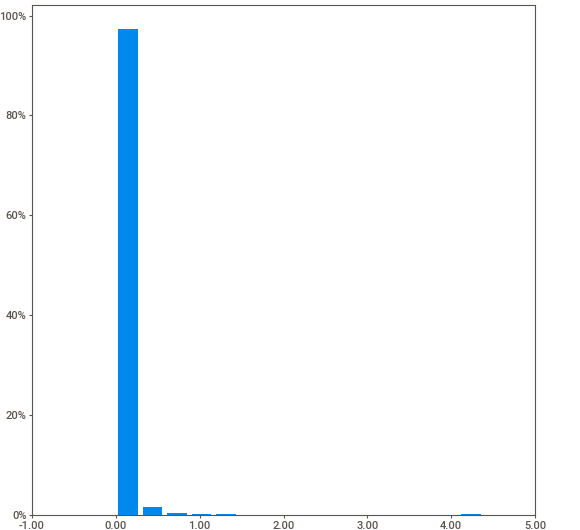
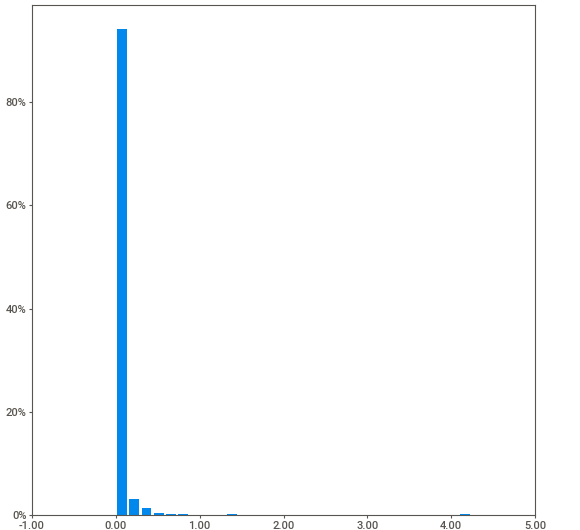
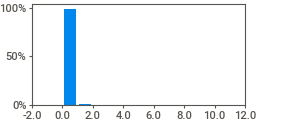
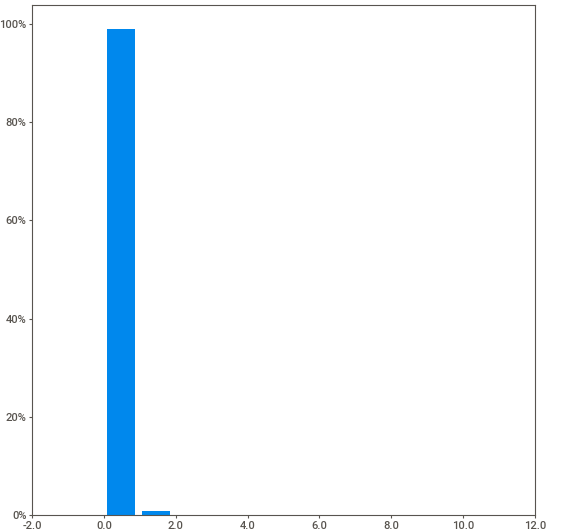
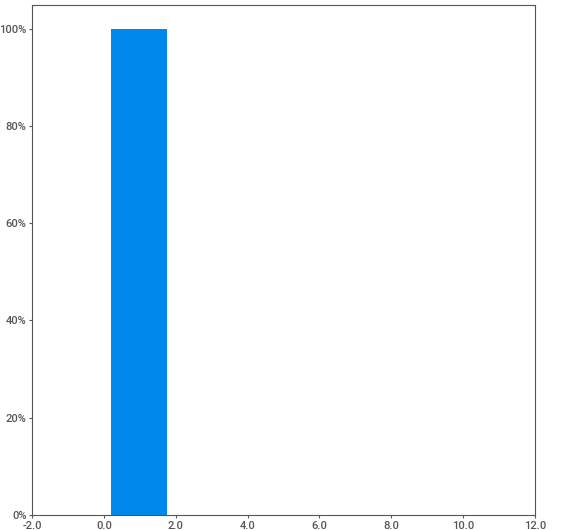
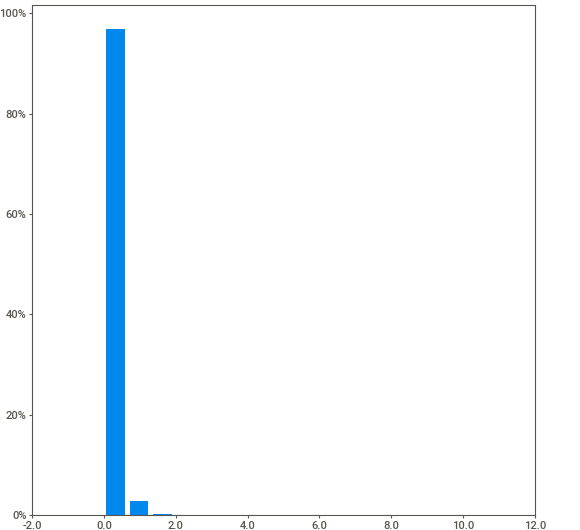
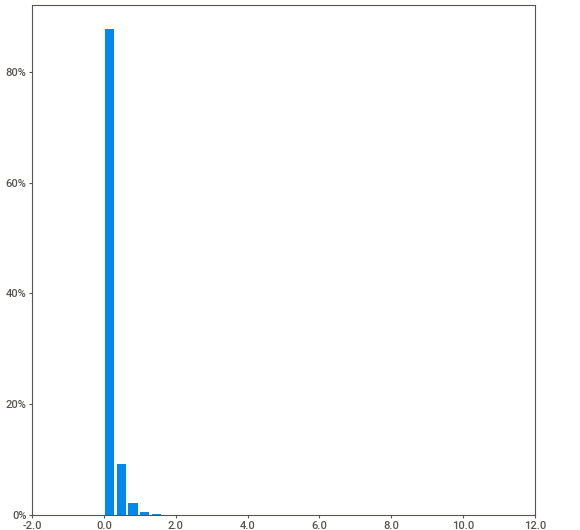
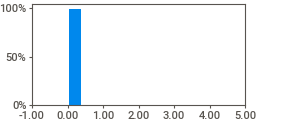
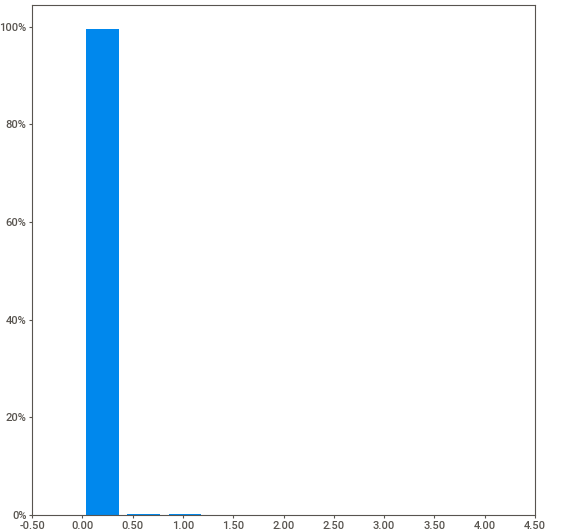
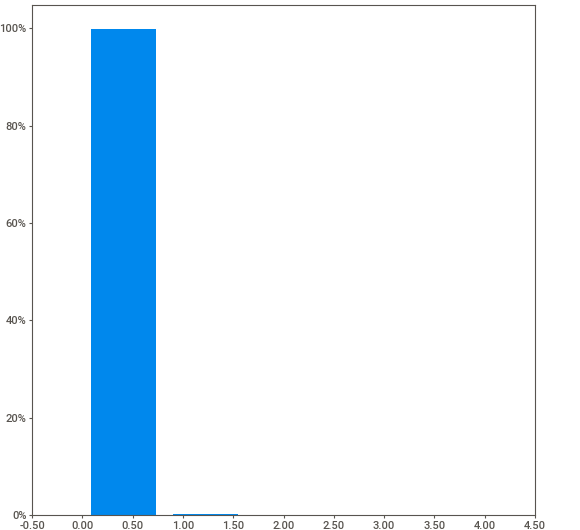
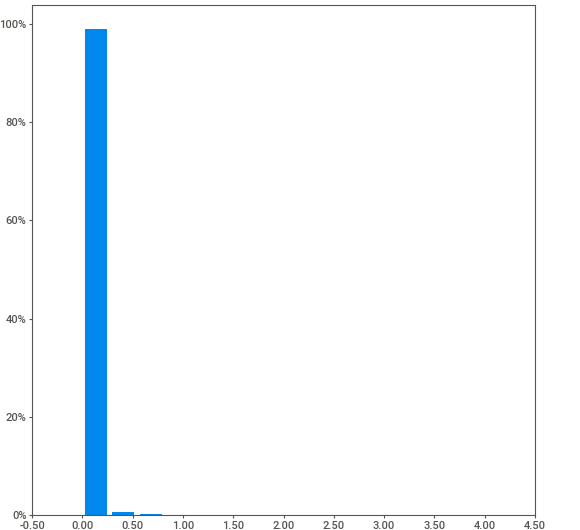
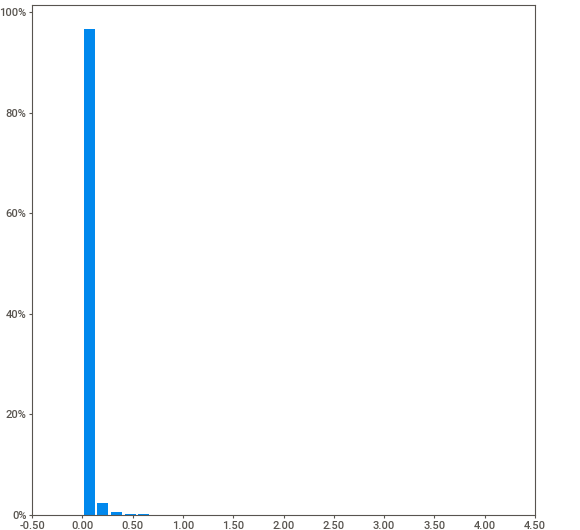
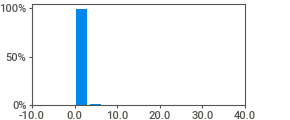
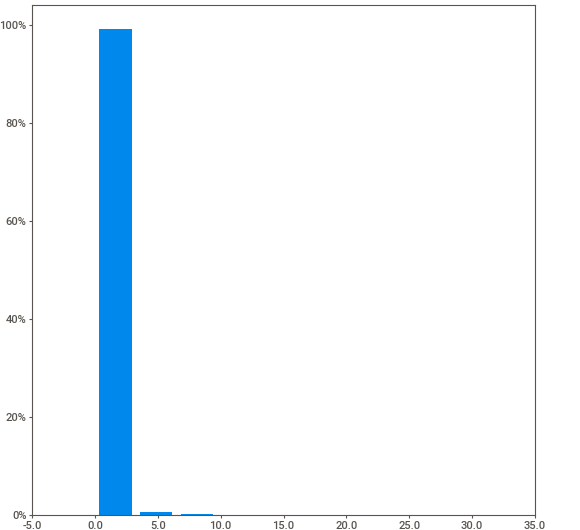
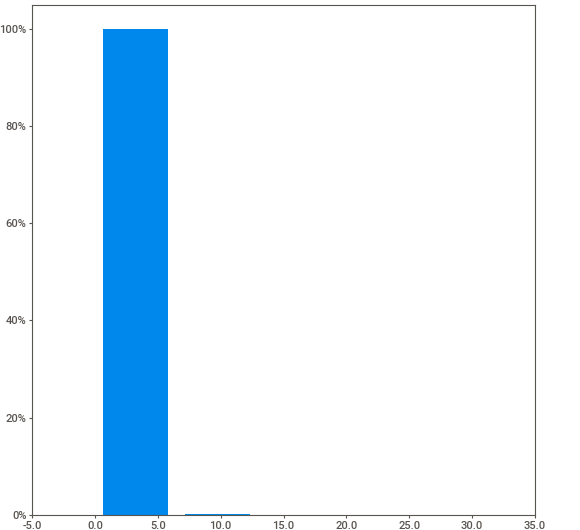
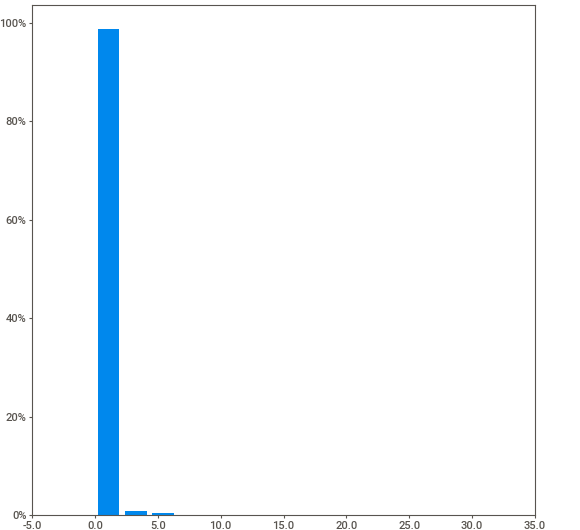
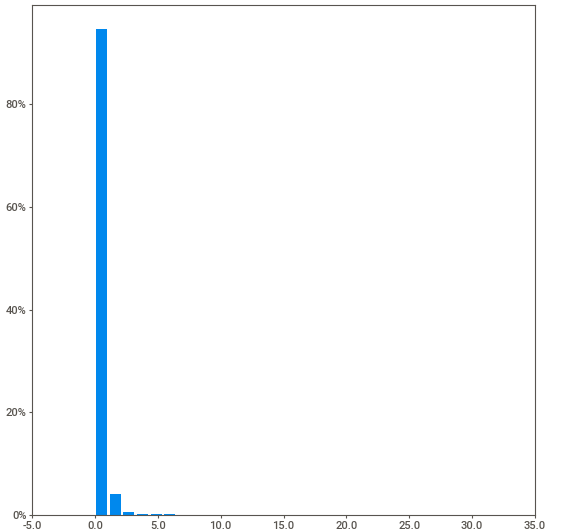
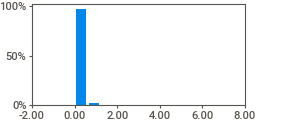
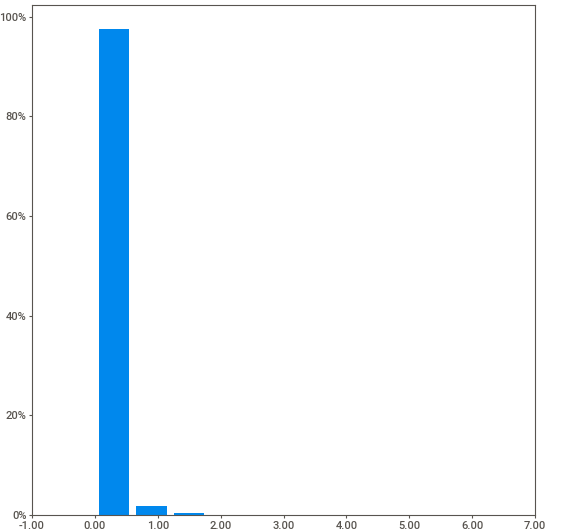
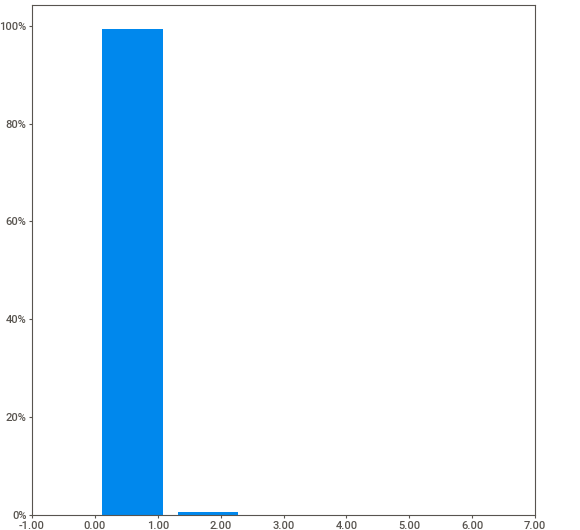
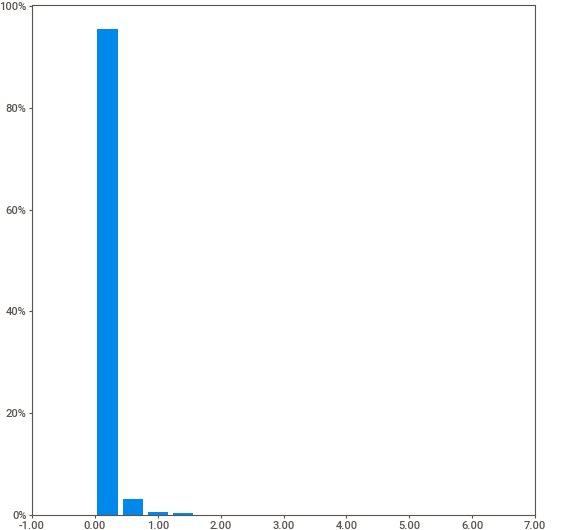
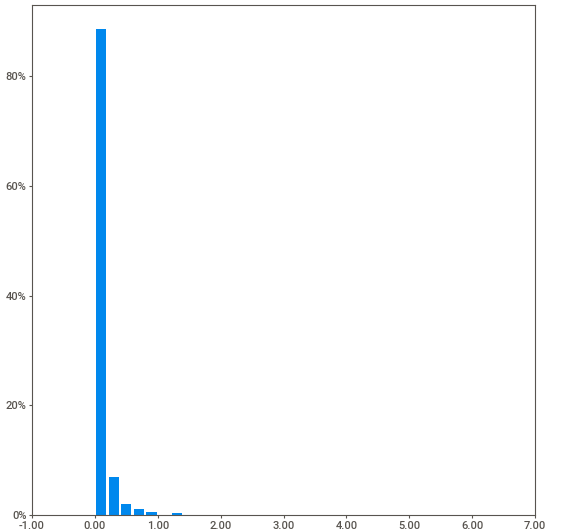
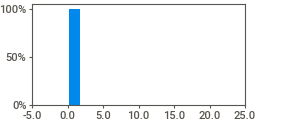
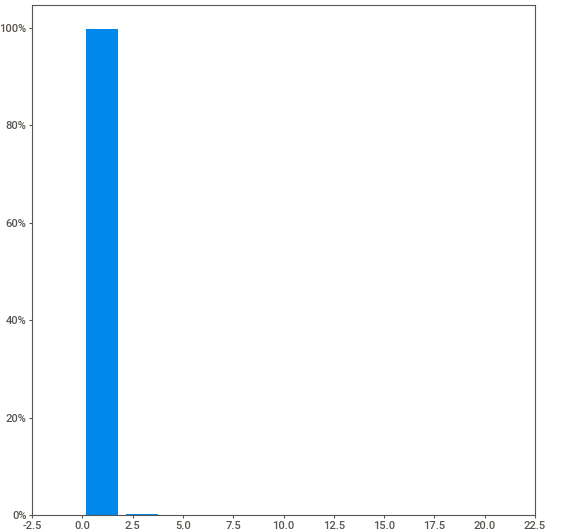
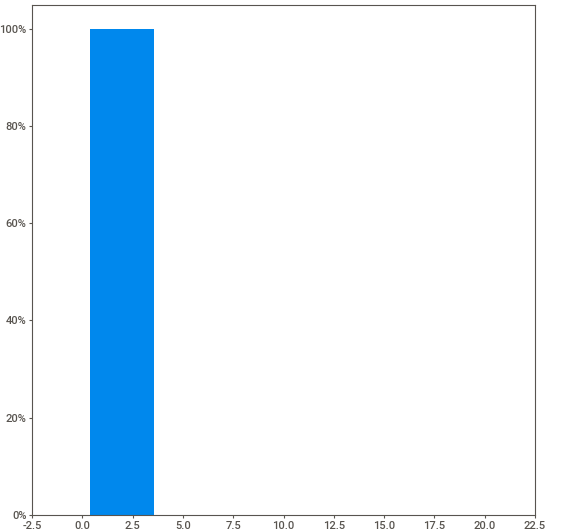
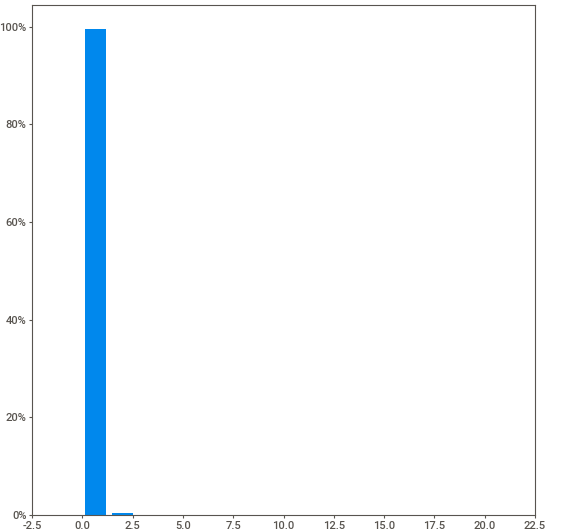
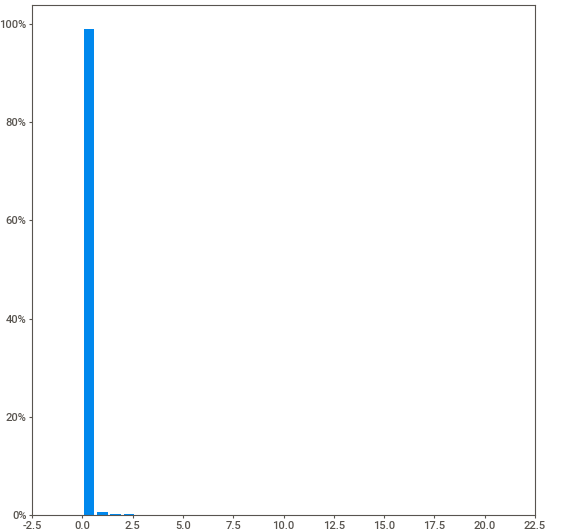
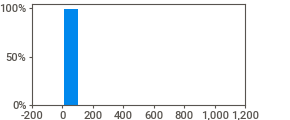
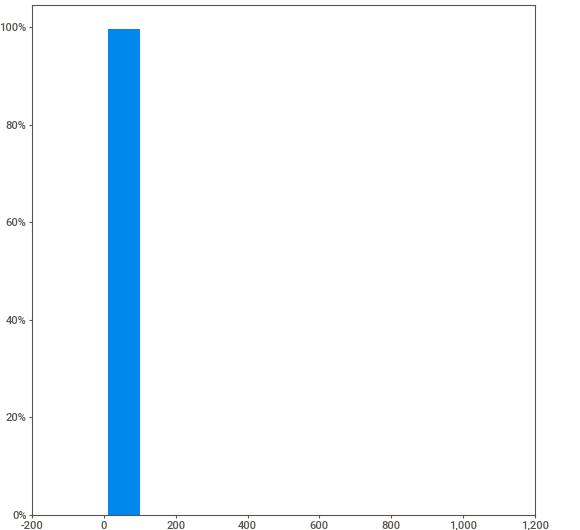
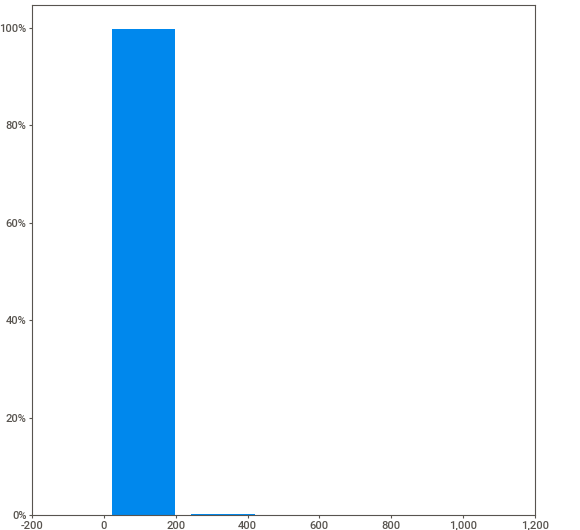
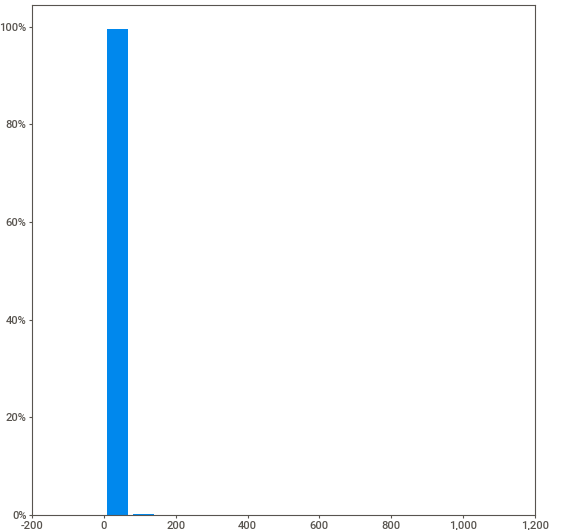
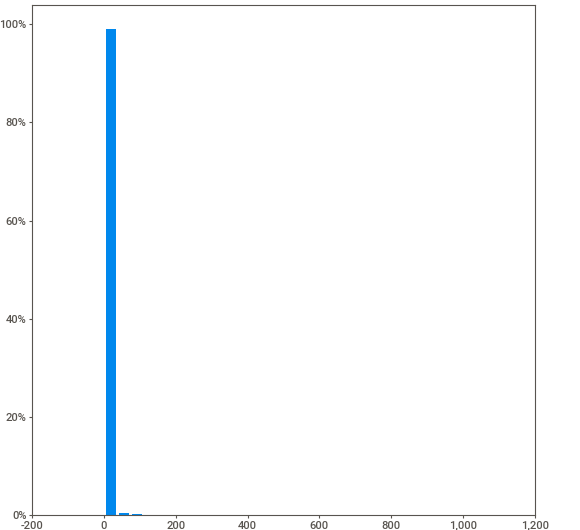
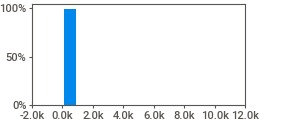
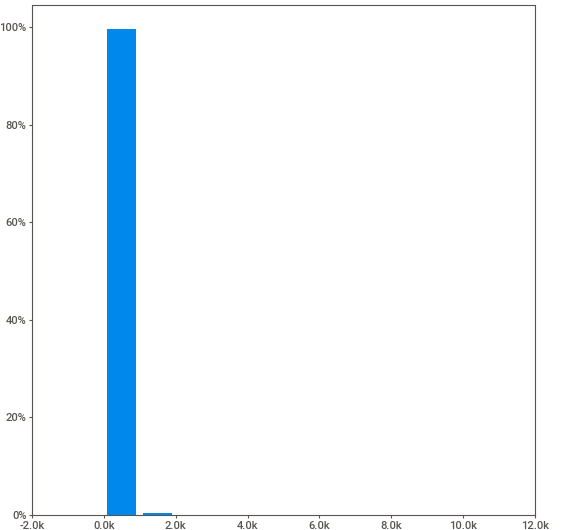
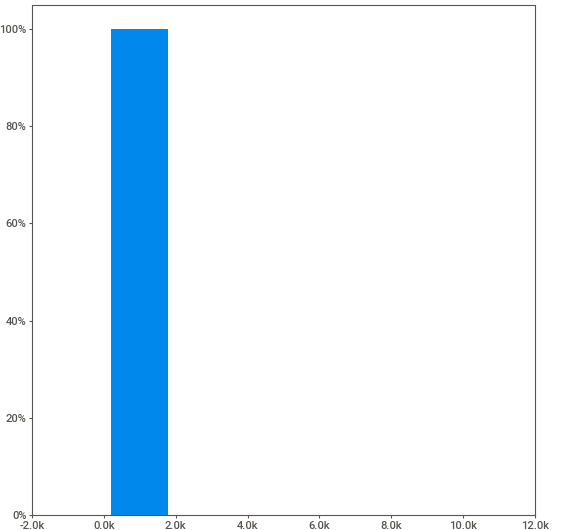
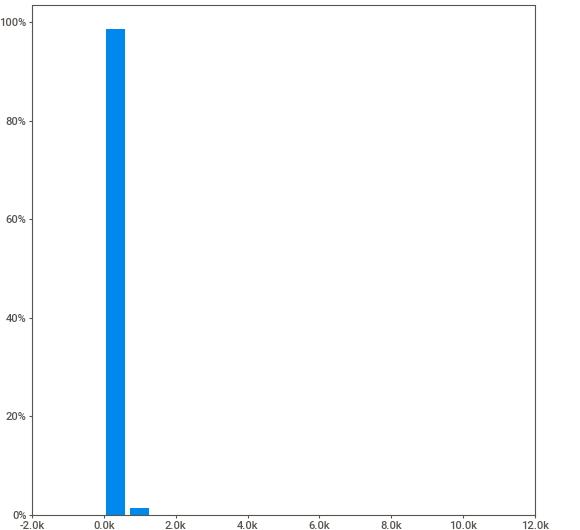
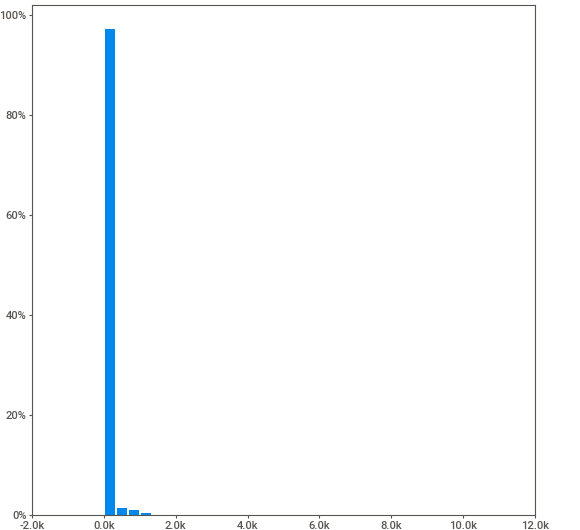
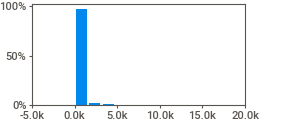
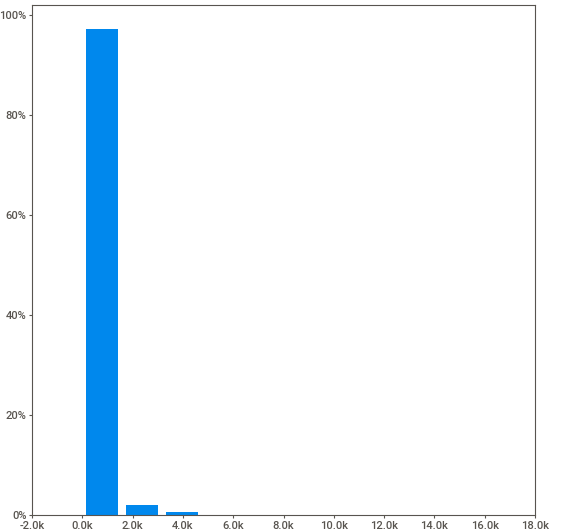
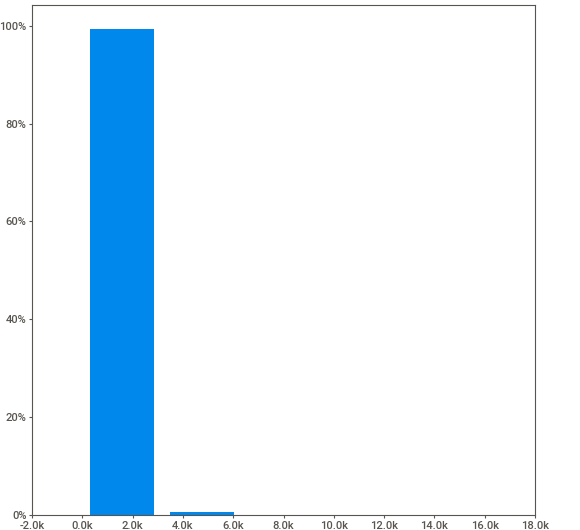
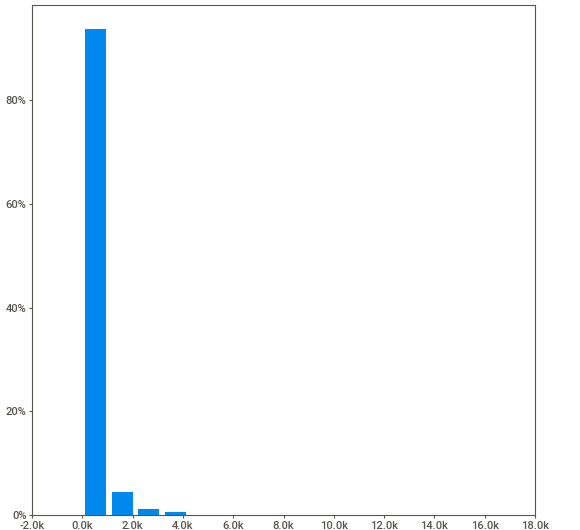
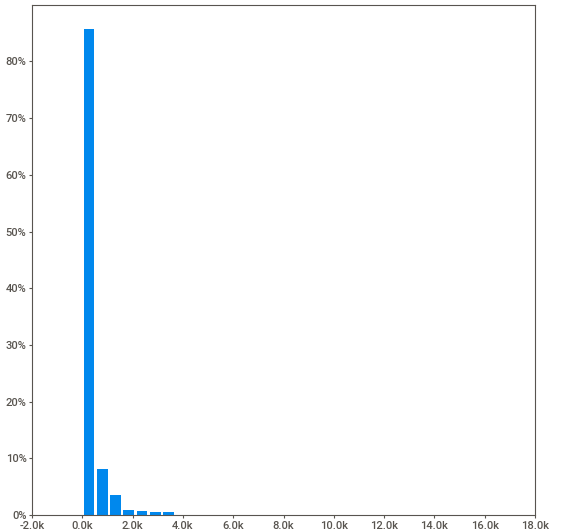
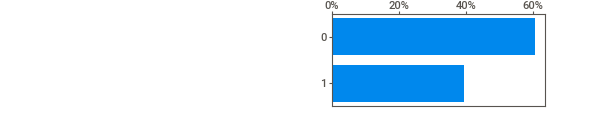
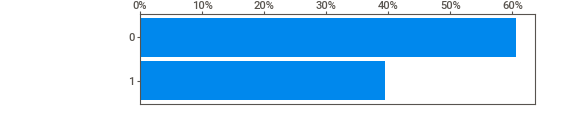
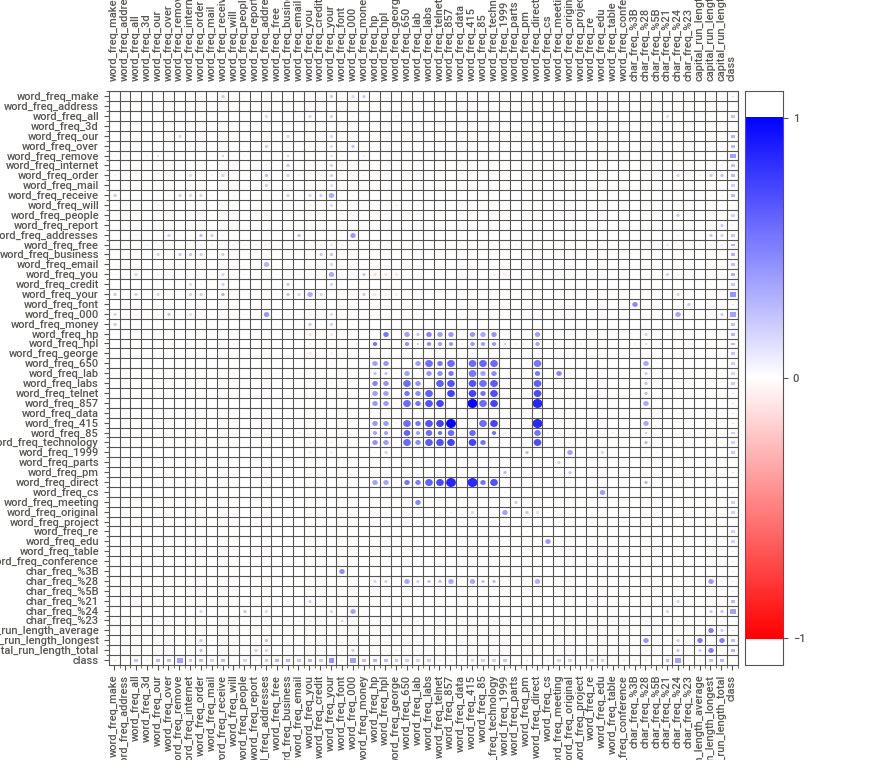
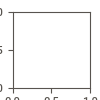

In [ ]:
import IPython
IPython.display.HTML(filename='sweet_report.html')

>The following was recorded from the visualization:

1. Most of the columns of the dataset have a positive skew. They are also unimodal.
2. The column class is the only categorical column and has two classes, spam or ham. Most of the words in the dataset have been classified as spam 2900 against ham 1800.
3. The scatter plots showed no particular pattern and therefore fits into the assumption of the independence of the predictor variables.


## Implementing the Solution

In [44]:
# splitting the datasets into x and y
x = data.iloc[:,:-1].values
y = data.iloc[:,57].values

In [45]:
# Using the Gaussian Naive bayes
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
gaus = GaussianNB()
gaus = gaus.fit(x_train, y_train)
y_pred = gaus.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[386 152]
 [ 26 357]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       538
           1       0.70      0.93      0.80       383

    accuracy                           0.81       921
   macro avg       0.82      0.82      0.81       921
weighted avg       0.84      0.81      0.81       921



> The accuracy of the model is 81%. The precision of the model is 94% indicating that the model rightly predicted 94% of spam messages as spam. however it was only able to correctly classify 70% of the ham messages as ham. Therefore I tried a different test size for the model.

In [52]:
# using a test size of 0.3
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
gaus = GaussianNB()
gaus = gaus.fit(x_train, y_train)
y_pred = gaus.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[597 225]
 [ 34 525]]
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       822
           1       0.70      0.94      0.80       559

    accuracy                           0.81      1381
   macro avg       0.82      0.83      0.81      1381
weighted avg       0.85      0.81      0.81      1381



> The accuracy of the model is 81%. The precision of the model has increased to 95% indicating that the model rightly predicted 94% of spam messages as spam. The model classified 70% of the ham messages as ham indicating no change from the previous model.

In [53]:
# using a test size of 0.4
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)
gaus = GaussianNB()
gaus = gaus.fit(x_train, y_train)
y_pred = gaus.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[819 278]
 [ 42 702]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1097
           1       0.72      0.94      0.81       744

    accuracy                           0.83      1841
   macro avg       0.83      0.85      0.83      1841
weighted avg       0.86      0.83      0.83      1841



> In this split, the f1 score of the model has improved to 83%. The precision score of spam messages is at 95% and that of the ham has improved to 72%. This means that the model is very good at predicting spam messages but not so good at predicting ham messages. 

In [60]:
# checking the accuracies of the model in different splits
accuracy = []
range = np.arange(0.1,1,0.1)

for i in range:
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=i, random_state=0)
  gaus = gaus.fit(x_train, y_train)
  y_pred = gaus.predict(x_test)
  accuracy_ = np.mean(y_pred==y_test)
  accuracy.append(accuracy_)
  print('The accuracy for test size ', i, 'is ', str(accuracy_))

The accuracy for test size  0.1 is  0.8112798264642083
The accuracy for test size  0.2 is  0.8078175895765473
The accuracy for test size  0.30000000000000004 is  0.8189717595944968
The accuracy for test size  0.4 is  0.8321564367191744
The accuracy for test size  0.5 is  0.8370273794002607
The accuracy for test size  0.6 is  0.839913074972836
The accuracy for test size  0.7000000000000001 is  0.8410431542999068
The accuracy for test size  0.8 is  0.839174137462646
The accuracy for test size  0.9 is  0.8304757304998792


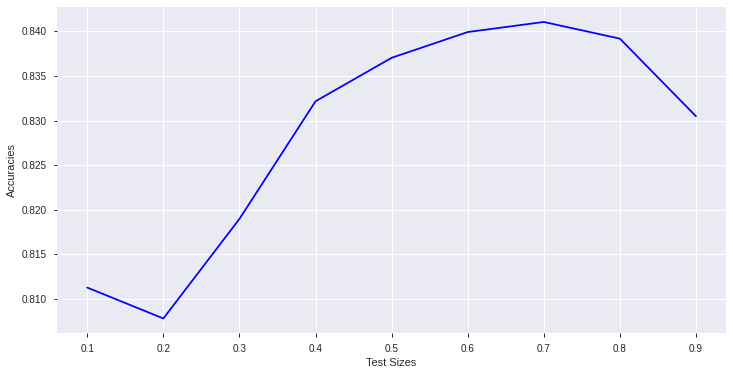

In [64]:
# plotting a graph to visualize the results
plt.figure(figsize=(12,6))
plt.plot(range,accuracy, color='blue')
plt.xticks(range)
plt.xlabel('Test Sizes')
plt.ylabel('Accuracies')
plt.show()

> The graph shows us that the accuracy of the model continually peaks as the size of test data increases. However it peaks to up to **0.7** and then it starts to drop.

## Model optimization

### Removing correlated features

> Correlated features may impede the model accuracy. This is because the biggest assumption of the naive bayes algorithm is that the models contain independent features. Therefore I decided to identify the number of correlated features and remove them to try and obtain a better model. 

In [4]:
# generating a correlation matrix and storing them as correlated features
correlated_features = []
corr_matrix = data.corr()

for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i, j]) > 0.70:
      colname = corr_matrix.columns[i]
      correlated_features.append(colname)

len(correlated_features)

7

In [5]:
# dropping the correlated columns
data.drop(labels=correlated_features, axis=1, inplace=True)

### Normalizing the data

> After removing the 7 correlated features, I will normalize the data and scale it and then run the model again to try and improve on the model prediction accuracy. 

In [28]:
# splitting the datasets into x and y
x = data.iloc[:,:-1].values
y = data.iloc[:,53].values

# The data will be scaled using a standard scaler to try and then normalizing the data.
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
normalizer.transform(x)


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# scaling the data using standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# fitting the model
gaus = GaussianNB()
gaus = gaus.fit(x_train, y_train)
y_pred = gaus.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[820   2]
 [528  31]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       822
           1       0.94      0.06      0.10       559

    accuracy                           0.62      1381
   macro avg       0.77      0.53      0.43      1381
weighted avg       0.74      0.62      0.49      1381



> After finding out which features were correlated and removing them, normalizing the data and scaling it, the model did not improve. Actually the models performance decreased drastically. Therefore I decided to run feature selection using the Linear Discriminant Analysis hoping to improve the accuracy of the model. The number of features that I have chosen will be 10.

In [31]:
# feature selection using LDA
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 10)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# training the model
gaus = gaus.fit(x_train, y_train)
y_pred = gaus.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[775  47]
 [121 438]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       822
           1       0.90      0.78      0.84       559

    accuracy                           0.88      1381
   macro avg       0.88      0.86      0.87      1381
weighted avg       0.88      0.88      0.88      1381



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(53, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


>The accuracy of the model has greatly improved after performing feature selection and scaling the data. An accuracy of 88% has been achieved that is higher than all of our previous accuracies. Therefore the model has been optimized. To cross validate the models performance over different splits, I decide to conduct a kfold cross validation to check the performance of the same model but using different splits.

In [34]:
# cross validation of the model 
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    gaus.fit(x_train, y_train)
    predicted = gaus.predict(x_test)
    scores.append(
        np.mean(predicted==y_test)
    )
    
np.mean(scores)

0.823918702254079

> After cross validation using the KFold cross validation, I obtained a mean accuracy of 82% for the different models. As the average model accuracy, our model outperforms the average accuracy meaning we have a more than average split of the training and testing dataset. 

## Challenging the solution

> The above results were obtained using the Gaussian naive bayes classifier. This is because it is good at predicting continuous variables. However, the model can be improved by carrying out pre-processing of the data from the beginning and using a Binomial naive bayes classifier. A better understanding of the data could be useful since there was no document detailing the data description of the dataset. Therefore this limits one on the ways to obtain a better performing model.






## Follow up questions

### a). Did we have the right data?

The dataset was not expained therefore it is hard to determine if we had the right data. 

### b). Do we need other data to answer our question?

The question was sufficient and was clearly asked. Therefore we do not need additional questions to seek out the truth.